# Molecular fingerprint based QSAR Analysis for SARS coronavirus 3C-like protease inhibitors

**Quantitative Structure-Activity Relationship** (QSAR) is a computational method used to analyze the relationship between the three-dimensional structure of molecules and their biological activity.


**Molecular fingerprints** encode properties of small molecules and assess their similarities computationally through bit string comparisons.

## Installing Libraries 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#rdkit
! pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 57.7 MB/s eta 0:00:00


In [3]:
! pip install padelpy
from padelpy import padeldescriptor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 88.0 MB/s eta 0:00:00


In [4]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

In [5]:
import glob

In [6]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [8]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.preprocessing import StandardScaler

In [9]:
from tabulate import tabulate

## Data Preprocessing

**CHEMBL5118** and **CHEMBL3927** targets were extracted from the ChEMBL database. 

*   CHEMBL5118: Replicase polyprotein 1ab
*   CHEMBL3927: SARS coronavirus 3C-like proteinase



Molecular fingerprint techniques 

1. AtomPairs2DCount
2. AtomPairs2D
3. EState
4. CDKextended 
5. CDK
6. CDKgraphonly
7. KlekotaRothCount
8. KlekotaRoth
9. MACCS
10. PubChem
11. SubstructureCount
12. Substructure


 
 
 
 
 
 
 
 
 
 
 

In [10]:
df = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/covid_df_augmented_smiles.csv')
df

smiles     pIC50  \
0               O=S(c1cccc(c1)Cl)(N(CC(=O)NC1CCCC1)C)=O  6.026872   
1             N(CC(NC1CCCC1)=O)(S(c1cccc(Cl)c1)(=O)=O)C  6.026872   
2               O=S(N(CC(=O)NC1CCCC1)C)(=O)c1cccc(c1)Cl  6.026872   
3             C1C(NC(CN(C)S(=O)(c2cccc(c2)Cl)=O)=O)CCC1  6.026872   
4               O=C(CN(S(=O)(=O)c1cccc(Cl)c1)C)NC1CCCC1  6.026872   
...                                                 ...       ...   
1416  c1c(ccc([N+](=O)[O-])c1)S(=O)(=O)c1ccc(cc1)[N+...  4.602060   
1417                     C(CC)CN1c2c(cc(I)cc2)C(=O)C1=O  4.180456   
1418                       C(C)CCN1c2ccc(cc2C(C1=O)=O)I  4.180456   
1419                     C(CCN1C(=O)C(=O)c2c1ccc(c2)I)C  4.180456   
1420                         CCCCN1c2ccc(I)cc2C(C1=O)=O  4.180456   

     bioactivity_class       MW    LogP  NumHDonors  NumHAcceptors  
0               active  330.837  2.0193         1.0            3.0  
1               active  330.837  2.0193         1.0            3.0  
2               active  330.837  2.0193         1.0            3.0  
3               active  330.837  2.0193         1.0            3.0  
4               active  330.837  2.0193         1.0            3.0  
...                ...      ...     ...         ...            ...  
1416          inactive  308.271  2.3358         0.0            6.0  
1417          inactive  329.137  2.6206         0.0            2.0  
1418          inactive  329.137  2.6206         0.0            2.0  
1419          inactive  329.137  2.6206         0.0            2.0  
1420          inactive  329.137  2.6206         0.0            2.0  

[1421 rows x 7 columns]

## AtomPairs2DCount

Feature count **780**. 

In [11]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/atompairs2dcount.csv') 
df_fp

Name  APC2D1_C_C  APC2D1_C_N  APC2D1_C_O  APC2D1_C_S  \
0        AUTOGEN_molecule_1        12.0         4.0         1.0         1.0   
1        AUTOGEN_molecule_2        12.0         4.0         1.0         1.0   
2        AUTOGEN_molecule_3        12.0         4.0         1.0         1.0   
3        AUTOGEN_molecule_4        12.0         4.0         1.0         1.0   
4        AUTOGEN_molecule_5        12.0         4.0         1.0         1.0   
...                     ...         ...         ...         ...         ...   
1416  AUTOGEN_molecule_1417        12.0         2.0         0.0         2.0   
1417  AUTOGEN_molecule_1418        11.0         3.0         2.0         0.0   
1418  AUTOGEN_molecule_1419        11.0         3.0         2.0         0.0   
1419  AUTOGEN_molecule_1420        11.0         3.0         2.0         0.0   
1420  AUTOGEN_molecule_1421        11.0         3.0         2.0         0.0   

      APC2D1_C_P  APC2D1_C_F  APC2D1_C_Cl  APC2D1_C_Br  APC2D1_C_I  ...  \
0            0.0         0.0          1.0          0.0         0.0  ...   
1            0.0         0.0          1.0          0.0         0.0  ...   
2            0.0         0.0          1.0          0.0         0.0  ...   
3            0.0         0.0          1.0          0.0         0.0  ...   
4            0.0         0.0          1.0          0.0         0.0  ...   
...          ...         ...          ...          ...         ...  ...   
1416         0.0         0.0          0.0          0.0         0.0  ...   
1417         0.0         0.0          0.0          0.0         1.0  ...   
1418         0.0         0.0          0.0          0.0         1.0  ...   
1419         0.0         0.0          0.0          0.0         1.0  ...   
1420         0.0         0.0          0.0          0.0         1.0  ...   

      APC2D10_I_I  APC2D10_I_B  APC2D10_I_Si  APC2D10_I_X  APC2D10_B_B  \
0             0.0          0.0           0.0          0.0          0.0   
1             0.0          0.0           0.0          0.0          0.0   
2             0.0          0.0           0.0          0.0          0.0   
3             0.0          0.0           0.0          0.0          0.0   
4             0.0          0.0           0.0          0.0          0.0   
...           ...          ...           ...          ...          ...   
1416          0.0          0.0           0.0          0.0          0.0   
1417          0.0          0.0           0.0          0.0          0.0   
1418          0.0          0.0           0.0          0.0          0.0   
1419          0.0          0.0           0.0          0.0          0.0   
1420          0.0          0.0           0.0          0.0          0.0   

      APC2D10_B_Si  APC2D10_B_X  APC2D10_Si_Si  APC2D10_Si_X  APC2D10_X_X  
0              0.0          0.0            0.0           0.0          0.0  
1              0.0          0.0            0.0           0.0          0.0  
2              0.0          0.0            0.0           0.0          0.0  
3              0.0          0.0            0.0           0.0          0.0  
4              0.0          0.0            0.0           0.0          0.0  
...            ...          ...            ...           ...          ...  
1416           0.0          0.0            0.0           0.0          0.0  
1417           0.0          0.0            0.0           0.0          0.0  
1418           0.0          0.0            0.0           0.0          0.0  
1419           0.0          0.0            0.0           0.0          0.0  
1420           0.0          0.0            0.0           0.0          0.0  

[1421 rows x 781 columns]

### Feature Selection

In [13]:
X = df_fp.drop('Name', axis=1)
Y = df['pIC50']

In [14]:
X

APC2D1_C_C  APC2D1_C_N  APC2D1_C_O  APC2D1_C_S  APC2D1_C_P  APC2D1_C_F  \
0           12.0         4.0         1.0         1.0         0.0         0.0   
1           12.0         4.0         1.0         1.0         0.0         0.0   
2           12.0         4.0         1.0         1.0         0.0         0.0   
3           12.0         4.0         1.0         1.0         0.0         0.0   
4           12.0         4.0         1.0         1.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
1416        12.0         2.0         0.0         2.0         0.0         0.0   
1417        11.0         3.0         2.0         0.0         0.0         0.0   
1418        11.0         3.0         2.0         0.0         0.0         0.0   
1419        11.0         3.0         2.0         0.0         0.0         0.0   
1420        11.0         3.0         2.0         0.0         0.0         0.0   

      APC2D1_C_Cl  APC2D1_C_Br  APC2D1_C_I  APC2D1_C_B  ...  APC2D10_I_I  \
0             1.0          0.0         0.0         0.0  ...          0.0   
1             1.0          0.0         0.0         0.0  ...          0.0   
2             1.0          0.0         0.0         0.0  ...          0.0   
3             1.0          0.0         0.0         0.0  ...          0.0   
4             1.0          0.0         0.0         0.0  ...          0.0   
...           ...          ...         ...         ...  ...          ...   
1416          0.0          0.0         0.0         0.0  ...          0.0   
1417          0.0          0.0         1.0         0.0  ...          0.0   
1418          0.0          0.0         1.0         0.0  ...          0.0   
1419          0.0          0.0         1.0         0.0  ...          0.0   
1420          0.0          0.0         1.0         0.0  ...          0.0   

      APC2D10_I_B  APC2D10_I_Si  APC2D10_I_X  APC2D10_B_B  APC2D10_B_Si  \
0             0.0           0.0          0.0          0.0           0.0   
1             0.0           0.0          0.0          0.0           0.0   
2             0.0           0.0          0.0          0.0           0.0   
3             0.0           0.0          0.0          0.0           0.0   
4             0.0           0.0          0.0          0.0           0.0   
...           ...           ...          ...          ...           ...   
1416          0.0           0.0          0.0          0.0           0.0   
1417          0.0           0.0          0.0          0.0           0.0   
1418          0.0           0.0          0.0          0.0           0.0   
1419          0.0           0.0          0.0          0.0           0.0   
1420          0.0           0.0          0.0          0.0           0.0   

      APC2D10_B_X  APC2D10_Si_Si  APC2D10_Si_X  APC2D10_X_X  
0             0.0            0.0           0.0          0.0  
1             0.0            0.0           0.0          0.0  
2             0.0            0.0           0.0          0.0  
3             0.0            0.0           0.0          0.0  
4             0.0            0.0           0.0          0.0  
...           ...            ...           ...          ...  
1416          0.0            0.0           0.0          0.0  
1417          0.0            0.0           0.0          0.0  
1418          0.0            0.0           0.0          0.0  
1419          0.0            0.0           0.0          0.0  
1420          0.0            0.0           0.0          0.0  

[1421 rows x 780 columns]

In [15]:
X.shape

(1421, 780)

In [16]:
Y.shape

(1421,)

In [17]:

type(X)

pandas.core.frame.DataFrame

In [18]:
X_columns = X.columns

In [19]:
X_columns

Index(['APC2D1_C_C', 'APC2D1_C_N', 'APC2D1_C_O', 'APC2D1_C_S', 'APC2D1_C_P',
       'APC2D1_C_F', 'APC2D1_C_Cl', 'APC2D1_C_Br', 'APC2D1_C_I', 'APC2D1_C_B',
       ...
       'APC2D10_I_I', 'APC2D10_I_B', 'APC2D10_I_Si', 'APC2D10_I_X',
       'APC2D10_B_B', 'APC2D10_B_Si', 'APC2D10_B_X', 'APC2D10_Si_Si',
       'APC2D10_Si_X', 'APC2D10_X_X'],
      dtype='object', length=780)

In [20]:
type(Y)

pandas.core.series.Series

Removing low variance features

In [21]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [22]:
X.shape

(1421, 152)

### Data Split

In [23]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [24]:
X_train.shape, Y_train.shape

((994, 152), (994,))

In [25]:
X_test.shape, Y_test.shape

((213, 152), (213,))

### Models


- Multiple Linear Regression
- Polynomial Regression
- Robust Regression — RANSAC
- Decision Tree
- Random Forest
- Gaussian process regression
- Support Vector Regression




### Regression Model using Random Forrest with Feature Importance

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.12784  |
+-------------------------+----------+
| Root Mean Squared Error | 0.357548 |
+-------------------------+----------+
| Mean Absolute Error     | 0.219419 |
+-------------------------+----------+
| R-squared Score         | 0.916364 |
+-------------------------+----------+


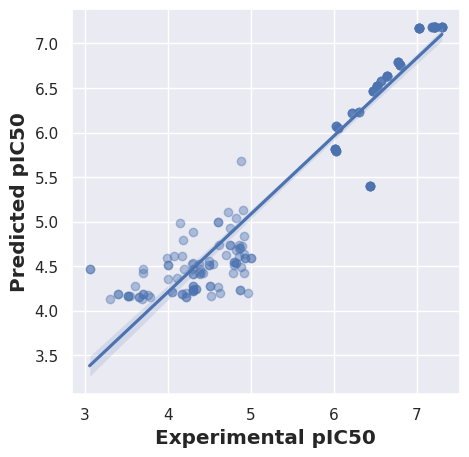

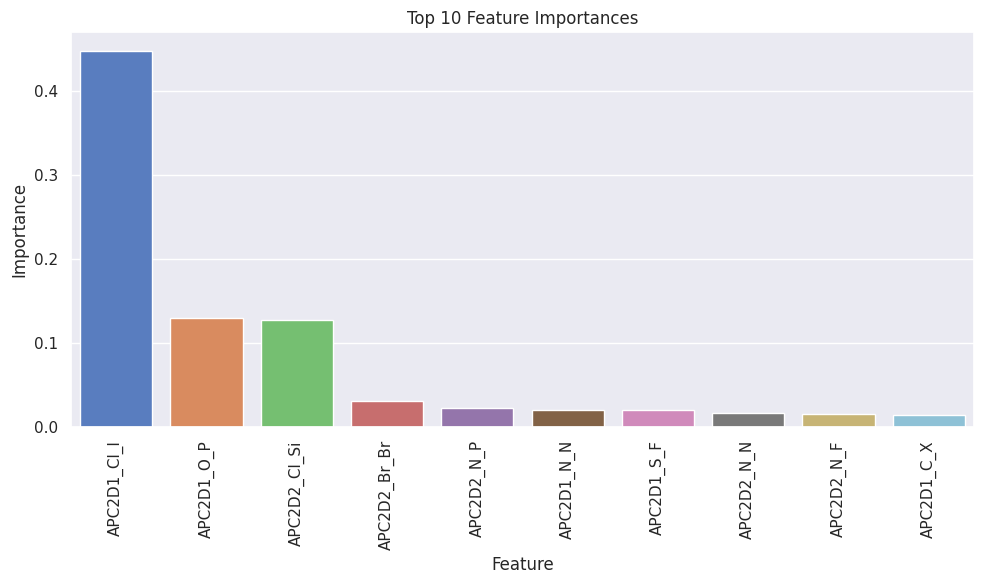

In [34]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [36]:
from rdkit import Chem
from rdkit import DataStructs

def calculate_distances(compounds):
    distances = []
    ref_fp = X_train  # Replace with your reference fingerprint
    
    for compound in compounds:
        fp = compounds  # Replace with your fingerprinting method
        distance = 1.0 - DataStructs.TanimotoSimilarity(ref_fp, fp)
        distances.append(distance)
    
    return distances

In [37]:
import matplotlib.pyplot as plt
import numpy as np


# Get the predicted values and distances
predicted_values = Y_pred
distances = calculate_distances(X_test)

# Define the threshold for the applicability domain
threshold = 0.5

# Determine if compounds are within the applicability domain
within_domain = np.array(distances) <= threshold

# Plot the results
plt.scatter(distances, predicted_values, c=within_domain, cmap='coolwarm')
plt.xlabel('Distance')
plt.ylabel('Predicted Values')
plt.title('Applicability Domain')
plt.colorbar(label='Within Domain')
plt.show()


ArgumentError: ignored

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.118729 |
+-------------------------+----------+
| Root Mean Squared Error | 0.340713 |
+-------------------------+----------+
| Mean Absolute Error     | 0.118729 |
+-------------------------+----------+
| R-squared Score         | 0.915054 |
+-------------------------+----------+


###Regression Model using Gradient Boosting Regression and Feature Importance

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0269395 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.164133  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.106815  |
+-------------------------+-----------+
| R-squared Score         | 0.982376  |
+-------------------------+-----------+


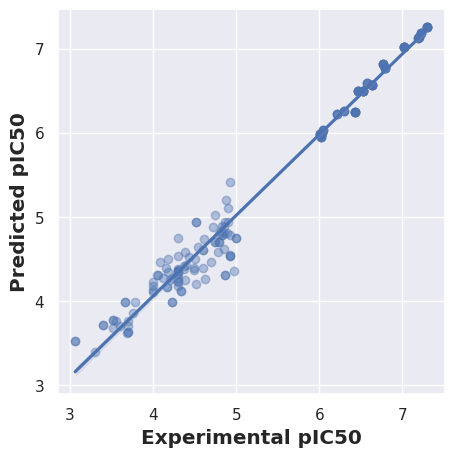

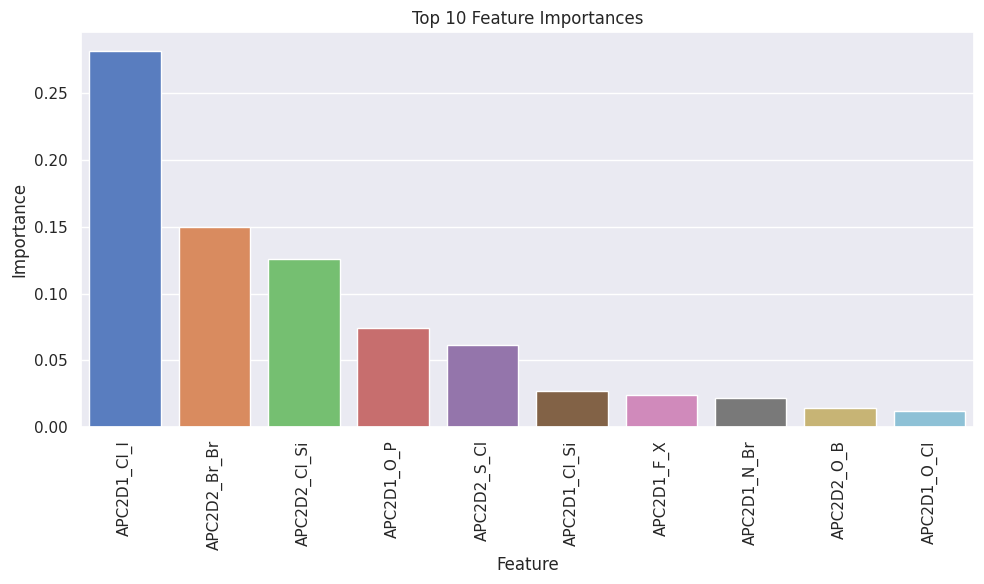

In [ ]:

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)

# Train the Gradient Boosting Regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.025357 |
+-------------------------+----------+
| Root Mean Squared Error | 0.158821 |
+-------------------------+----------+
| Mean Absolute Error     | 0.025357 |
+-------------------------+----------+
| R-squared Score         | 0.982468 |
+-------------------------+----------+


### Regression Model using SVR

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.308579 |
+-------------------------+----------+
| Root Mean Squared Error | 0.555499 |
+-------------------------+----------+
| Mean Absolute Error     | 0.343964 |
+-------------------------+----------+
| R-squared Score         | 0.798122 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

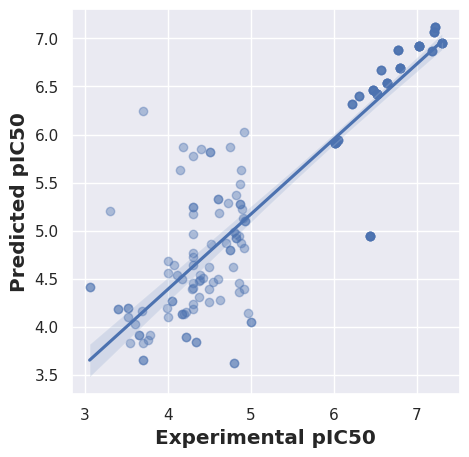

In [ ]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.222891 |
+-------------------------+----------+
| Root Mean Squared Error | 0.467711 |
+-------------------------+----------+
| Mean Absolute Error     | 0.222891 |
+-------------------------+----------+
| R-squared Score         | 0.846407 |
+-------------------------+----------+


### Multiple Linear Regression

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0586203 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.242116  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.151977  |
+-------------------------+-----------+
| R-squared Score         | 0.96165   |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

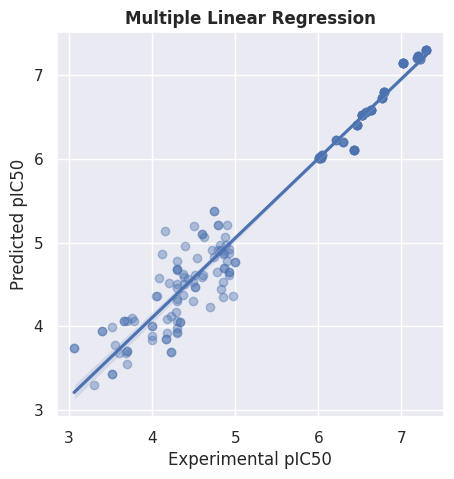

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Multiple Linear Regression', fontweight='bold')
plt.show


---
After K-Fold cross validation. 

In [ ]:
model = model = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0684098 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.260845  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0684098 |
+-------------------------+-----------+
| R-squared Score         | 0.952783  |
+-------------------------+-----------+


### Decision Tree Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.197699 |
+-------------------------+----------+
| Root Mean Squared Error | 0.444634 |
+-------------------------+----------+
| Mean Absolute Error     | 0.244804 |
+-------------------------+----------+
| R-squared Score         | 0.870661 |
+-------------------------+----------+


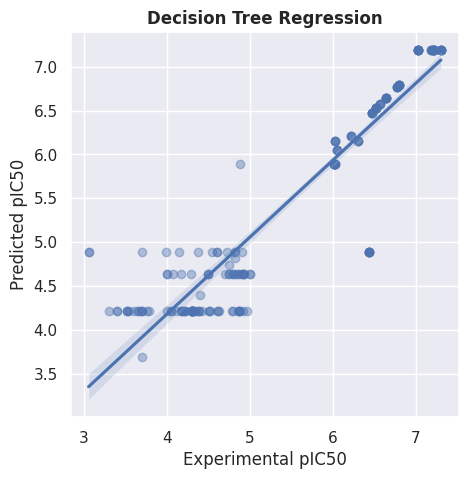

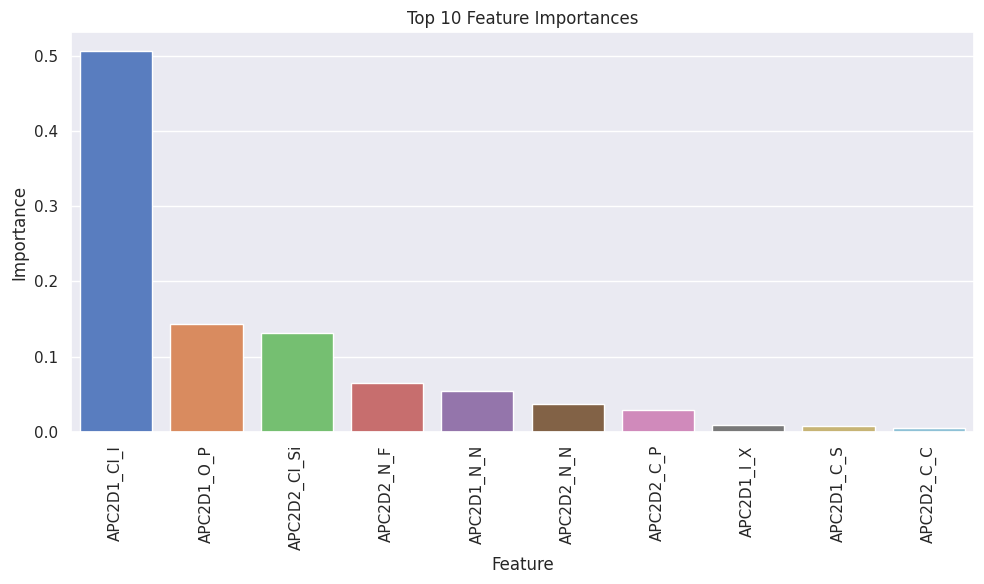

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Decision Tree Regression', fontweight='bold')
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.172125 |
+-------------------------+----------+
| Root Mean Squared Error | 0.409648 |
+-------------------------+----------+
| Mean Absolute Error     | 0.172125 |
+-------------------------+----------+
| R-squared Score         | 0.881387 |
+-------------------------+----------+


### Lasso Regression | L1 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.486818 |
+-------------------------+----------+
| Root Mean Squared Error | 0.697724 |
+-------------------------+----------+
| Mean Absolute Error     | 0.545841 |
+-------------------------+----------+
| R-squared Score         | 0.681514 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

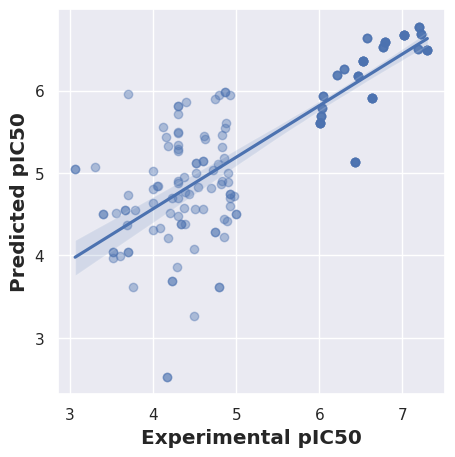

In [ ]:

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot

sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.426932 |
+-------------------------+----------+
| Root Mean Squared Error | 0.652389 |
+-------------------------+----------+
| Mean Absolute Error     | 0.426932 |
+-------------------------+----------+
| R-squared Score         | 0.705683 |
+-------------------------+----------+


### Ridge Regression | L2 Regularization

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0647485 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.254457  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.162297  |
+-------------------------+-----------+
| R-squared Score         | 0.95764   |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

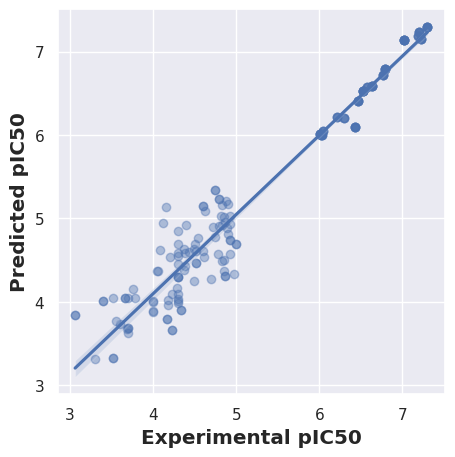

In [ ]:

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show




---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0718462 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.267473  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0718462 |
+-------------------------+-----------+
| R-squared Score         | 0.950381  |
+-------------------------+-----------+


### ElasticNet Regression | L3 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.529222 |
+-------------------------+----------+
| Root Mean Squared Error | 0.727476 |
+-------------------------+----------+
| Mean Absolute Error     | 0.581198 |
+-------------------------+----------+
| R-squared Score         | 0.653773 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

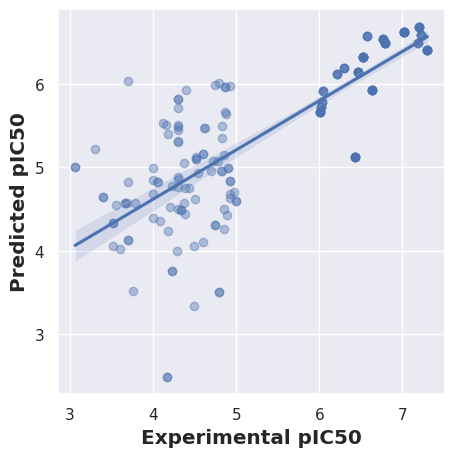

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.2, selection='random', random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, selection='cyclic', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.62228  |
+-------------------------+----------+
| Root Mean Squared Error | 0.788018 |
+-------------------------+----------+
| Mean Absolute Error     | 0.62228  |
+-------------------------+----------+
| R-squared Score         | 0.570994 |
+-------------------------+----------+


## AtomPairs2D

Feature count **780**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/atom2d.csv') 
df_fp

Name  AD2D1  AD2D2  AD2D3  AD2D4  AD2D5  AD2D6  AD2D7  \
0        AUTOGEN_molecule_1      1      1      1      1      0      0      1   
1        AUTOGEN_molecule_2      1      1      1      1      0      0      1   
2        AUTOGEN_molecule_3      1      1      1      1      0      0      1   
3        AUTOGEN_molecule_4      1      1      1      1      0      0      1   
4        AUTOGEN_molecule_5      1      1      1      1      0      0      1   
...                     ...    ...    ...    ...    ...    ...    ...    ...   
1416  AUTOGEN_molecule_1417      1      1      0      1      0      0      0   
1417  AUTOGEN_molecule_1418      1      1      1      0      0      0      0   
1418  AUTOGEN_molecule_1419      1      1      1      0      0      0      0   
1419  AUTOGEN_molecule_1420      1      1      1      0      0      0      0   
1420  AUTOGEN_molecule_1421      1      1      1      0      0      0      0   

      AD2D8  AD2D9  ...  AD2D771  AD2D772  AD2D773  AD2D774  AD2D775  AD2D776  \
0         0      0  ...        0        0        0        0        0        0   
1         0      0  ...        0        0        0        0        0        0   
2         0      0  ...        0        0        0        0        0        0   
3         0      0  ...        0        0        0        0        0        0   
4         0      0  ...        0        0        0        0        0        0   
...     ...    ...  ...      ...      ...      ...      ...      ...      ...   
1416      0      0  ...        0        0        0        0        0        0   
1417      0      1  ...        0        0        0        0        0        0   
1418      0      1  ...        0        0        0        0        0        0   
1419      0      1  ...        0        0        0        0        0        0   
1420      0      1  ...        0        0        0        0        0        0   

      AD2D777  AD2D778  AD2D779  AD2D780  
0           0        0        0        0  
1           0        0        0        0  
2           0        0        0        0  
3           0        0        0        0  
4           0        0        0        0  
...       ...      ...      ...      ...  
1416        0        0        0        0  
1417        0        0        0        0  
1418        0        0        0        0  
1419        0        0        0        0  
1420        0        0        0        0  

[1421 rows x 781 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['pIC50']

In [ ]:
X

AD2D1  AD2D2  AD2D3  AD2D4  AD2D5  AD2D6  AD2D7  AD2D8  AD2D9  AD2D10  \
0         1      1      1      1      0      0      1      0      0       0   
1         1      1      1      1      0      0      1      0      0       0   
2         1      1      1      1      0      0      1      0      0       0   
3         1      1      1      1      0      0      1      0      0       0   
4         1      1      1      1      0      0      1      0      0       0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
1416      1      1      0      1      0      0      0      0      0       0   
1417      1      1      1      0      0      0      0      0      1       0   
1418      1      1      1      0      0      0      0      0      1       0   
1419      1      1      1      0      0      0      0      0      1       0   
1420      1      1      1      0      0      0      0      0      1       0   

      ...  AD2D771  AD2D772  AD2D773  AD2D774  AD2D775  AD2D776  AD2D777  \
0     ...        0        0        0        0        0        0        0   
1     ...        0        0        0        0        0        0        0   
2     ...        0        0        0        0        0        0        0   
3     ...        0        0        0        0        0        0        0   
4     ...        0        0        0        0        0        0        0   
...   ...      ...      ...      ...      ...      ...      ...      ...   
1416  ...        0        0        0        0        0        0        0   
1417  ...        0        0        0        0        0        0        0   
1418  ...        0        0        0        0        0        0        0   
1419  ...        0        0        0        0        0        0        0   
1420  ...        0        0        0        0        0        0        0   

      AD2D778  AD2D779  AD2D780  
0           0        0        0  
1           0        0        0  
2           0        0        0  
3           0        0        0  
4           0        0        0  
...       ...      ...      ...  
1416        0        0        0  
1417        0        0        0  
1418        0        0        0  
1419        0        0        0  
1420        0        0        0  

[1421 rows x 780 columns]

In [ ]:
X.shape

(1421, 780)

In [ ]:
Y.shape

(1421,)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_columns = X.columns

In [ ]:
X_columns

Index(['AD2D1', 'AD2D2', 'AD2D3', 'AD2D4', 'AD2D5', 'AD2D6', 'AD2D7', 'AD2D8',
       'AD2D9', 'AD2D10',
       ...
       'AD2D771', 'AD2D772', 'AD2D773', 'AD2D774', 'AD2D775', 'AD2D776',
       'AD2D777', 'AD2D778', 'AD2D779', 'AD2D780'],
      dtype='object', length=780)

In [ ]:
type(Y)

pandas.core.series.Series

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 58)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 58), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 58), (213,))

### Models


- Multiple Linear Regression
- Polynomial Regression
- Robust Regression — RANSAC
- Decision Tree
- Random Forest
- Gaussian process regression
- Support Vector Regression




### Regression Model using Random Forrest with Feature Importance

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.10125  |
+-------------------------+----------+
| Root Mean Squared Error | 0.318198 |
+-------------------------+----------+
| Mean Absolute Error     | 0.203999 |
+-------------------------+----------+
| R-squared Score         | 0.93376  |
+-------------------------+----------+


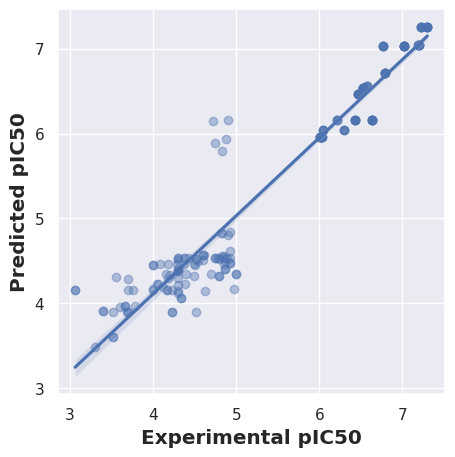

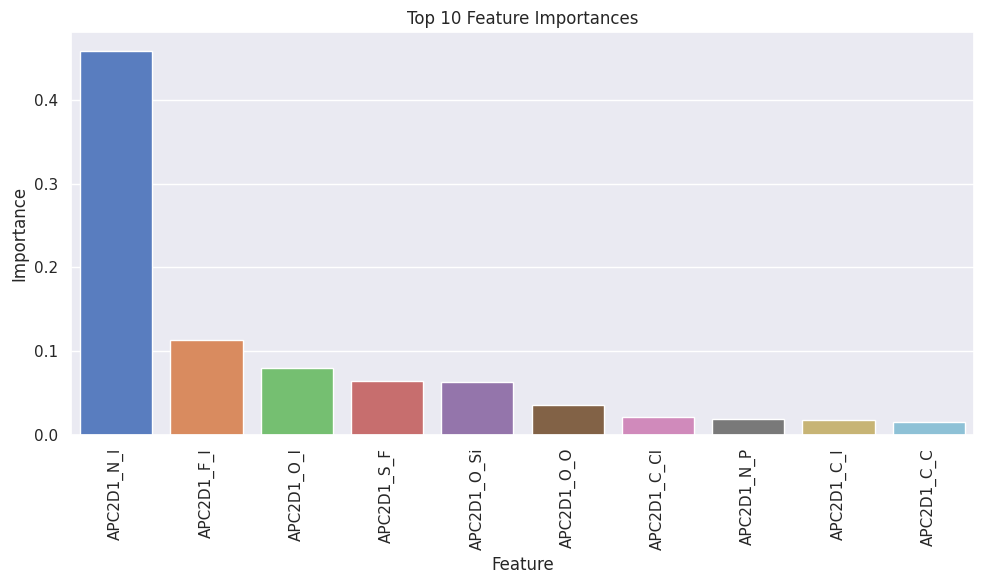

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

# Get the feature importances from the trained model
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Get the feature names
feature_names = X_columns

top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.115307 |
+-------------------------+----------+
| Root Mean Squared Error | 0.337519 |
+-------------------------+----------+
| Mean Absolute Error     | 0.115307 |
+-------------------------+----------+
| R-squared Score         | 0.92031  |
+-------------------------+----------+


###Regression Model using Gradient Boosting Regression and Feature Importance

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0918793 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.303116  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.193518  |
+-------------------------+-----------+
| R-squared Score         | 0.939891  |
+-------------------------+-----------+


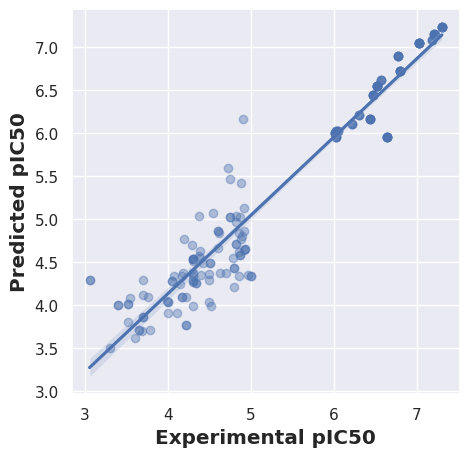

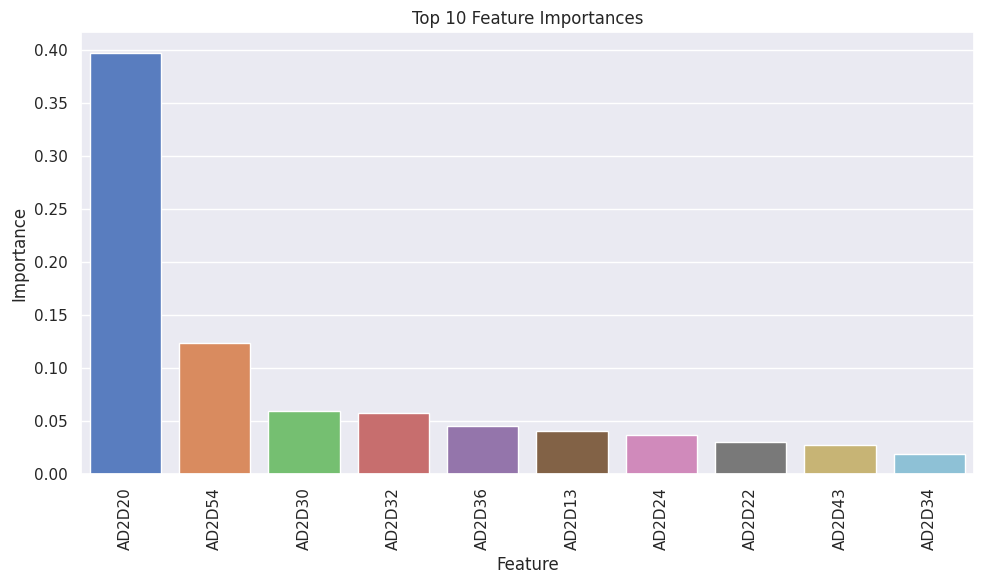

In [ ]:

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)

# Train the Gradient Boosting Regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Get the feature names
feature_names = X_columns

top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0962142 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.308501  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0962142 |
+-------------------------+-----------+
| R-squared Score         | 0.933552  |
+-------------------------+-----------+


### Regression Model using SVR

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.09497  |
+-------------------------+----------+
| Root Mean Squared Error | 0.308172 |
+-------------------------+----------+
| Mean Absolute Error     | 0.1939   |
+-------------------------+----------+
| R-squared Score         | 0.937869 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

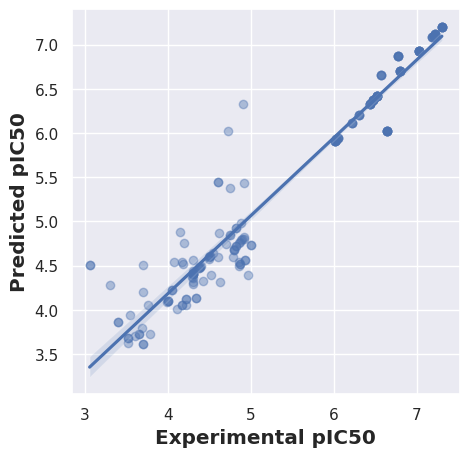

In [ ]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0888689 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.295778  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0888689 |
+-------------------------+-----------+
| R-squared Score         | 0.938728  |
+-------------------------+-----------+


### Multiple Linear Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.349183 |
+-------------------------+----------+
| Root Mean Squared Error | 0.590917 |
+-------------------------+----------+
| Mean Absolute Error     | 0.410549 |
+-------------------------+----------+
| R-squared Score         | 0.771558 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

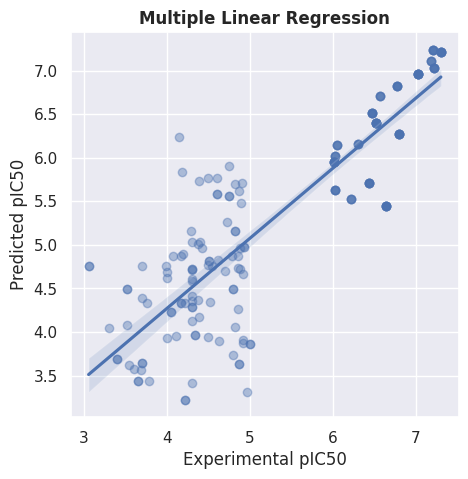

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Multiple Linear Regression', fontweight='bold')
plt.show


---
After K-Fold cross validation. 

In [ ]:
model = model = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.322247 |
+-------------------------+----------+
| Root Mean Squared Error | 0.565837 |
+-------------------------+----------+
| Mean Absolute Error     | 0.322247 |
+-------------------------+----------+
| R-squared Score         | 0.77728  |
+-------------------------+----------+


### Decision Tree Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.104621 |
+-------------------------+----------+
| Root Mean Squared Error | 0.323451 |
+-------------------------+----------+
| Mean Absolute Error     | 0.204641 |
+-------------------------+----------+
| R-squared Score         | 0.931555 |
+-------------------------+----------+


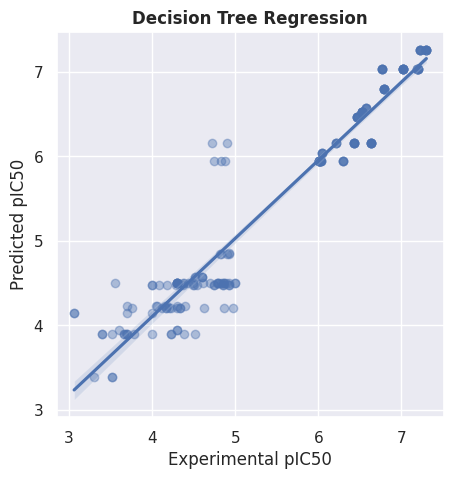

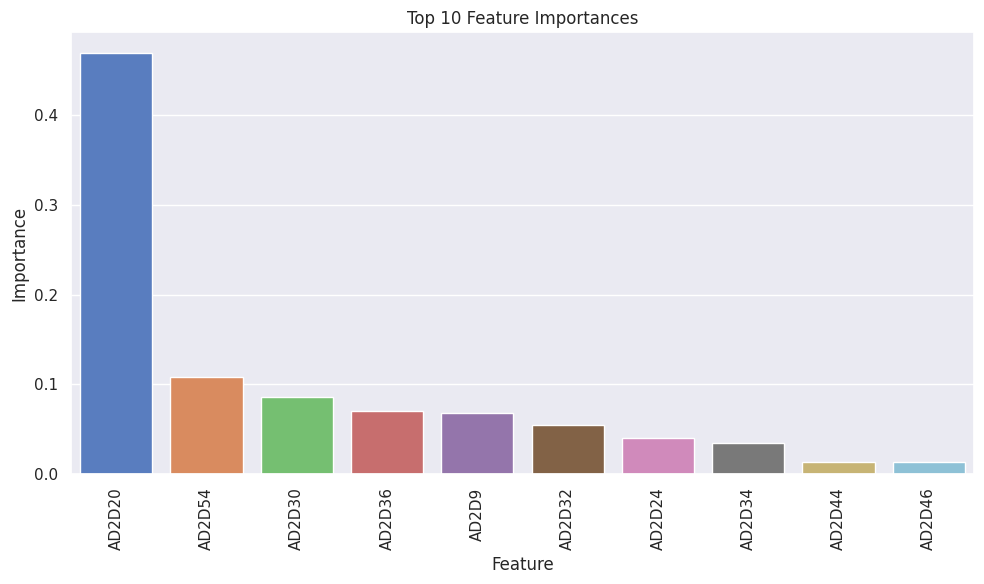

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Decision Tree Regression', fontweight='bold')
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Get the feature names
feature_names = X_columns

top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.126628 |
+-------------------------+----------+
| Root Mean Squared Error | 0.353626 |
+-------------------------+----------+
| Mean Absolute Error     | 0.126628 |
+-------------------------+----------+
| R-squared Score         | 0.912583 |
+-------------------------+----------+


### Lasso Regression | L1 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.699074 |
+-------------------------+----------+
| Root Mean Squared Error | 0.836106 |
+-------------------------+----------+
| Mean Absolute Error     | 0.683144 |
+-------------------------+----------+
| R-squared Score         | 0.542653 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

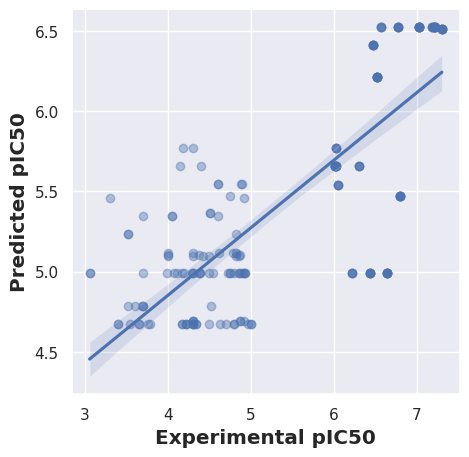

In [ ]:

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot

sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.64871  |
+-------------------------+----------+
| Root Mean Squared Error | 0.803172 |
+-------------------------+----------+
| Mean Absolute Error     | 0.64871  |
+-------------------------+----------+
| R-squared Score         | 0.552282 |
+-------------------------+----------+


### Ridge Regression | L2 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.349198 |
+-------------------------+----------+
| Root Mean Squared Error | 0.59093  |
+-------------------------+----------+
| Mean Absolute Error     | 0.415031 |
+-------------------------+----------+
| R-squared Score         | 0.771548 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

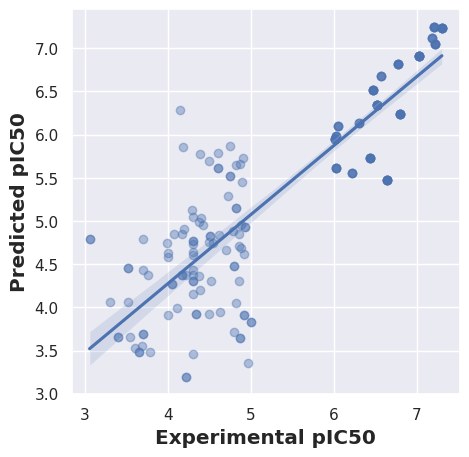

In [ ]:

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show




---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.322064 |
+-------------------------+----------+
| Root Mean Squared Error | 0.565684 |
+-------------------------+----------+
| Mean Absolute Error     | 0.322064 |
+-------------------------+----------+
| R-squared Score         | 0.777406 |
+-------------------------+----------+


### ElasticNet Regression | L3 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.862253 |
+-------------------------+----------+
| Root Mean Squared Error | 0.928576 |
+-------------------------+----------+
| Mean Absolute Error     | 0.81368  |
+-------------------------+----------+
| R-squared Score         | 0.435898 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

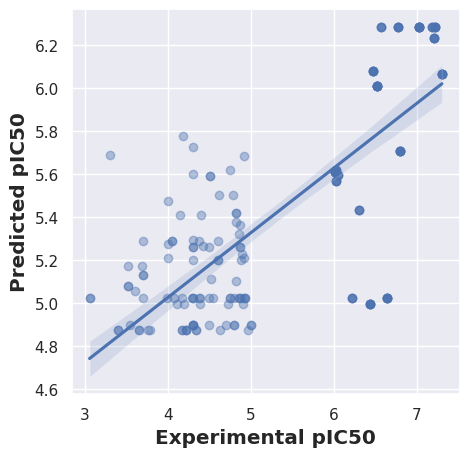

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.2, selection='random', random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, selection='cyclic', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 1.1542   |
+-------------------------+----------+
| Root Mean Squared Error | 1.07409  |
+-------------------------+----------+
| Mean Absolute Error     | 1.1542   |
+-------------------------+----------+
| R-squared Score         | 0.203866 |
+-------------------------+----------+


## CDK

Feature count **1024**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/cdk.csv') 
df_fp

Name  FP1  FP2  FP3  FP4  FP5  FP6  FP7  FP8  FP9  ...  \
0        AUTOGEN_molecule_1    0    0    0    0    0    0    0    0    0  ...   
1        AUTOGEN_molecule_2    0    0    0    0    0    0    0    0    0  ...   
2        AUTOGEN_molecule_3    0    0    0    0    0    0    0    0    0  ...   
3        AUTOGEN_molecule_4    0    0    0    0    0    0    0    0    0  ...   
4        AUTOGEN_molecule_5    0    0    0    0    0    0    0    0    0  ...   
...                     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1416  AUTOGEN_molecule_1417    0    0    0    0    0    0    0    0    0  ...   
1417  AUTOGEN_molecule_1418    0    0    0    0    1    0    0    0    0  ...   
1418  AUTOGEN_molecule_1419    0    0    0    0    1    0    0    0    0  ...   
1419  AUTOGEN_molecule_1420    0    0    0    0    1    0    0    0    0  ...   
1420  AUTOGEN_molecule_1421    0    0    0    0    1    0    0    0    0  ...   

      FP1015  FP1016  FP1017  FP1018  FP1019  FP1020  FP1021  FP1022  FP1023  \
0          0       1       1       0       0       0       0       0       0   
1          0       1       1       0       0       0       0       0       0   
2          0       1       1       0       0       0       0       0       0   
3          0       1       1       0       0       0       0       0       0   
4          0       1       1       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1416       0       1       0       0       0       0       0       0       0   
1417       0       0       0       0       0       1       0       0       0   
1418       0       0       0       0       0       1       0       0       0   
1419       0       0       0       0       0       1       0       0       0   
1420       0       0       0       0       0       1       0       0       0   

      FP1024  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
1416       0  
1417       0  
1418       0  
1419       0  
1420       0  

[1421 rows x 1025 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['pIC50']

In [ ]:
X

FP1  FP2  FP3  FP4  FP5  FP6  FP7  FP8  FP9  FP10  ...  FP1015  FP1016  \
0       0    0    0    0    0    0    0    0    0     0  ...       0       1   
1       0    0    0    0    0    0    0    0    0     0  ...       0       1   
2       0    0    0    0    0    0    0    0    0     0  ...       0       1   
3       0    0    0    0    0    0    0    0    0     0  ...       0       1   
4       0    0    0    0    0    0    0    0    0     0  ...       0       1   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...     ...   
1416    0    0    0    0    0    0    0    0    0     0  ...       0       1   
1417    0    0    0    0    1    0    0    0    0     0  ...       0       0   
1418    0    0    0    0    1    0    0    0    0     0  ...       0       0   
1419    0    0    0    0    1    0    0    0    0     0  ...       0       0   
1420    0    0    0    0    1    0    0    0    0     0  ...       0       0   

      FP1017  FP1018  FP1019  FP1020  FP1021  FP1022  FP1023  FP1024  
0          1       0       0       0       0       0       0       0  
1          1       0       0       0       0       0       0       0  
2          1       0       0       0       0       0       0       0  
3          1       0       0       0       0       0       0       0  
4          1       0       0       0       0       0       0       0  
...      ...     ...     ...     ...     ...     ...     ...     ...  
1416       0       0       0       0       0       0       0       0  
1417       0       0       0       1       0       0       0       0  
1418       0       0       0       1       0       0       0       0  
1419       0       0       0       1       0       0       0       0  
1420       0       0       0       1       0       0       0       0  

[1421 rows x 1024 columns]

In [ ]:
X.shape

(1421, 1024)

In [ ]:
Y.shape

(1421,)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_columns = X.columns

In [ ]:
X_columns

Index(['FP1', 'FP2', 'FP3', 'FP4', 'FP5', 'FP6', 'FP7', 'FP8', 'FP9', 'FP10',
       ...
       'FP1015', 'FP1016', 'FP1017', 'FP1018', 'FP1019', 'FP1020', 'FP1021',
       'FP1022', 'FP1023', 'FP1024'],
      dtype='object', length=1024)

In [ ]:
type(Y)

pandas.core.series.Series

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 589)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 589), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 589), (213,))

### Models


- Multiple Linear Regression
- Polynomial Regression
- Robust Regression — RANSAC
- Decision Tree
- Random Forest
- Gaussian process regression
- Support Vector Regression




### Regression Model using Random Forrest with Feature Importance

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0540739 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.232538  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.150266  |
+-------------------------+-----------+
| R-squared Score         | 0.964624  |
+-------------------------+-----------+


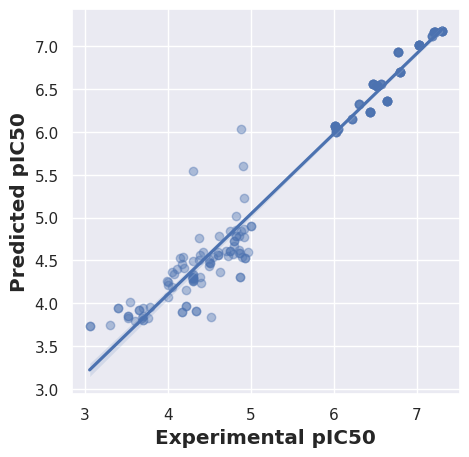

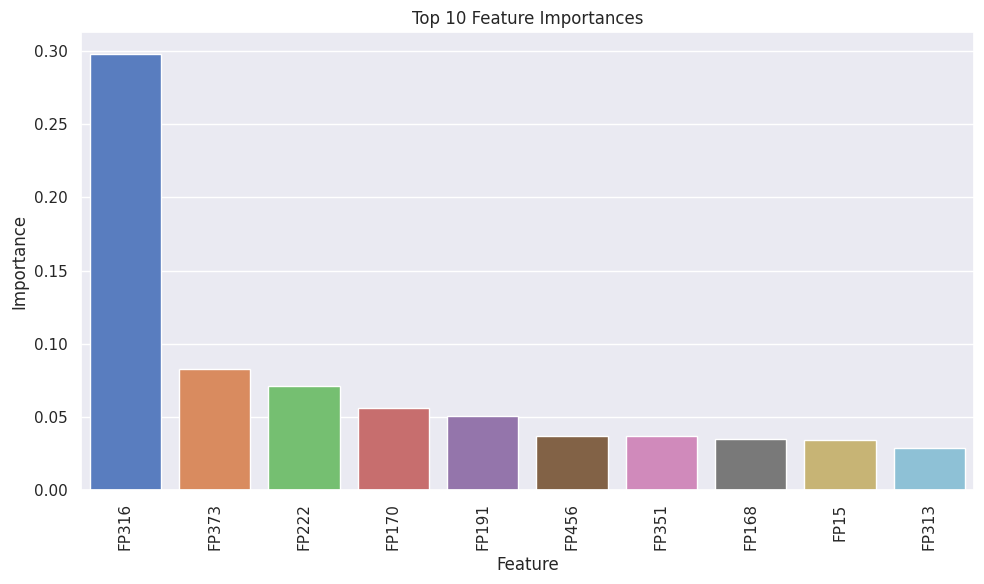

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0480763 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.217419  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0480763 |
+-------------------------+-----------+
| R-squared Score         | 0.966745  |
+-------------------------+-----------+


###Regression Model using Gradient Boosting Regression and Feature Importance

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0223502 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.1495    |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0876164 |
+-------------------------+-----------+
| R-squared Score         | 0.985378  |
+-------------------------+-----------+


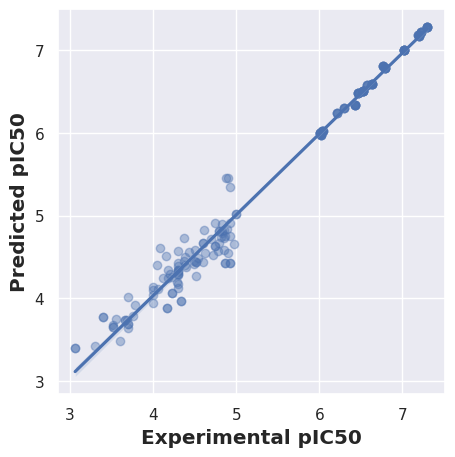

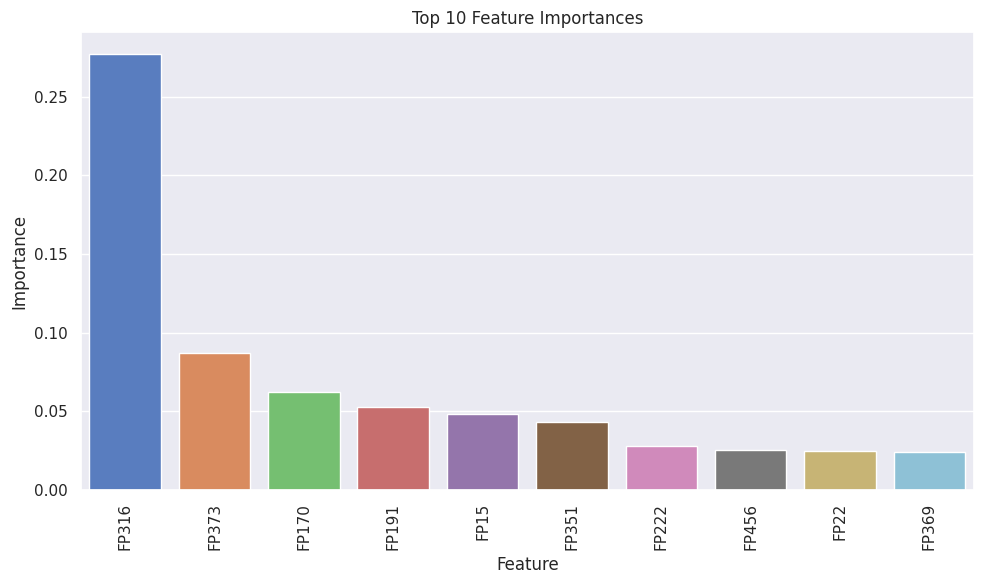

In [ ]:

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)

# Train the Gradient Boosting Regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0191103 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.137654  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0191103 |
+-------------------------+-----------+
| R-squared Score         | 0.986762  |
+-------------------------+-----------+


### Regression Model using SVR

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0214939 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.146608  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.109876  |
+-------------------------+-----------+
| R-squared Score         | 0.985938  |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

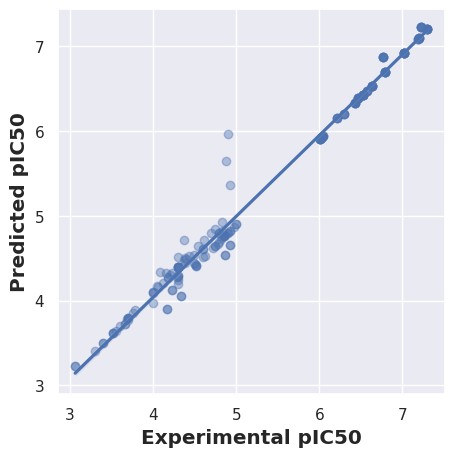

In [ ]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0183146 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.133554  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0183146 |
+-------------------------+-----------+
| R-squared Score         | 0.987288  |
+-------------------------+-----------+


### Multiple Linear Regression

+-------------------------+------------+
| Metric                  |      Value |
+=========================+============+
| Mean Squared Error      | 0.00520929 |
+-------------------------+------------+
| Root Mean Squared Error | 0.0721754  |
+-------------------------+------------+
| Mean Absolute Error     | 0.0153734  |
+-------------------------+------------+
| R-squared Score         | 0.996592   |
+-------------------------+------------+


<function matplotlib.pyplot.show(close=None, block=None)>

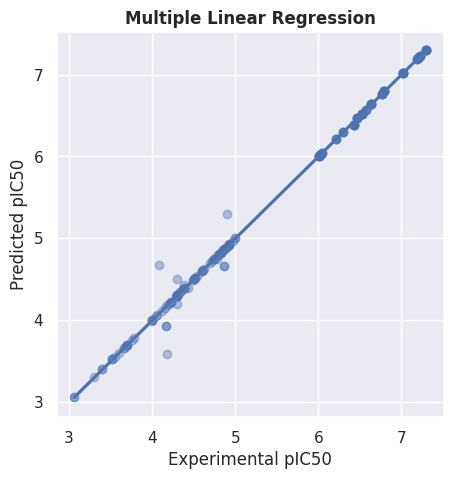

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Multiple Linear Regression', fontweight='bold')
plt.show


---
After K-Fold cross validation. 

In [ ]:
model = model = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+--------------+
| Metric                  |        Value |
+=========================+==============+
| Mean Squared Error      |  4.9754e+19  |
+-------------------------+--------------+
| Root Mean Squared Error |  4.83501e+09 |
+-------------------------+--------------+
| Mean Absolute Error     |  4.9754e+19  |
+-------------------------+--------------+
| R-squared Score         | -3.4245e+19  |
+-------------------------+--------------+


### Decision Tree Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.065113 |
+-------------------------+----------+
| Root Mean Squared Error | 0.255172 |
+-------------------------+----------+
| Mean Absolute Error     | 0.177265 |
+-------------------------+----------+
| R-squared Score         | 0.957402 |
+-------------------------+----------+


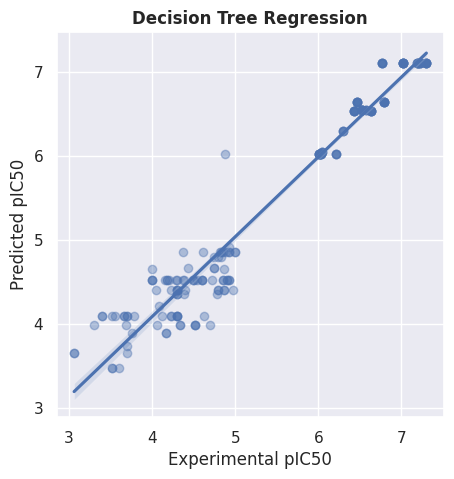

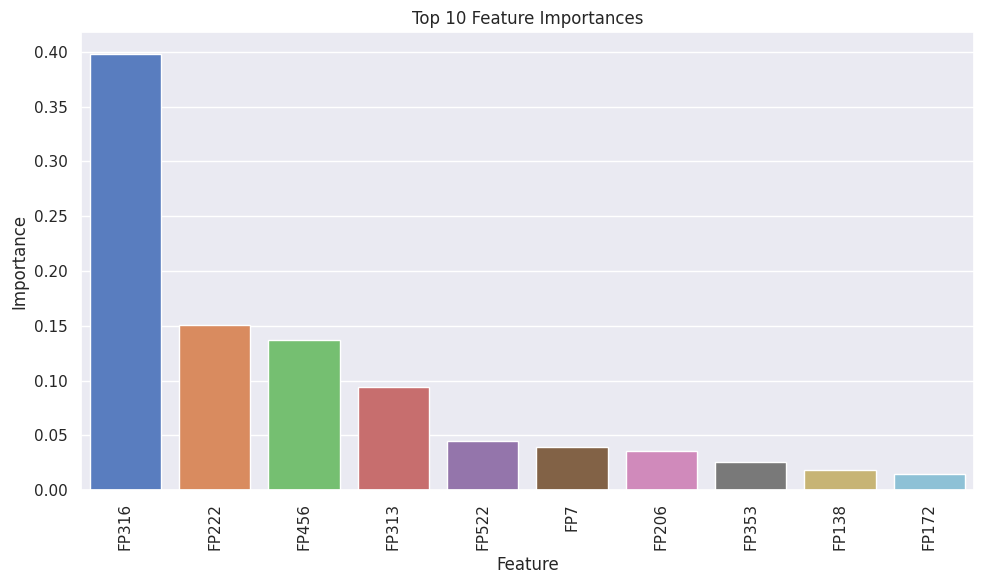

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Decision Tree Regression', fontweight='bold')
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0838843 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.288616  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0838843 |
+-------------------------+-----------+
| R-squared Score         | 0.941927  |
+-------------------------+-----------+


### Lasso Regression | L1 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.417666 |
+-------------------------+----------+
| Root Mean Squared Error | 0.646271 |
+-------------------------+----------+
| Mean Absolute Error     | 0.549076 |
+-------------------------+----------+
| R-squared Score         | 0.726755 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

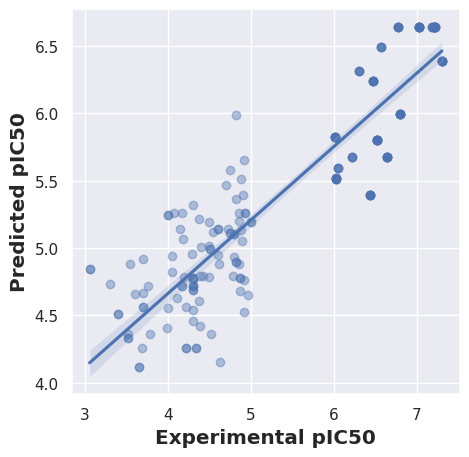

In [ ]:

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot

sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.400302 |
+-------------------------+----------+
| Root Mean Squared Error | 0.631925 |
+-------------------------+----------+
| Mean Absolute Error     | 0.400302 |
+-------------------------+----------+
| R-squared Score         | 0.723746 |
+-------------------------+----------+


### Ridge Regression | L2 Regularization

+-------------------------+------------+
| Metric                  |      Value |
+=========================+============+
| Mean Squared Error      | 0.00524611 |
+-------------------------+------------+
| Root Mean Squared Error | 0.0724301  |
+-------------------------+------------+
| Mean Absolute Error     | 0.017639   |
+-------------------------+------------+
| R-squared Score         | 0.996568   |
+-------------------------+------------+


<function matplotlib.pyplot.show(close=None, block=None)>

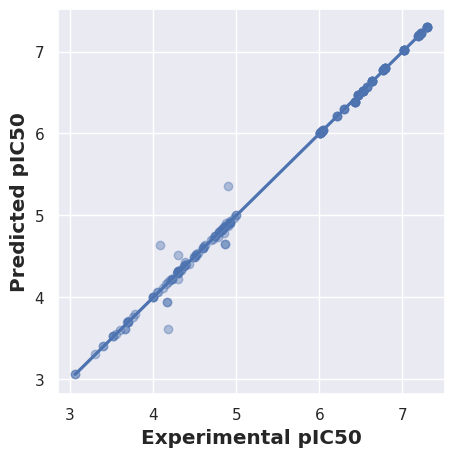

In [ ]:

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show




---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+------------+
| Metric                  |      Value |
+=========================+============+
| Mean Squared Error      | 0.00822182 |
+-------------------------+------------+
| Root Mean Squared Error | 0.0817238  |
+-------------------------+------------+
| Mean Absolute Error     | 0.00822182 |
+-------------------------+------------+
| R-squared Score         | 0.994257   |
+-------------------------+------------+


### ElasticNet Regression | L3 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.527978 |
+-------------------------+----------+
| Root Mean Squared Error | 0.726621 |
+-------------------------+----------+
| Mean Absolute Error     | 0.641956 |
+-------------------------+----------+
| R-squared Score         | 0.654587 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

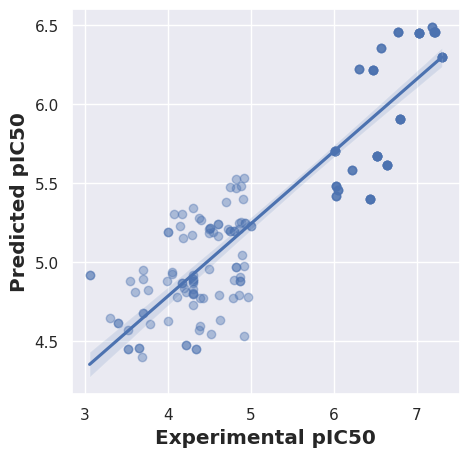

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.2, selection='random', random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, selection='cyclic', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 1.08567  |
+-------------------------+----------+
| Root Mean Squared Error | 1.04169  |
+-------------------------+----------+
| Mean Absolute Error     | 1.08567  |
+-------------------------+----------+
| R-squared Score         | 0.251169 |
+-------------------------+----------+


## CDK Graph

Feature count **1024**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/cdk_graph.csv') 
df_fp

Name  GraphFP1  GraphFP2  GraphFP3  GraphFP4  GraphFP5  \
0        AUTOGEN_molecule_1         0         0         0         0         0   
1        AUTOGEN_molecule_2         0         0         0         0         0   
2        AUTOGEN_molecule_3         0         0         0         0         0   
3        AUTOGEN_molecule_4         0         0         0         0         0   
4        AUTOGEN_molecule_5         0         0         0         0         0   
...                     ...       ...       ...       ...       ...       ...   
1416  AUTOGEN_molecule_1417         0         0         0         1         0   
1417  AUTOGEN_molecule_1418         0         0         0         0         0   
1418  AUTOGEN_molecule_1419         0         0         0         0         0   
1419  AUTOGEN_molecule_1420         0         0         0         0         0   
1420  AUTOGEN_molecule_1421         0         0         0         0         0   

      GraphFP6  GraphFP7  GraphFP8  GraphFP9  ...  GraphFP1015  GraphFP1016  \
0            0         0         0         0  ...            1            0   
1            0         0         0         0  ...            1            0   
2            0         0         0         0  ...            1            0   
3            0         0         0         0  ...            1            0   
4            0         0         0         0  ...            1            0   
...        ...       ...       ...       ...  ...          ...          ...   
1416         0         0         0         0  ...            0            0   
1417         0         1         0         0  ...            0            0   
1418         0         1         0         0  ...            0            0   
1419         0         1         0         0  ...            0            0   
1420         0         1         0         0  ...            0            0   

      GraphFP1017  GraphFP1018  GraphFP1019  GraphFP1020  GraphFP1021  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1416            0            0            0            0            0   
1417            0            0            0            0            0   
1418            0            0            0            0            0   
1419            0            0            0            0            0   
1420            0            0            0            0            0   

      GraphFP1022  GraphFP1023  GraphFP1024  
0               0            0            0  
1               0            0            0  
2               0            0            0  
3               0            0            0  
4               0            0            0  
...           ...          ...          ...  
1416            0            0            0  
1417            0            0            0  
1418            0            0            0  
1419            0            0            0  
1420            0            0            0  

[1421 rows x 1025 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['pIC50']

In [ ]:
X

GraphFP1  GraphFP2  GraphFP3  GraphFP4  GraphFP5  GraphFP6  GraphFP7  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
1416         0         0         0         1         0         0         0   
1417         0         0         0         0         0         0         1   
1418         0         0         0         0         0         0         1   
1419         0         0         0         0         0         0         1   
1420         0         0         0         0         0         0         1   

      GraphFP8  GraphFP9  GraphFP10  ...  GraphFP1015  GraphFP1016  \
0            0         0          1  ...            1            0   
1            0         0          1  ...            1            0   
2            0         0          1  ...            1            0   
3            0         0          1  ...            1            0   
4            0         0          1  ...            1            0   
...        ...       ...        ...  ...          ...          ...   
1416         0         0          0  ...            0            0   
1417         0         0          0  ...            0            0   
1418         0         0          0  ...            0            0   
1419         0         0          0  ...            0            0   
1420         0         0          0  ...            0            0   

      GraphFP1017  GraphFP1018  GraphFP1019  GraphFP1020  GraphFP1021  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1416            0            0            0            0            0   
1417            0            0            0            0            0   
1418            0            0            0            0            0   
1419            0            0            0            0            0   
1420            0            0            0            0            0   

      GraphFP1022  GraphFP1023  GraphFP1024  
0               0            0            0  
1               0            0            0  
2               0            0            0  
3               0            0            0  
4               0            0            0  
...           ...          ...          ...  
1416            0            0            0  
1417            0            0            0  
1418            0            0            0  
1419            0            0            0  
1420            0            0            0  

[1421 rows x 1024 columns]

In [ ]:
X.shape

(1421, 1024)

In [ ]:
Y.shape

(1421,)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_columns = X.columns

In [ ]:
X_columns

Index(['GraphFP1', 'GraphFP2', 'GraphFP3', 'GraphFP4', 'GraphFP5', 'GraphFP6',
       'GraphFP7', 'GraphFP8', 'GraphFP9', 'GraphFP10',
       ...
       'GraphFP1015', 'GraphFP1016', 'GraphFP1017', 'GraphFP1018',
       'GraphFP1019', 'GraphFP1020', 'GraphFP1021', 'GraphFP1022',
       'GraphFP1023', 'GraphFP1024'],
      dtype='object', length=1024)

In [ ]:
type(Y)

pandas.core.series.Series

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 266)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 266), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 266), (213,))

### Models


- Multiple Linear Regression
- Polynomial Regression
- Robust Regression — RANSAC
- Decision Tree
- Random Forest
- Gaussian process regression
- Support Vector Regression




### Regression Model using Random Forrest with Feature Importance

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0713591 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.267131  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.187011  |
+-------------------------+-----------+
| R-squared Score         | 0.953316  |
+-------------------------+-----------+


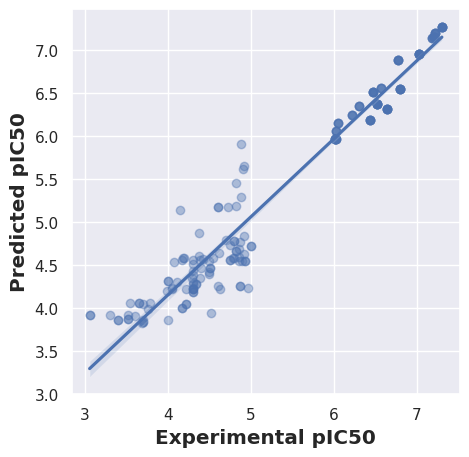

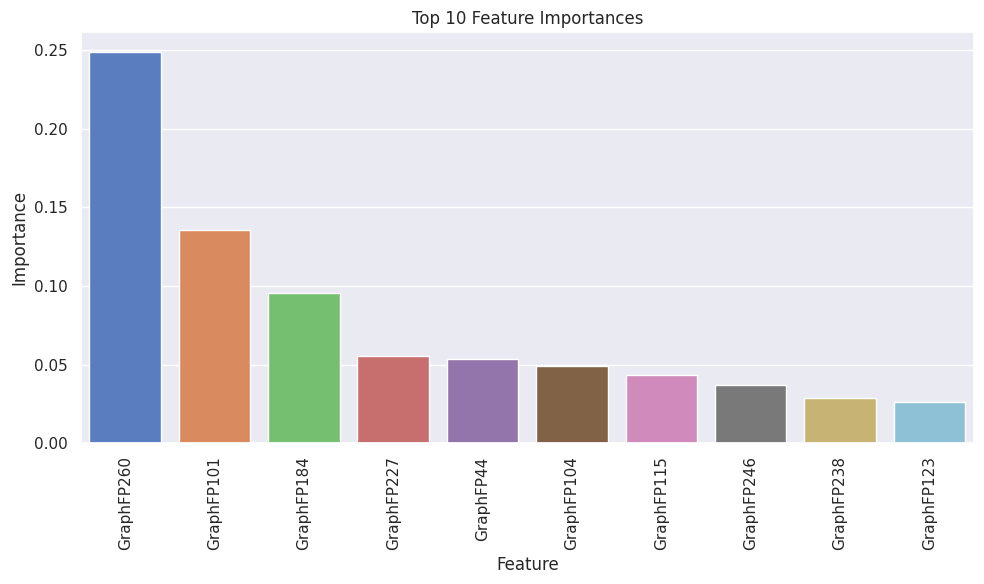

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0836429 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.287324  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0836429 |
+-------------------------+-----------+
| R-squared Score         | 0.942167  |
+-------------------------+-----------+


###Regression Model using Gradient Boosting Regression and Feature Importance

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0414365 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.203559  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.125987  |
+-------------------------+-----------+
| R-squared Score         | 0.972891  |
+-------------------------+-----------+


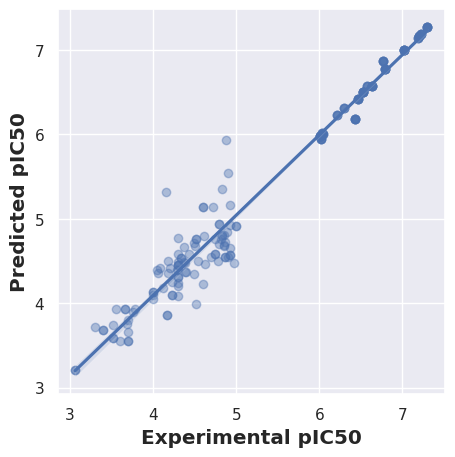

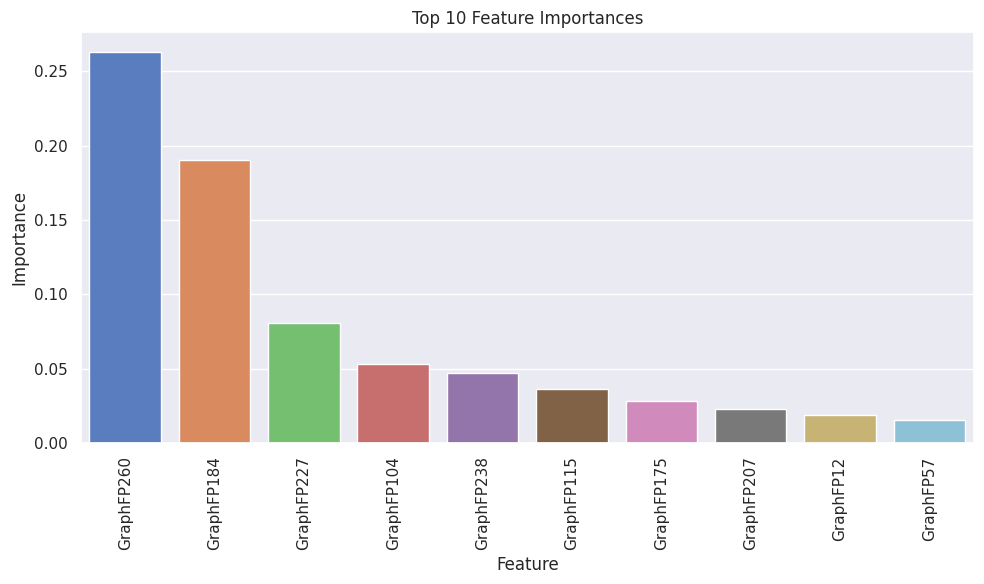

In [ ]:

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)

# Train the Gradient Boosting Regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0379809 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.193472  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0379809 |
+-------------------------+-----------+
| R-squared Score         | 0.973658  |
+-------------------------+-----------+


### Regression Model using SVR

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0622574 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.249514  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.141724  |
+-------------------------+-----------+
| R-squared Score         | 0.95927   |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

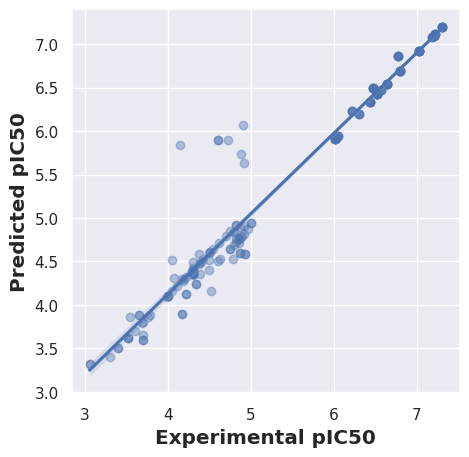

In [ ]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.033741 |
+-------------------------+----------+
| Root Mean Squared Error | 0.17601  |
+-------------------------+----------+
| Mean Absolute Error     | 0.033741 |
+-------------------------+----------+
| R-squared Score         | 0.976653 |
+-------------------------+----------+


### Multiple Linear Regression

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0104268 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.102112  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.035698  |
+-------------------------+-----------+
| R-squared Score         | 0.993179  |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

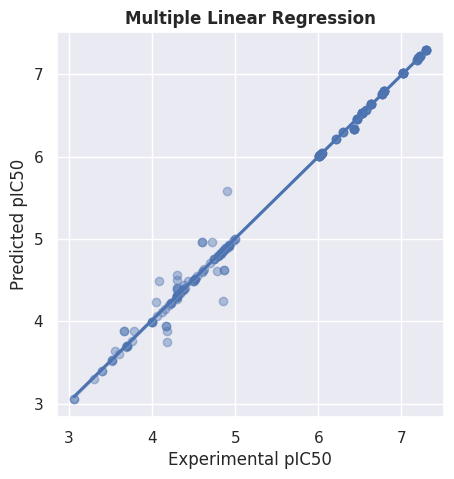

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Multiple Linear Regression', fontweight='bold')
plt.show


---
After K-Fold cross validation. 

In [ ]:
model = model = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+--------------+
| Metric                  |        Value |
+=========================+==============+
| Mean Squared Error      |  2.68842e+18 |
+-------------------------+--------------+
| Root Mean Squared Error |  6.49863e+08 |
+-------------------------+--------------+
| Mean Absolute Error     |  2.68842e+18 |
+-------------------------+--------------+
| R-squared Score         | -1.87679e+18 |
+-------------------------+--------------+


### Decision Tree Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.161112 |
+-------------------------+----------+
| Root Mean Squared Error | 0.401387 |
+-------------------------+----------+
| Mean Absolute Error     | 0.259503 |
+-------------------------+----------+
| R-squared Score         | 0.894598 |
+-------------------------+----------+


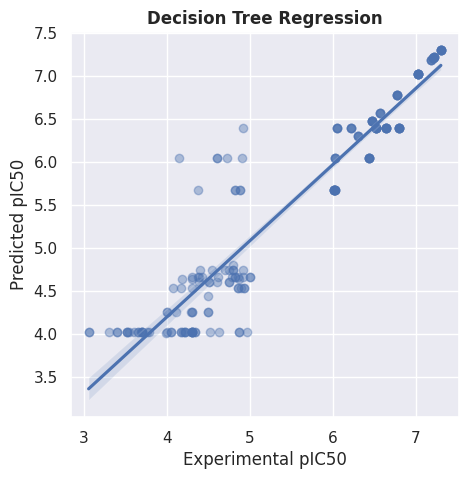

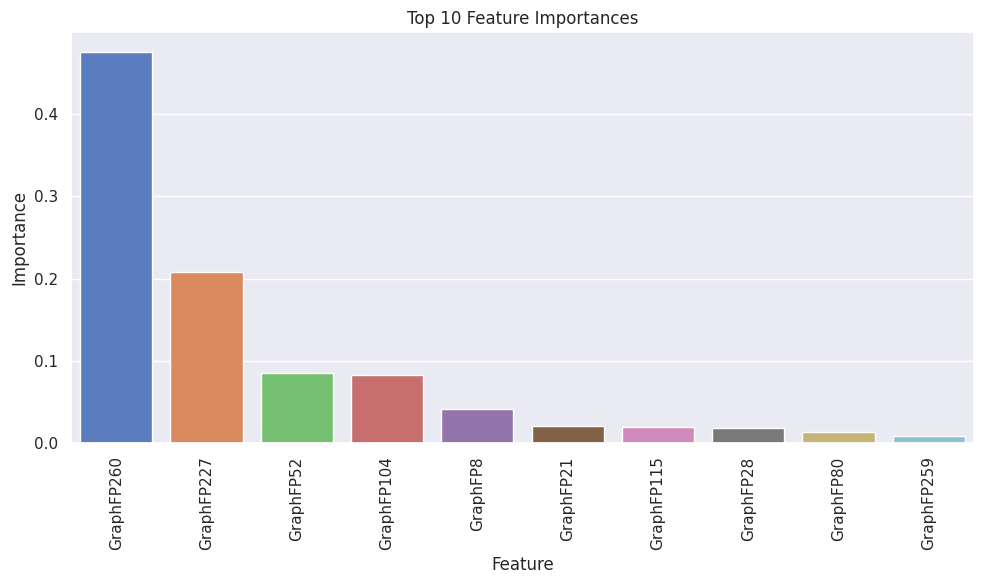

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Decision Tree Regression', fontweight='bold')
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.160794 |
+-------------------------+----------+
| Root Mean Squared Error | 0.398476 |
+-------------------------+----------+
| Mean Absolute Error     | 0.160794 |
+-------------------------+----------+
| R-squared Score         | 0.889187 |
+-------------------------+----------+


### Lasso Regression | L1 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.458449 |
+-------------------------+----------+
| Root Mean Squared Error | 0.677089 |
+-------------------------+----------+
| Mean Absolute Error     | 0.556891 |
+-------------------------+----------+
| R-squared Score         | 0.700074 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

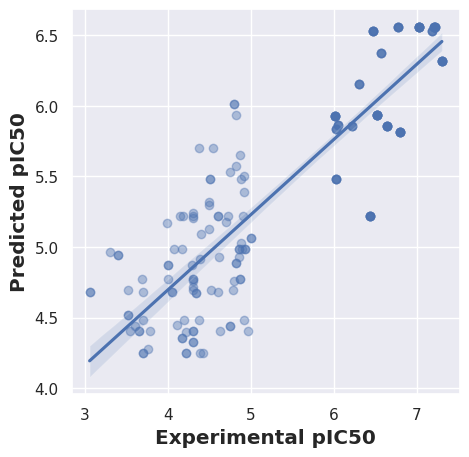

In [ ]:

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot

sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.412871 |
+-------------------------+----------+
| Root Mean Squared Error | 0.642231 |
+-------------------------+----------+
| Mean Absolute Error     | 0.412871 |
+-------------------------+----------+
| R-squared Score         | 0.714977 |
+-------------------------+----------+


### Ridge Regression | L2 Regularization

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0123303 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.111042  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0450288 |
+-------------------------+-----------+
| R-squared Score         | 0.991933  |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

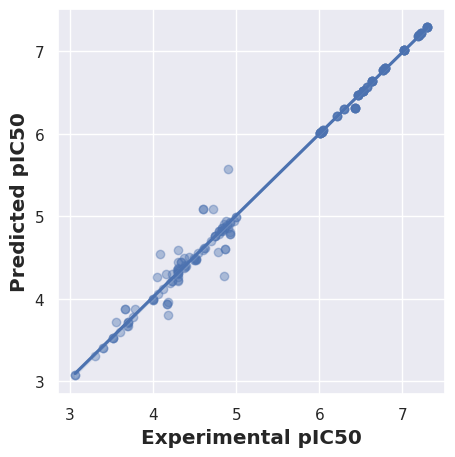

In [ ]:

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show




---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0111957 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.104563  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0111957 |
+-------------------------+-----------+
| R-squared Score         | 0.992264  |
+-------------------------+-----------+


### ElasticNet Regression | L3 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.594107 |
+-------------------------+----------+
| Root Mean Squared Error | 0.770784 |
+-------------------------+----------+
| Mean Absolute Error     | 0.668087 |
+-------------------------+----------+
| R-squared Score         | 0.611324 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

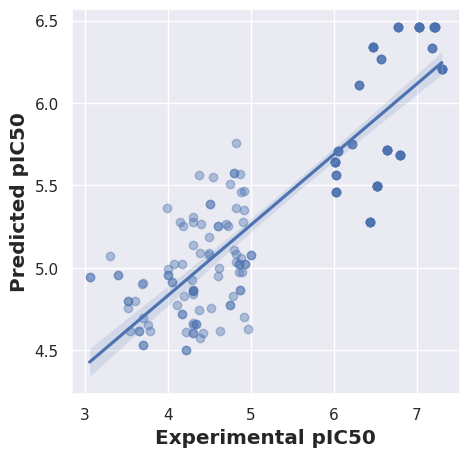

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.2, selection='random', random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, selection='cyclic', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 1.0084   |
+-------------------------+----------+
| Root Mean Squared Error | 1.00393  |
+-------------------------+----------+
| Mean Absolute Error     | 1.0084   |
+-------------------------+----------+
| R-squared Score         | 0.304556 |
+-------------------------+----------+


## CDK Extended

Feature count **1024**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/cdk_extended.csv') 
df_fp

Name  ExtFP1  ExtFP2  ExtFP3  ExtFP4  ExtFP5  ExtFP6  \
0        AUTOGEN_molecule_1       0       0       1       0       1       1   
1        AUTOGEN_molecule_2       0       0       1       0       1       1   
2        AUTOGEN_molecule_3       0       0       1       0       1       1   
3        AUTOGEN_molecule_4       0       0       1       0       1       1   
4        AUTOGEN_molecule_5       0       0       1       0       1       1   
...                     ...     ...     ...     ...     ...     ...     ...   
1416  AUTOGEN_molecule_1417       0       0       0       0       0       0   
1417  AUTOGEN_molecule_1418       0       0       0       0       1       0   
1418  AUTOGEN_molecule_1419       0       0       0       0       1       0   
1419  AUTOGEN_molecule_1420       0       0       0       0       1       0   
1420  AUTOGEN_molecule_1421       0       0       0       0       1       0   

      ExtFP7  ExtFP8  ExtFP9  ...  ExtFP1015  ExtFP1016  ExtFP1017  ExtFP1018  \
0          0       0       1  ...          0          0          0          0   
1          0       0       1  ...          0          0          0          0   
2          0       0       1  ...          0          0          0          0   
3          0       0       1  ...          0          0          0          0   
4          0       0       1  ...          0          0          0          0   
...      ...     ...     ...  ...        ...        ...        ...        ...   
1416       0       0       0  ...          0          0          0          0   
1417       0       1       0  ...          1          0          0          0   
1418       0       1       0  ...          1          0          0          0   
1419       0       1       0  ...          1          0          0          0   
1420       0       1       0  ...          1          0          0          0   

      ExtFP1019  ExtFP1020  ExtFP1021  ExtFP1022  ExtFP1023  ExtFP1024  
0             0          0          0          0          0          0  
1             0          0          0          0          0          0  
2             0          0          0          0          0          0  
3             0          0          0          0          0          0  
4             0          0          0          0          0          0  
...         ...        ...        ...        ...        ...        ...  
1416          0          0          0          0          0          0  
1417          0          0          0          0          0          0  
1418          0          0          0          0          0          0  
1419          0          0          0          0          0          0  
1420          0          0          0          0          0          0  

[1421 rows x 1025 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['pIC50']

In [ ]:
X

ExtFP1  ExtFP2  ExtFP3  ExtFP4  ExtFP5  ExtFP6  ExtFP7  ExtFP8  ExtFP9  \
0          0       0       1       0       1       1       0       0       1   
1          0       0       1       0       1       1       0       0       1   
2          0       0       1       0       1       1       0       0       1   
3          0       0       1       0       1       1       0       0       1   
4          0       0       1       0       1       1       0       0       1   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1416       0       0       0       0       0       0       0       0       0   
1417       0       0       0       0       1       0       0       1       0   
1418       0       0       0       0       1       0       0       1       0   
1419       0       0       0       0       1       0       0       1       0   
1420       0       0       0       0       1       0       0       1       0   

      ExtFP10  ...  ExtFP1015  ExtFP1016  ExtFP1017  ExtFP1018  ExtFP1019  \
0           0  ...          0          0          0          0          0   
1           0  ...          0          0          0          0          0   
2           0  ...          0          0          0          0          0   
3           0  ...          0          0          0          0          0   
4           0  ...          0          0          0          0          0   
...       ...  ...        ...        ...        ...        ...        ...   
1416        0  ...          0          0          0          0          0   
1417        0  ...          1          0          0          0          0   
1418        0  ...          1          0          0          0          0   
1419        0  ...          1          0          0          0          0   
1420        0  ...          1          0          0          0          0   

      ExtFP1020  ExtFP1021  ExtFP1022  ExtFP1023  ExtFP1024  
0             0          0          0          0          0  
1             0          0          0          0          0  
2             0          0          0          0          0  
3             0          0          0          0          0  
4             0          0          0          0          0  
...         ...        ...        ...        ...        ...  
1416          0          0          0          0          0  
1417          0          0          0          0          0  
1418          0          0          0          0          0  
1419          0          0          0          0          0  
1420          0          0          0          0          0  

[1421 rows x 1024 columns]

In [ ]:
X.shape

(1421, 1024)

In [ ]:
Y.shape

(1421,)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_columns = X.columns

In [ ]:
X_columns

Index(['ExtFP1', 'ExtFP2', 'ExtFP3', 'ExtFP4', 'ExtFP5', 'ExtFP6', 'ExtFP7',
       'ExtFP8', 'ExtFP9', 'ExtFP10',
       ...
       'ExtFP1015', 'ExtFP1016', 'ExtFP1017', 'ExtFP1018', 'ExtFP1019',
       'ExtFP1020', 'ExtFP1021', 'ExtFP1022', 'ExtFP1023', 'ExtFP1024'],
      dtype='object', length=1024)

In [ ]:
type(Y)

pandas.core.series.Series

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 601)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 601), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 601), (213,))

### Models


- Multiple Linear Regression
- Polynomial Regression
- Robust Regression — RANSAC
- Decision Tree
- Random Forest
- Gaussian process regression
- Support Vector Regression




### Regression Model using Random Forrest with Feature Importance

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0584528 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.24177   |
+-------------------------+-----------+
| Mean Absolute Error     | 0.158811  |
+-------------------------+-----------+
| R-squared Score         | 0.961759  |
+-------------------------+-----------+


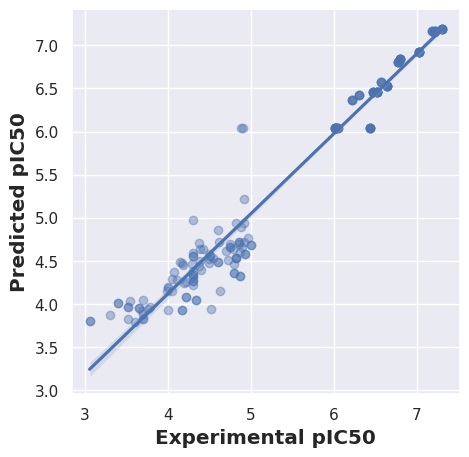

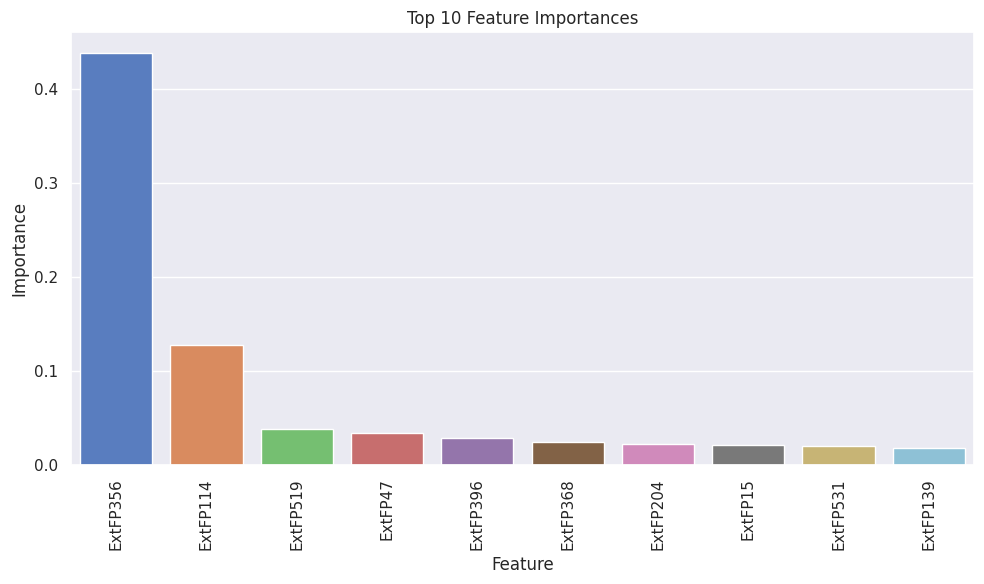

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0548257 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.232961  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0548257 |
+-------------------------+-----------+
| R-squared Score         | 0.962797  |
+-------------------------+-----------+


###Regression Model using Gradient Boosting Regression and Feature Importance

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0178271 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.133518  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0802388 |
+-------------------------+-----------+
| R-squared Score         | 0.988337  |
+-------------------------+-----------+


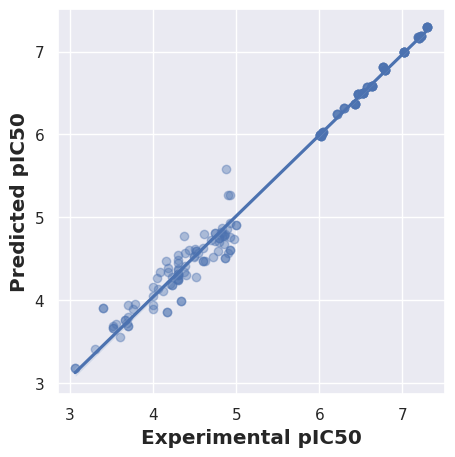

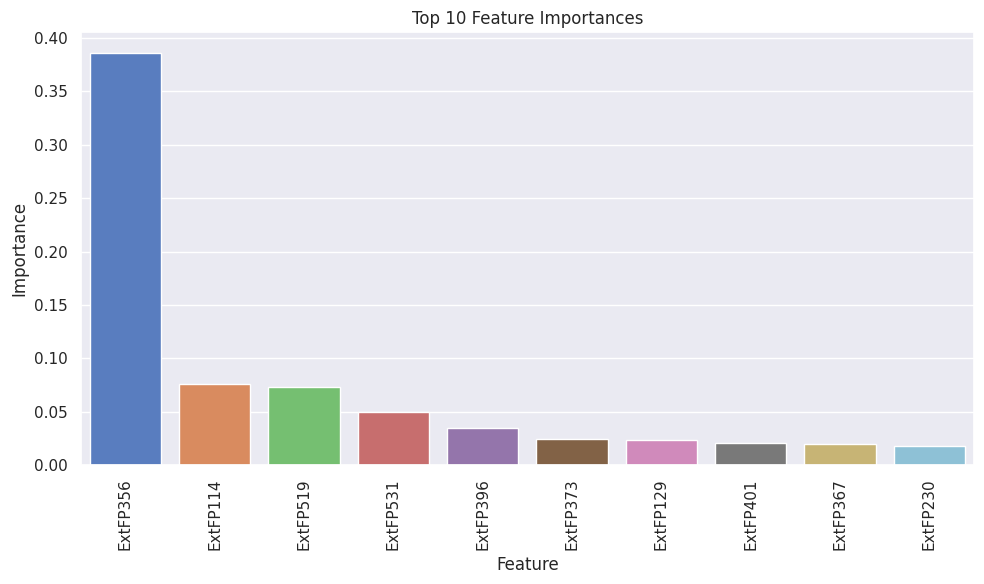

In [ ]:

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)

# Train the Gradient Boosting Regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0183601 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.134328  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0183601 |
+-------------------------+-----------+
| R-squared Score         | 0.987222  |
+-------------------------+-----------+


### Regression Model using SVR

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0168761 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.129908  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.105734  |
+-------------------------+-----------+
| R-squared Score         | 0.988959  |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

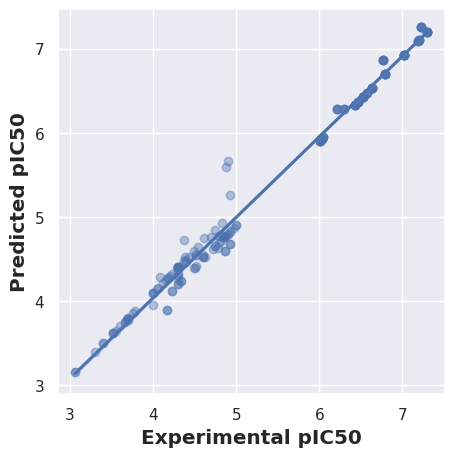

In [ ]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0166268 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.127679  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0166268 |
+-------------------------+-----------+
| R-squared Score         | 0.988448  |
+-------------------------+-----------+


### Multiple Linear Regression

+-------------------------+------------+
| Metric                  |      Value |
+=========================+============+
| Mean Squared Error      | 0.00114267 |
+-------------------------+------------+
| Root Mean Squared Error | 0.0338034  |
+-------------------------+------------+
| Mean Absolute Error     | 0.0070361  |
+-------------------------+------------+
| R-squared Score         | 0.999252   |
+-------------------------+------------+


<function matplotlib.pyplot.show(close=None, block=None)>

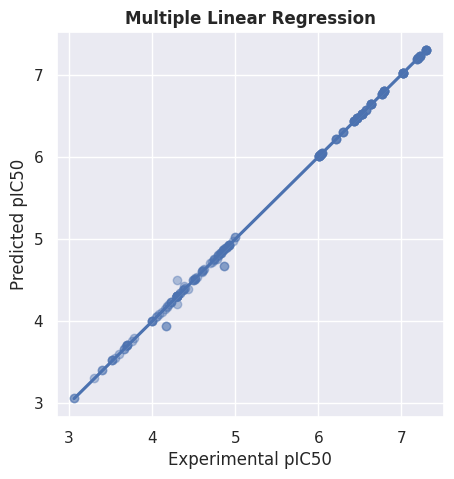

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Multiple Linear Regression', fontweight='bold')
plt.show


---
After K-Fold cross validation. 

In [ ]:
model = model = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+--------------+
| Metric                  |        Value |
+=========================+==============+
| Mean Squared Error      |  2.84242e+19 |
+-------------------------+--------------+
| Root Mean Squared Error |  3.14465e+09 |
+-------------------------+--------------+
| Mean Absolute Error     |  2.84242e+19 |
+-------------------------+--------------+
| R-squared Score         | -2.00817e+19 |
+-------------------------+--------------+


### Decision Tree Regression

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0615995 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.248192  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.144209  |
+-------------------------+-----------+
| R-squared Score         | 0.9597    |
+-------------------------+-----------+


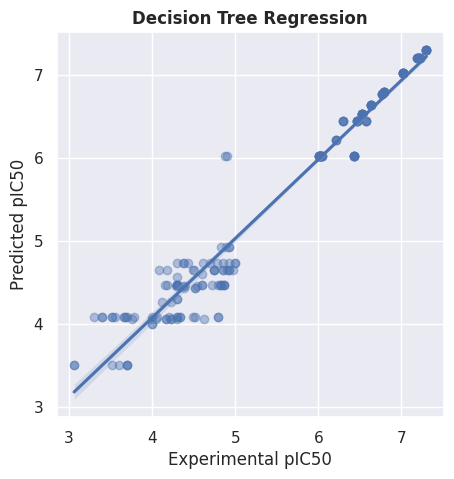

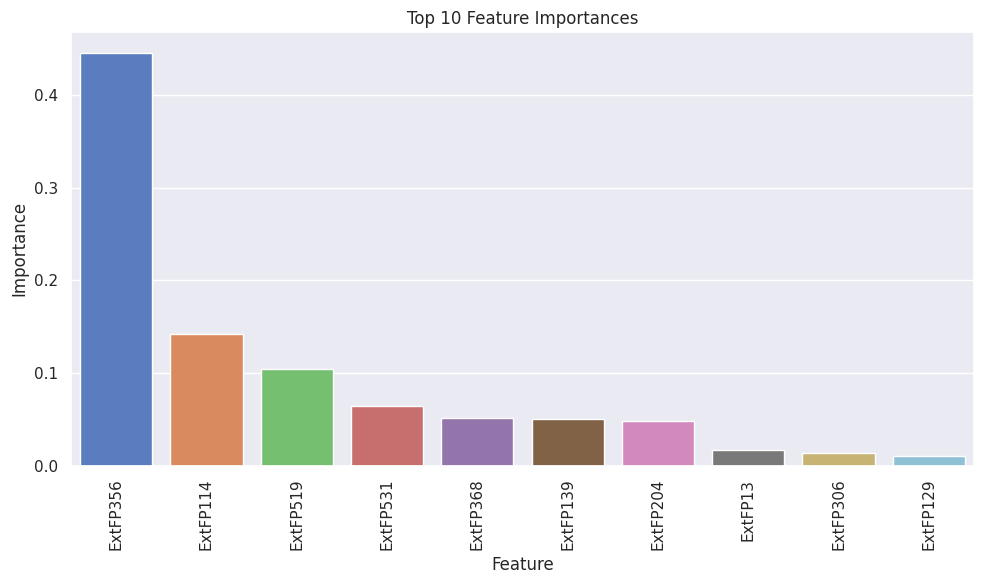

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Decision Tree Regression', fontweight='bold')
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0922053 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.301485  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0922053 |
+-------------------------+-----------+
| R-squared Score         | 0.936578  |
+-------------------------+-----------+


### Lasso Regression | L1 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.45965  |
+-------------------------+----------+
| Root Mean Squared Error | 0.677975 |
+-------------------------+----------+
| Mean Absolute Error     | 0.593649 |
+-------------------------+----------+
| R-squared Score         | 0.699288 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

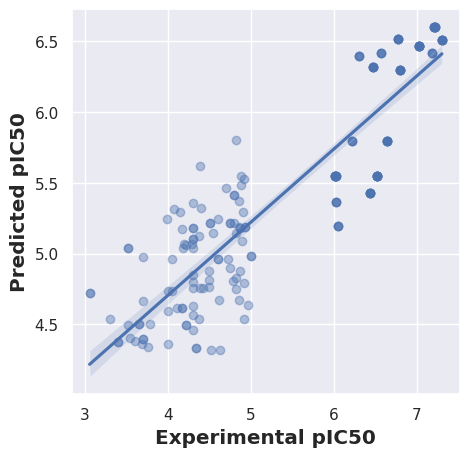

In [ ]:

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot

sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.4678   |
+-------------------------+----------+
| Root Mean Squared Error | 0.683316 |
+-------------------------+----------+
| Mean Absolute Error     | 0.4678   |
+-------------------------+----------+
| R-squared Score         | 0.677127 |
+-------------------------+----------+


### Ridge Regression | L2 Regularization

+-------------------------+------------+
| Metric                  |      Value |
+=========================+============+
| Mean Squared Error      | 0.00121253 |
+-------------------------+------------+
| Root Mean Squared Error | 0.0348214  |
+-------------------------+------------+
| Mean Absolute Error     | 0.00848429 |
+-------------------------+------------+
| R-squared Score         | 0.999207   |
+-------------------------+------------+


<function matplotlib.pyplot.show(close=None, block=None)>

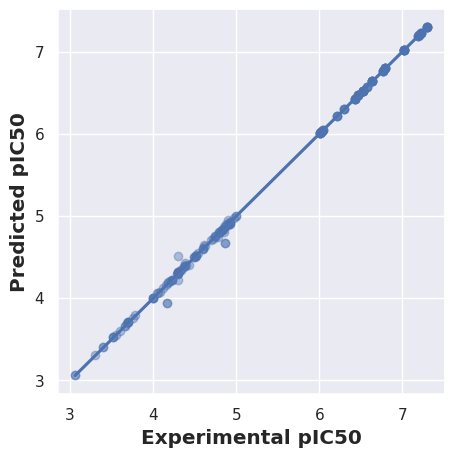

In [ ]:

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show




---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+------------+
| Metric                  |      Value |
+=========================+============+
| Mean Squared Error      | 0.00729659 |
+-------------------------+------------+
| Root Mean Squared Error | 0.0612898  |
+-------------------------+------------+
| Mean Absolute Error     | 0.00729659 |
+-------------------------+------------+
| R-squared Score         | 0.994844   |
+-------------------------+------------+


### ElasticNet Regression | L3 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.561678 |
+-------------------------+----------+
| Root Mean Squared Error | 0.749451 |
+-------------------------+----------+
| Mean Absolute Error     | 0.669479 |
+-------------------------+----------+
| R-squared Score         | 0.63254  |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

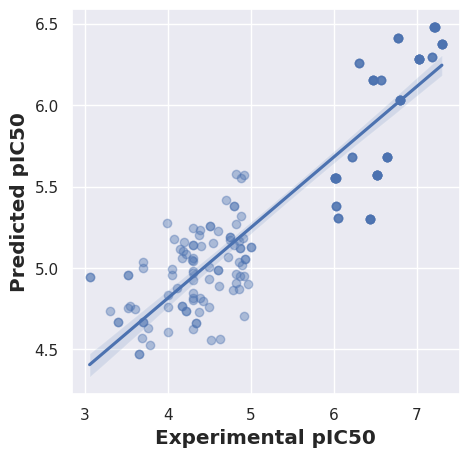

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.2, selection='random', random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, selection='cyclic', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 1.12925  |
+-------------------------+----------+
| Root Mean Squared Error | 1.06242  |
+-------------------------+----------+
| Mean Absolute Error     | 1.12925  |
+-------------------------+----------+
| R-squared Score         | 0.221144 |
+-------------------------+----------+


## Estate

Feature count **79**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/estate.csv') 
df_fp

Name  EStateFP1  EStateFP2  EStateFP3  EStateFP4  \
0        AUTOGEN_molecule_1          0          0          0          0   
1        AUTOGEN_molecule_2          0          0          0          0   
2        AUTOGEN_molecule_3          0          0          0          0   
3        AUTOGEN_molecule_4          0          0          0          0   
4        AUTOGEN_molecule_5          0          0          0          0   
...                     ...        ...        ...        ...        ...   
1416  AUTOGEN_molecule_1417          0          0          0          0   
1417  AUTOGEN_molecule_1418          0          0          0          0   
1418  AUTOGEN_molecule_1419          0          0          0          0   
1419  AUTOGEN_molecule_1420          0          0          0          0   
1420  AUTOGEN_molecule_1421          0          0          0          0   

      EStateFP5  EStateFP6  EStateFP7  EStateFP8  EStateFP9  ...  EStateFP70  \
0             0          0          1          0          1  ...           0   
1             0          0          1          0          1  ...           0   
2             0          0          1          0          1  ...           0   
3             0          0          1          0          1  ...           0   
4             0          0          1          0          1  ...           0   
...         ...        ...        ...        ...        ...  ...         ...   
1416          0          0          0          0          0  ...           0   
1417          0          0          1          0          1  ...           0   
1418          0          0          1          0          1  ...           0   
1419          0          0          1          0          1  ...           0   
1420          0          0          1          0          1  ...           0   

      EStateFP71  EStateFP72  EStateFP73  EStateFP74  EStateFP75  EStateFP76  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
1416           0           0           0           0           0           0   
1417           0           0           0           0           1           0   
1418           0           0           0           0           1           0   
1419           0           0           0           0           1           0   
1420           0           0           0           0           1           0   

      EStateFP77  EStateFP78  EStateFP79  
0              0           0           0  
1              0           0           0  
2              0           0           0  
3              0           0           0  
4              0           0           0  
...          ...         ...         ...  
1416           0           0           0  
1417           0           0           0  
1418           0           0           0  
1419           0           0           0  
1420           0           0           0  

[1421 rows x 80 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['pIC50']

In [ ]:
X

EStateFP1  EStateFP2  EStateFP3  EStateFP4  EStateFP5  EStateFP6  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          0          0          0   
4             0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
1416          0          0          0          0          0          0   
1417          0          0          0          0          0          0   
1418          0          0          0          0          0          0   
1419          0          0          0          0          0          0   
1420          0          0          0          0          0          0   

      EStateFP7  EStateFP8  EStateFP9  EStateFP10  ...  EStateFP70  \
0             1          0          1           0  ...           0   
1             1          0          1           0  ...           0   
2             1          0          1           0  ...           0   
3             1          0          1           0  ...           0   
4             1          0          1           0  ...           0   
...         ...        ...        ...         ...  ...         ...   
1416          0          0          0           0  ...           0   
1417          1          0          1           0  ...           0   
1418          1          0          1           0  ...           0   
1419          1          0          1           0  ...           0   
1420          1          0          1           0  ...           0   

      EStateFP71  EStateFP72  EStateFP73  EStateFP74  EStateFP75  EStateFP76  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
1416           0           0           0           0           0           0   
1417           0           0           0           0           1           0   
1418           0           0           0           0           1           0   
1419           0           0           0           0           1           0   
1420           0           0           0           0           1           0   

      EStateFP77  EStateFP78  EStateFP79  
0              0           0           0  
1              0           0           0  
2              0           0           0  
3              0           0           0  
4              0           0           0  
...          ...         ...         ...  
1416           0           0           0  
1417           0           0           0  
1418           0           0           0  
1419           0           0           0  
1420           0           0           0  

[1421 rows x 79 columns]

In [ ]:
X.shape

(1421, 79)

In [ ]:
Y.shape

(1421,)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_columns = X.columns

In [ ]:
X_columns

Index(['EStateFP1', 'EStateFP2', 'EStateFP3', 'EStateFP4', 'EStateFP5',
       'EStateFP6', 'EStateFP7', 'EStateFP8', 'EStateFP9', 'EStateFP10',
       'EStateFP11', 'EStateFP12', 'EStateFP13', 'EStateFP14', 'EStateFP15',
       'EStateFP16', 'EStateFP17', 'EStateFP18', 'EStateFP19', 'EStateFP20',
       'EStateFP21', 'EStateFP22', 'EStateFP23', 'EStateFP24', 'EStateFP25',
       'EStateFP26', 'EStateFP27', 'EStateFP28', 'EStateFP29', 'EStateFP30',
       'EStateFP31', 'EStateFP32', 'EStateFP33', 'EStateFP34', 'EStateFP35',
       'EStateFP36', 'EStateFP37', 'EStateFP38', 'EStateFP39', 'EStateFP40',
       'EStateFP41', 'EStateFP42', 'EStateFP43', 'EStateFP44', 'EStateFP45',
       'EStateFP46', 'EStateFP47', 'EStateFP48', 'EStateFP49', 'EStateFP50',
       'EStateFP51', 'EStateFP52', 'EStateFP53', 'EStateFP54', 'EStateFP55',
       'EStateFP56', 'EStateFP57', 'EStateFP58', 'EStateFP59', 'EStateFP60',
       'EStateFP61', 'EStateFP62', 'EStateFP63', 'EStateFP64', 'EStateFP65',
       '

In [ ]:
type(Y)

pandas.core.series.Series

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 12)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 12), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 12), (213,))

### Models


- Multiple Linear Regression
- Polynomial Regression
- Robust Regression — RANSAC
- Decision Tree
- Random Forest
- Gaussian process regression
- Support Vector Regression




### Regression Model using Random Forrest with Feature Importance

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.197104 |
+-------------------------+----------+
| Root Mean Squared Error | 0.443963 |
+-------------------------+----------+
| Mean Absolute Error     | 0.283921 |
+-------------------------+----------+
| R-squared Score         | 0.871051 |
+-------------------------+----------+


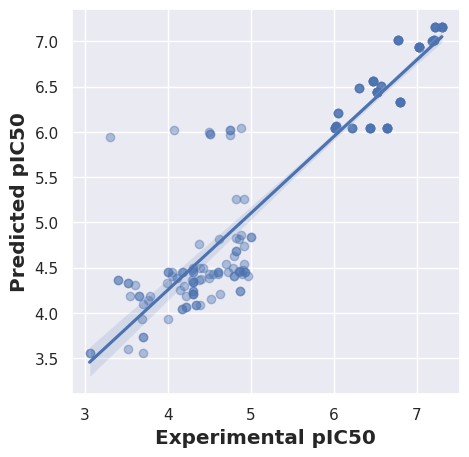

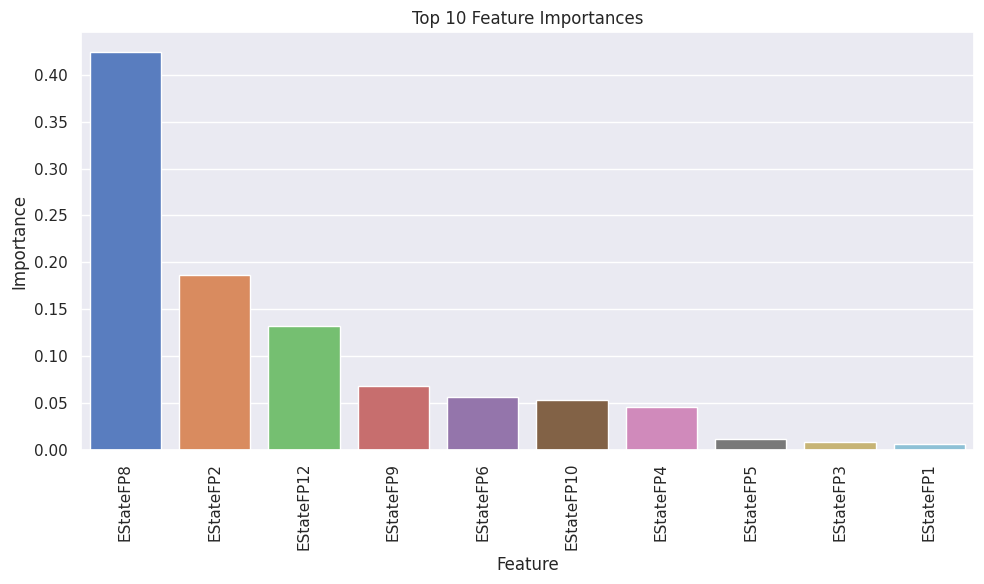

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.164238 |
+-------------------------+----------+
| Root Mean Squared Error | 0.403727 |
+-------------------------+----------+
| Mean Absolute Error     | 0.164238 |
+-------------------------+----------+
| R-squared Score         | 0.886471 |
+-------------------------+----------+


###Regression Model using Gradient Boosting Regression and Feature Importance

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.141422 |
+-------------------------+----------+
| Root Mean Squared Error | 0.376061 |
+-------------------------+----------+
| Mean Absolute Error     | 0.28095  |
+-------------------------+----------+
| R-squared Score         | 0.907479 |
+-------------------------+----------+


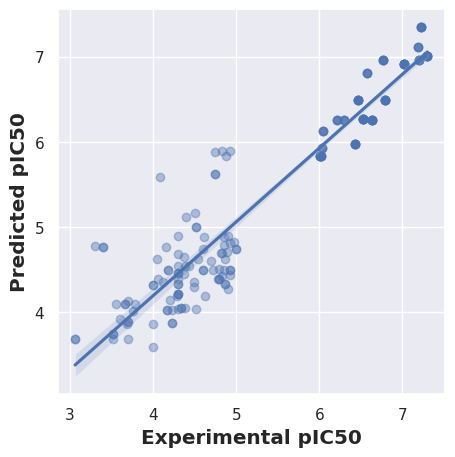

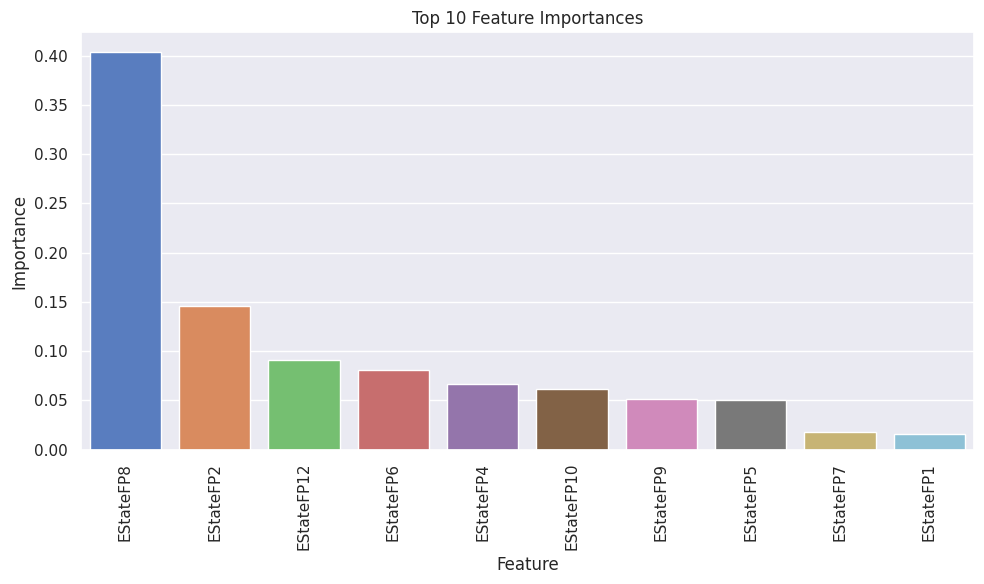

In [ ]:

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)

# Train the Gradient Boosting Regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.139955 |
+-------------------------+----------+
| Root Mean Squared Error | 0.37357  |
+-------------------------+----------+
| Mean Absolute Error     | 0.139955 |
+-------------------------+----------+
| R-squared Score         | 0.903146 |
+-------------------------+----------+


### Regression Model using SVR

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0561939 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.237053  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.165938  |
+-------------------------+-----------+
| R-squared Score         | 0.963237  |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

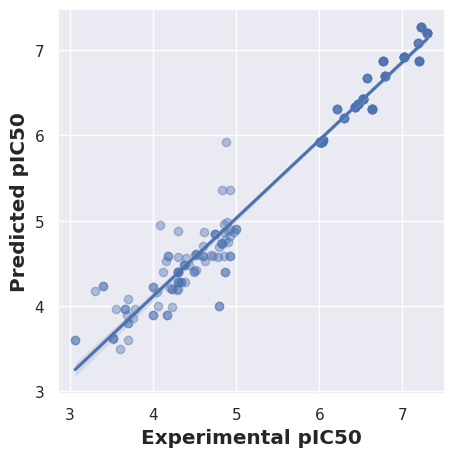

In [ ]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0602873 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.244711  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0602873 |
+-------------------------+-----------+
| R-squared Score         | 0.958272  |
+-------------------------+-----------+


### Multiple Linear Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.595061 |
+-------------------------+----------+
| Root Mean Squared Error | 0.771402 |
+-------------------------+----------+
| Mean Absolute Error     | 0.598857 |
+-------------------------+----------+
| R-squared Score         | 0.6107   |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

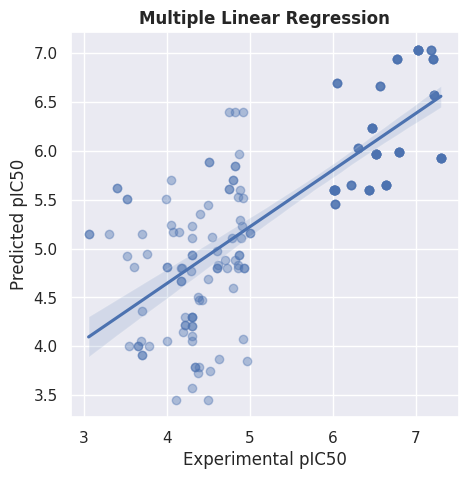

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Multiple Linear Regression', fontweight='bold')
plt.show


---
After K-Fold cross validation. 

In [ ]:
model = model = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.545967 |
+-------------------------+----------+
| Root Mean Squared Error | 0.737628 |
+-------------------------+----------+
| Mean Absolute Error     | 0.545967 |
+-------------------------+----------+
| R-squared Score         | 0.622555 |
+-------------------------+----------+


### Decision Tree Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.236096 |
+-------------------------+----------+
| Root Mean Squared Error | 0.485897 |
+-------------------------+----------+
| Mean Absolute Error     | 0.299689 |
+-------------------------+----------+
| R-squared Score         | 0.845542 |
+-------------------------+----------+


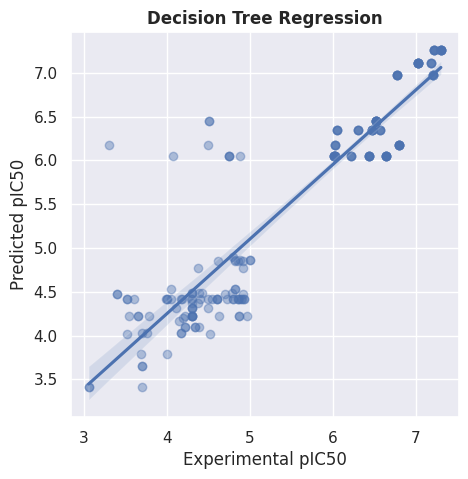

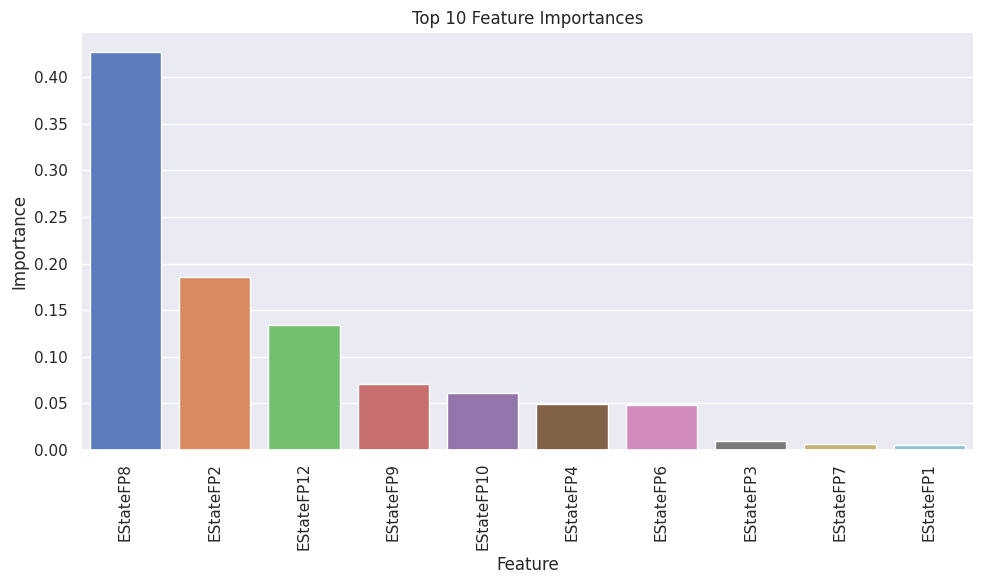

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Decision Tree Regression', fontweight='bold')
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.196475 |
+-------------------------+----------+
| Root Mean Squared Error | 0.441374 |
+-------------------------+----------+
| Mean Absolute Error     | 0.196475 |
+-------------------------+----------+
| R-squared Score         | 0.864174 |
+-------------------------+----------+


### Lasso Regression | L1 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.834795 |
+-------------------------+----------+
| Root Mean Squared Error | 0.913671 |
+-------------------------+----------+
| Mean Absolute Error     | 0.789754 |
+-------------------------+----------+
| R-squared Score         | 0.453861 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

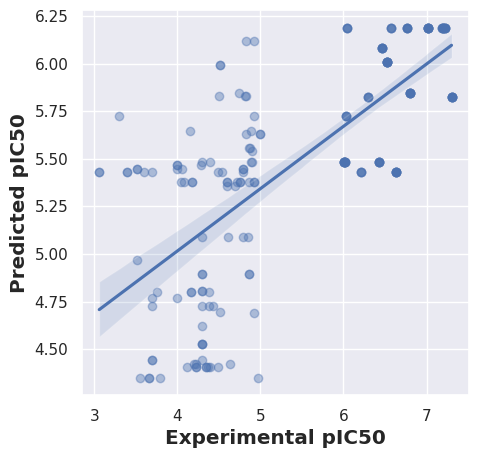

In [ ]:

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot

sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.736781 |
+-------------------------+----------+
| Root Mean Squared Error | 0.857872 |
+-------------------------+----------+
| Mean Absolute Error     | 0.736781 |
+-------------------------+----------+
| R-squared Score         | 0.491181 |
+-------------------------+----------+


### Ridge Regression | L2 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.595044 |
+-------------------------+----------+
| Root Mean Squared Error | 0.771391 |
+-------------------------+----------+
| Mean Absolute Error     | 0.59887  |
+-------------------------+----------+
| R-squared Score         | 0.610711 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

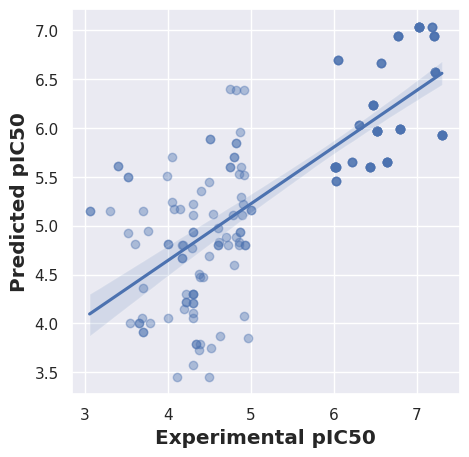

In [ ]:

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show




---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.545962 |
+-------------------------+----------+
| Root Mean Squared Error | 0.737626 |
+-------------------------+----------+
| Mean Absolute Error     | 0.545962 |
+-------------------------+----------+
| R-squared Score         | 0.622558 |
+-------------------------+----------+


### ElasticNet Regression | L3 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 1.11992  |
+-------------------------+----------+
| Root Mean Squared Error | 1.05826  |
+-------------------------+----------+
| Mean Absolute Error     | 0.977354 |
+-------------------------+----------+
| R-squared Score         | 0.267328 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

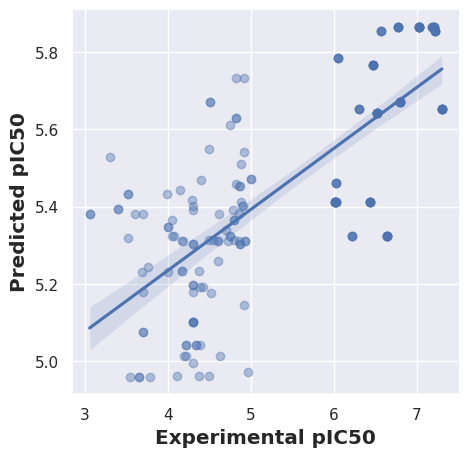

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.2, selection='random', random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, selection='cyclic', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 1.34588   |
+-------------------------+-----------+
| Root Mean Squared Error | 1.15991   |
+-------------------------+-----------+
| Mean Absolute Error     | 1.34588   |
+-------------------------+-----------+
| R-squared Score         | 0.0716329 |
+-------------------------+-----------+


## Klekota Roth

Feature count **4860**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/klekota_roth.csv') 
df_fp

Name  KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  \
0        AUTOGEN_molecule_1      1      0      0      0      0      0      0   
1        AUTOGEN_molecule_2      1      0      0      0      0      0      0   
2        AUTOGEN_molecule_3      1      0      0      0      0      0      0   
3        AUTOGEN_molecule_4      1      0      0      0      0      0      0   
4        AUTOGEN_molecule_5      1      0      0      0      0      0      0   
...                     ...    ...    ...    ...    ...    ...    ...    ...   
1416  AUTOGEN_molecule_1417      0      0      0      0      0      0      0   
1417  AUTOGEN_molecule_1418      0      0      0      0      0      0      0   
1418  AUTOGEN_molecule_1419      0      0      0      0      0      0      0   
1419  AUTOGEN_molecule_1420      0      0      0      0      0      0      0   
1420  AUTOGEN_molecule_1421      0      0      0      0      0      0      0   

      KRFP8  KRFP9  ...  KRFP4851  KRFP4852  KRFP4853  KRFP4854  KRFP4855  \
0         0      0  ...         0         0         1         0         0   
1         0      0  ...         0         0         1         0         0   
2         0      0  ...         0         0         1         0         0   
3         0      0  ...         0         0         1         0         0   
4         0      0  ...         0         0         1         0         0   
...     ...    ...  ...       ...       ...       ...       ...       ...   
1416      0      0  ...         0         0         1         0         0   
1417      0      0  ...         0         0         0         0         0   
1418      0      0  ...         0         0         0         0         0   
1419      0      0  ...         0         0         0         0         0   
1420      0      0  ...         0         0         0         0         0   

      KRFP4856  KRFP4857  KRFP4858  KRFP4859  KRFP4860  
0            0         0         0         0         0  
1            0         0         0         0         0  
2            0         0         0         0         0  
3            0         0         0         0         0  
4            0         0         0         0         0  
...        ...       ...       ...       ...       ...  
1416         0         0         0         0         0  
1417         0         0         0         0         0  
1418         0         0         0         0         0  
1419         0         0         0         0         0  
1420         0         0         0         0         0  

[1421 rows x 4861 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['pIC50']

In [ ]:
X

KRFP1  KRFP2  KRFP3  KRFP4  KRFP5  KRFP6  KRFP7  KRFP8  KRFP9  KRFP10  \
0         1      0      0      0      0      0      0      0      0       0   
1         1      0      0      0      0      0      0      0      0       0   
2         1      0      0      0      0      0      0      0      0       0   
3         1      0      0      0      0      0      0      0      0       0   
4         1      0      0      0      0      0      0      0      0       0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
1416      0      0      0      0      0      0      0      0      0       0   
1417      0      0      0      0      0      0      0      0      0       0   
1418      0      0      0      0      0      0      0      0      0       0   
1419      0      0      0      0      0      0      0      0      0       0   
1420      0      0      0      0      0      0      0      0      0       0   

      ...  KRFP4851  KRFP4852  KRFP4853  KRFP4854  KRFP4855  KRFP4856  \
0     ...         0         0         1         0         0         0   
1     ...         0         0         1         0         0         0   
2     ...         0         0         1         0         0         0   
3     ...         0         0         1         0         0         0   
4     ...         0         0         1         0         0         0   
...   ...       ...       ...       ...       ...       ...       ...   
1416  ...         0         0         1         0         0         0   
1417  ...         0         0         0         0         0         0   
1418  ...         0         0         0         0         0         0   
1419  ...         0         0         0         0         0         0   
1420  ...         0         0         0         0         0         0   

      KRFP4857  KRFP4858  KRFP4859  KRFP4860  
0            0         0         0         0  
1            0         0         0         0  
2            0         0         0         0  
3            0         0         0         0  
4            0         0         0         0  
...        ...       ...       ...       ...  
1416         0         0         0         0  
1417         0         0         0         0  
1418         0         0         0         0  
1419         0         0         0         0  
1420         0         0         0         0  

[1421 rows x 4860 columns]

In [ ]:
X.shape

(1421, 4860)

In [ ]:
Y.shape

(1421,)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_columns = X.columns

In [ ]:
X_columns

Index(['KRFP1', 'KRFP2', 'KRFP3', 'KRFP4', 'KRFP5', 'KRFP6', 'KRFP7', 'KRFP8',
       'KRFP9', 'KRFP10',
       ...
       'KRFP4851', 'KRFP4852', 'KRFP4853', 'KRFP4854', 'KRFP4855', 'KRFP4856',
       'KRFP4857', 'KRFP4858', 'KRFP4859', 'KRFP4860'],
      dtype='object', length=4860)

In [ ]:
type(Y)

pandas.core.series.Series

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 48)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 48), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 48), (213,))

### Models


- Multiple Linear Regression
- Polynomial Regression
- Robust Regression — RANSAC
- Decision Tree
- Random Forest
- Gaussian process regression
- Support Vector Regression




### Regression Model using Random Forrest with Feature Importance

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.137656 |
+-------------------------+----------+
| Root Mean Squared Error | 0.37102  |
+-------------------------+----------+
| Mean Absolute Error     | 0.255489 |
+-------------------------+----------+
| R-squared Score         | 0.909943 |
+-------------------------+----------+


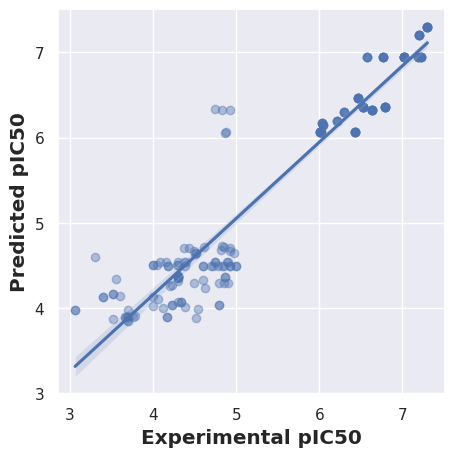

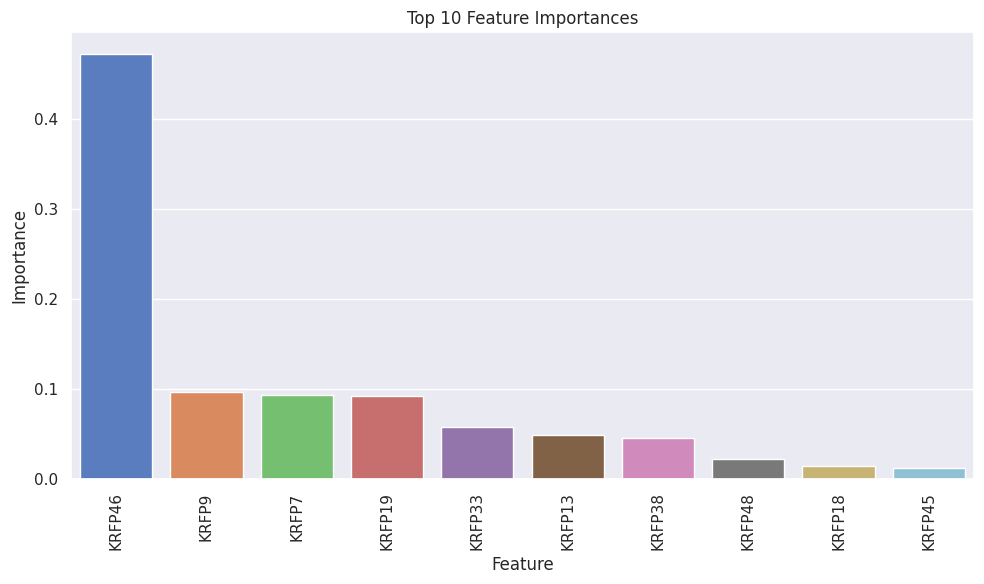

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.125215 |
+-------------------------+----------+
| Root Mean Squared Error | 0.352985 |
+-------------------------+----------+
| Mean Absolute Error     | 0.125215 |
+-------------------------+----------+
| R-squared Score         | 0.913608 |
+-------------------------+----------+


###Regression Model using Gradient Boosting Regression and Feature Importance

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0927295 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.304515  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.2147    |
+-------------------------+-----------+
| R-squared Score         | 0.939335  |
+-------------------------+-----------+


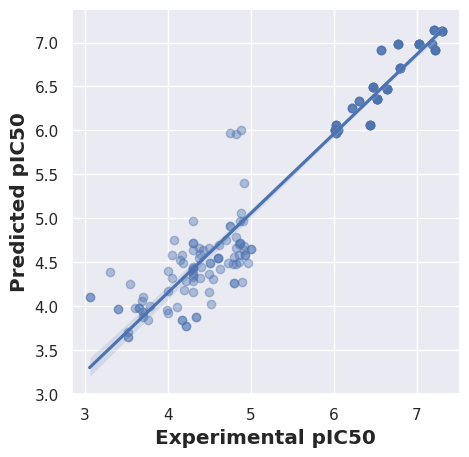

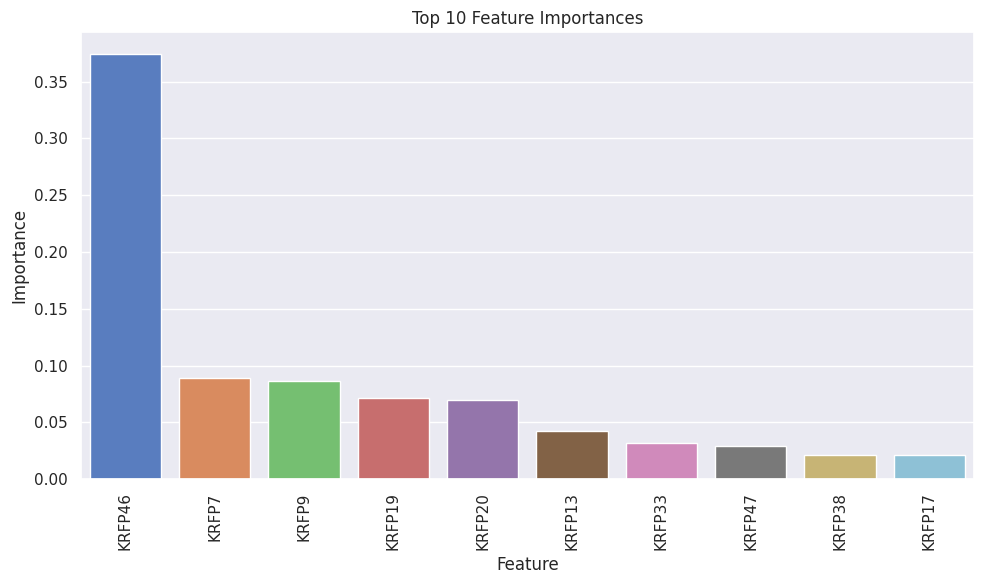

In [ ]:

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)

# Train the Gradient Boosting Regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0868554 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.29422   |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0868554 |
+-------------------------+-----------+
| R-squared Score         | 0.940006  |
+-------------------------+-----------+


### Regression Model using SVR

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0803146 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.283398  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.180583  |
+-------------------------+-----------+
| R-squared Score         | 0.947457  |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

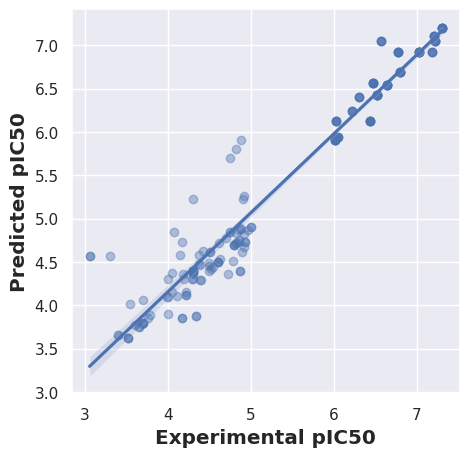

In [ ]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0648965 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.253856  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0648965 |
+-------------------------+-----------+
| R-squared Score         | 0.955127  |
+-------------------------+-----------+


### Multiple Linear Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.29778  |
+-------------------------+----------+
| Root Mean Squared Error | 0.545692 |
+-------------------------+----------+
| Mean Absolute Error     | 0.421743 |
+-------------------------+----------+
| R-squared Score         | 0.805187 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

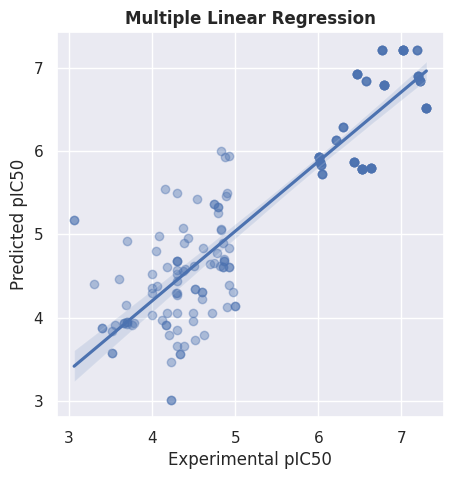

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Multiple Linear Regression', fontweight='bold')
plt.show


---
After K-Fold cross validation. 

In [ ]:
model = model = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.266751 |
+-------------------------+----------+
| Root Mean Squared Error | 0.514699 |
+-------------------------+----------+
| Mean Absolute Error     | 0.266751 |
+-------------------------+----------+
| R-squared Score         | 0.81593  |
+-------------------------+----------+


### Decision Tree Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.149102 |
+-------------------------+----------+
| Root Mean Squared Error | 0.386137 |
+-------------------------+----------+
| Mean Absolute Error     | 0.273988 |
+-------------------------+----------+
| R-squared Score         | 0.902455 |
+-------------------------+----------+


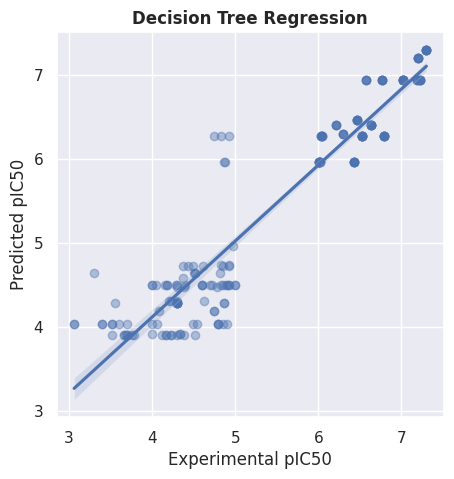

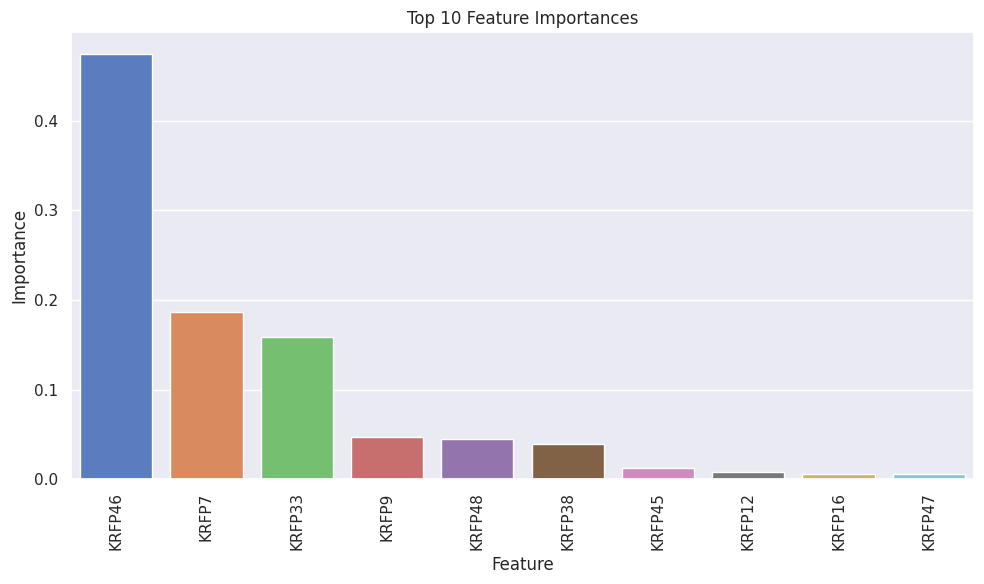

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Decision Tree Regression', fontweight='bold')
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.141518 |
+-------------------------+----------+
| Root Mean Squared Error | 0.375176 |
+-------------------------+----------+
| Mean Absolute Error     | 0.141518 |
+-------------------------+----------+
| R-squared Score         | 0.902058 |
+-------------------------+----------+


### Lasso Regression | L1 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.637717 |
+-------------------------+----------+
| Root Mean Squared Error | 0.798572 |
+-------------------------+----------+
| Mean Absolute Error     | 0.669985 |
+-------------------------+----------+
| R-squared Score         | 0.582794 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

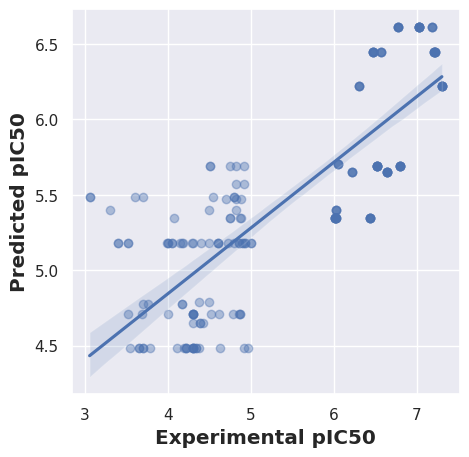

In [ ]:

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot

sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.568081 |
+-------------------------+----------+
| Root Mean Squared Error | 0.752534 |
+-------------------------+----------+
| Mean Absolute Error     | 0.568081 |
+-------------------------+----------+
| R-squared Score         | 0.607819 |
+-------------------------+----------+


### Ridge Regression | L2 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.297735 |
+-------------------------+----------+
| Root Mean Squared Error | 0.545651 |
+-------------------------+----------+
| Mean Absolute Error     | 0.421719 |
+-------------------------+----------+
| R-squared Score         | 0.805216 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

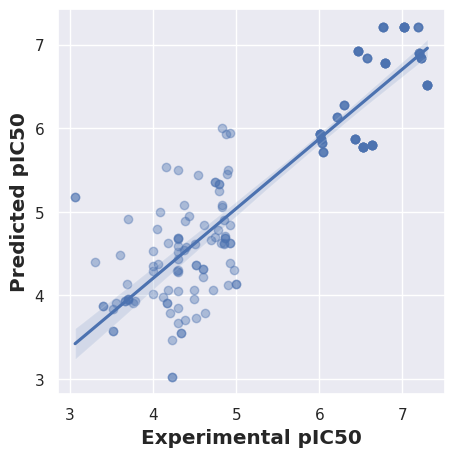

In [ ]:

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show




---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.266582 |
+-------------------------+----------+
| Root Mean Squared Error | 0.514651 |
+-------------------------+----------+
| Mean Absolute Error     | 0.266582 |
+-------------------------+----------+
| R-squared Score         | 0.816024 |
+-------------------------+----------+


### ElasticNet Regression | L3 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.806755 |
+-------------------------+----------+
| Root Mean Squared Error | 0.898195 |
+-------------------------+----------+
| Mean Absolute Error     | 0.80881  |
+-------------------------+----------+
| R-squared Score         | 0.472206 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

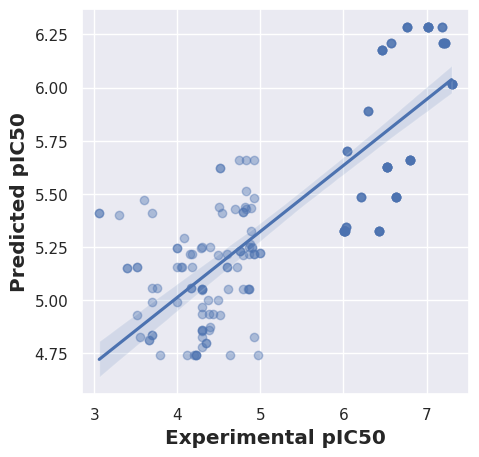

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.2, selection='random', random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, selection='cyclic', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 1.14817  |
+-------------------------+----------+
| Root Mean Squared Error | 1.07127  |
+-------------------------+----------+
| Mean Absolute Error     | 1.14817  |
+-------------------------+----------+
| R-squared Score         | 0.208086 |
+-------------------------+----------+


## Klekota Roth Count

Feature count **4860**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/klekota_roth_count.csv') 
df_fp

Name  KRFPC1  KRFPC2  KRFPC3  KRFPC4  KRFPC5  KRFPC6  \
0        AUTOGEN_molecule_1     1.0     0.0     0.0     0.0     0.0     0.0   
1        AUTOGEN_molecule_2     1.0     0.0     0.0     0.0     0.0     0.0   
2        AUTOGEN_molecule_3     1.0     0.0     0.0     0.0     0.0     0.0   
3        AUTOGEN_molecule_4     1.0     0.0     0.0     0.0     0.0     0.0   
4        AUTOGEN_molecule_5     1.0     0.0     0.0     0.0     0.0     0.0   
...                     ...     ...     ...     ...     ...     ...     ...   
1416  AUTOGEN_molecule_1417     0.0     0.0     0.0     0.0     0.0     0.0   
1417  AUTOGEN_molecule_1418     0.0     0.0     0.0     0.0     0.0     0.0   
1418  AUTOGEN_molecule_1419     0.0     0.0     0.0     0.0     0.0     0.0   
1419  AUTOGEN_molecule_1420     0.0     0.0     0.0     0.0     0.0     0.0   
1420  AUTOGEN_molecule_1421     0.0     0.0     0.0     0.0     0.0     0.0   

      KRFPC7  KRFPC8  KRFPC9  ...  KRFPC4851  KRFPC4852  KRFPC4853  KRFPC4854  \
0        0.0     0.0     0.0  ...        0.0        0.0        1.0        0.0   
1        0.0     0.0     0.0  ...        0.0        0.0        1.0        0.0   
2        0.0     0.0     0.0  ...        0.0        0.0        1.0        0.0   
3        0.0     0.0     0.0  ...        0.0        0.0        1.0        0.0   
4        0.0     0.0     0.0  ...        0.0        0.0        1.0        0.0   
...      ...     ...     ...  ...        ...        ...        ...        ...   
1416     0.0     0.0     0.0  ...        0.0        0.0        2.0        0.0   
1417     0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
1418     0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
1419     0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
1420     0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   

      KRFPC4855  KRFPC4856  KRFPC4857  KRFPC4858  KRFPC4859  KRFPC4860  
0           0.0        0.0        0.0        0.0        0.0        0.0  
1           0.0        0.0        0.0        0.0        0.0        0.0  
2           0.0        0.0        0.0        0.0        0.0        0.0  
3           0.0        0.0        0.0        0.0        0.0        0.0  
4           0.0        0.0        0.0        0.0        0.0        0.0  
...         ...        ...        ...        ...        ...        ...  
1416        0.0        0.0        0.0        0.0        0.0        0.0  
1417        0.0        0.0        0.0        0.0        0.0        0.0  
1418        0.0        0.0        0.0        0.0        0.0        0.0  
1419        0.0        0.0        0.0        0.0        0.0        0.0  
1420        0.0        0.0        0.0        0.0        0.0        0.0  

[1421 rows x 4861 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['pIC50']

In [ ]:
X

KRFPC1  KRFPC2  KRFPC3  KRFPC4  KRFPC5  KRFPC6  KRFPC7  KRFPC8  KRFPC9  \
0        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1416     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1417     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1418     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1419     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1420     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      KRFPC10  ...  KRFPC4851  KRFPC4852  KRFPC4853  KRFPC4854  KRFPC4855  \
0         0.0  ...        0.0        0.0        1.0        0.0        0.0   
1         0.0  ...        0.0        0.0        1.0        0.0        0.0   
2         0.0  ...        0.0        0.0        1.0        0.0        0.0   
3         0.0  ...        0.0        0.0        1.0        0.0        0.0   
4         0.0  ...        0.0        0.0        1.0        0.0        0.0   
...       ...  ...        ...        ...        ...        ...        ...   
1416      0.0  ...        0.0        0.0        2.0        0.0        0.0   
1417      0.0  ...        0.0        0.0        0.0        0.0        0.0   
1418      0.0  ...        0.0        0.0        0.0        0.0        0.0   
1419      0.0  ...        0.0        0.0        0.0        0.0        0.0   
1420      0.0  ...        0.0        0.0        0.0        0.0        0.0   

      KRFPC4856  KRFPC4857  KRFPC4858  KRFPC4859  KRFPC4860  
0           0.0        0.0        0.0        0.0        0.0  
1           0.0        0.0        0.0        0.0        0.0  
2           0.0        0.0        0.0        0.0        0.0  
3           0.0        0.0        0.0        0.0        0.0  
4           0.0        0.0        0.0        0.0        0.0  
...         ...        ...        ...        ...        ...  
1416        0.0        0.0        0.0        0.0        0.0  
1417        0.0        0.0        0.0        0.0        0.0  
1418        0.0        0.0        0.0        0.0        0.0  
1419        0.0        0.0        0.0        0.0        0.0  
1420        0.0        0.0        0.0        0.0        0.0  

[1421 rows x 4860 columns]

In [ ]:
X.shape

(1421, 4860)

In [ ]:
Y.shape

(1421,)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_columns = X.columns

In [ ]:
X_columns

Index(['KRFPC1', 'KRFPC2', 'KRFPC3', 'KRFPC4', 'KRFPC5', 'KRFPC6', 'KRFPC7',
       'KRFPC8', 'KRFPC9', 'KRFPC10',
       ...
       'KRFPC4851', 'KRFPC4852', 'KRFPC4853', 'KRFPC4854', 'KRFPC4855',
       'KRFPC4856', 'KRFPC4857', 'KRFPC4858', 'KRFPC4859', 'KRFPC4860'],
      dtype='object', length=4860)

In [ ]:
type(Y)

pandas.core.series.Series

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 172)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 172), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 172), (213,))

### Models


- Multiple Linear Regression
- Polynomial Regression
- Robust Regression — RANSAC
- Decision Tree
- Random Forest
- Gaussian process regression
- Support Vector Regression




### Regression Model using Random Forrest with Feature Importance

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.151661 |
+-------------------------+----------+
| Root Mean Squared Error | 0.389437 |
+-------------------------+----------+
| Mean Absolute Error     | 0.275274 |
+-------------------------+----------+
| R-squared Score         | 0.90078  |
+-------------------------+----------+


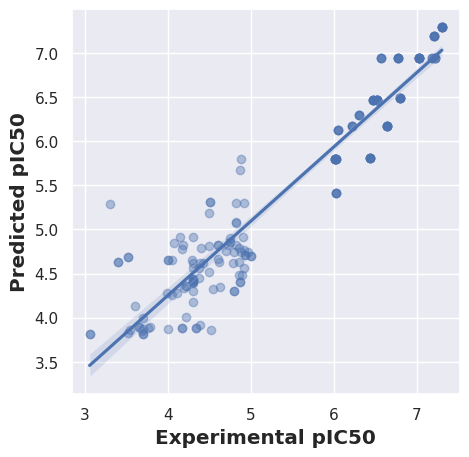

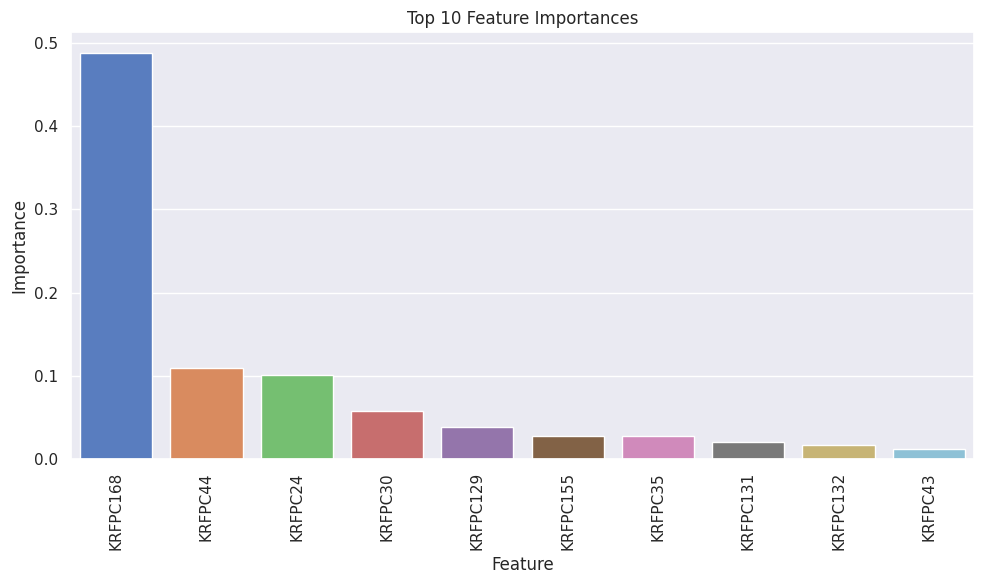

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.132135 |
+-------------------------+----------+
| Root Mean Squared Error | 0.362029 |
+-------------------------+----------+
| Mean Absolute Error     | 0.132135 |
+-------------------------+----------+
| R-squared Score         | 0.910333 |
+-------------------------+----------+


###Regression Model using Gradient Boosting Regression and Feature Importance

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0487806 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.220863  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.173068  |
+-------------------------+-----------+
| R-squared Score         | 0.968087  |
+-------------------------+-----------+


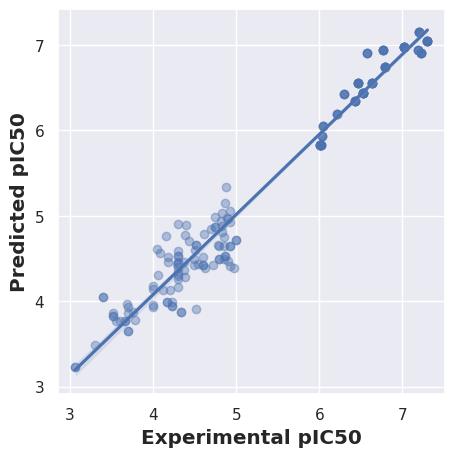

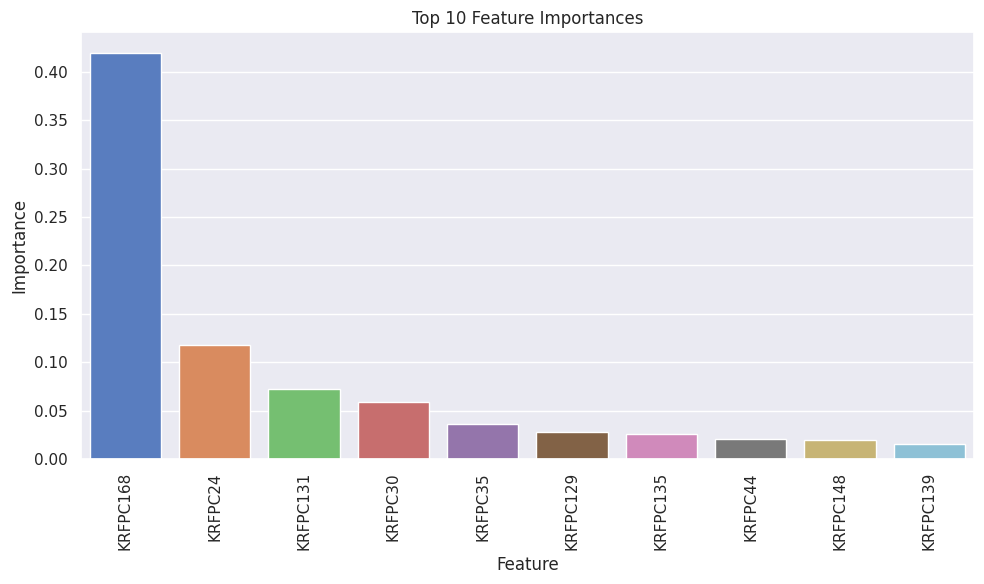

In [ ]:

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)

# Train the Gradient Boosting Regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0519324 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.227251  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0519324 |
+-------------------------+-----------+
| R-squared Score         | 0.964106  |
+-------------------------+-----------+


### Regression Model using SVR

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.259341 |
+-------------------------+----------+
| Root Mean Squared Error | 0.509256 |
+-------------------------+----------+
| Mean Absolute Error     | 0.345174 |
+-------------------------+----------+
| R-squared Score         | 0.830334 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

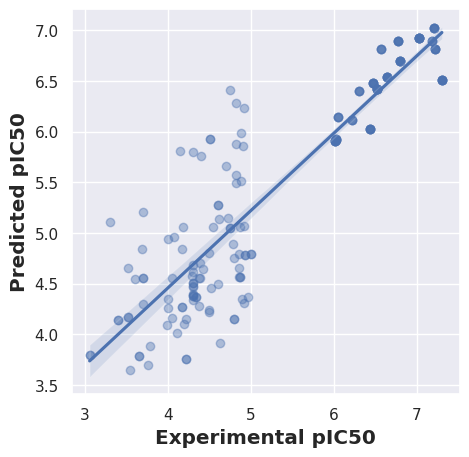

In [ ]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.225269 |
+-------------------------+----------+
| Root Mean Squared Error | 0.474137 |
+-------------------------+----------+
| Mean Absolute Error     | 0.225269 |
+-------------------------+----------+
| R-squared Score         | 0.844517 |
+-------------------------+----------+


### Multiple Linear Regression

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0794274 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.281829  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.16753   |
+-------------------------+-----------+
| R-squared Score         | 0.948037  |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

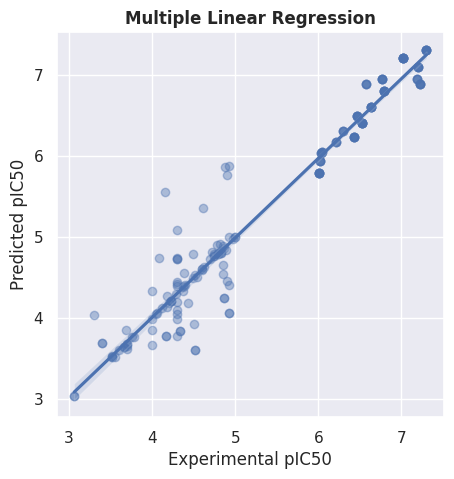

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Multiple Linear Regression', fontweight='bold')
plt.show


---
After K-Fold cross validation. 

In [ ]:
model = model = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+--------------+
| Metric                  |        Value |
+=========================+==============+
| Mean Squared Error      |  1.68398e+17 |
+-------------------------+--------------+
| Root Mean Squared Error |  2.18541e+08 |
+-------------------------+--------------+
| Mean Absolute Error     |  1.68398e+17 |
+-------------------------+--------------+
| R-squared Score         | -1.15489e+17 |
+-------------------------+--------------+


### Decision Tree Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.159951 |
+-------------------------+----------+
| Root Mean Squared Error | 0.399939 |
+-------------------------+----------+
| Mean Absolute Error     | 0.277818 |
+-------------------------+----------+
| R-squared Score         | 0.895357 |
+-------------------------+----------+


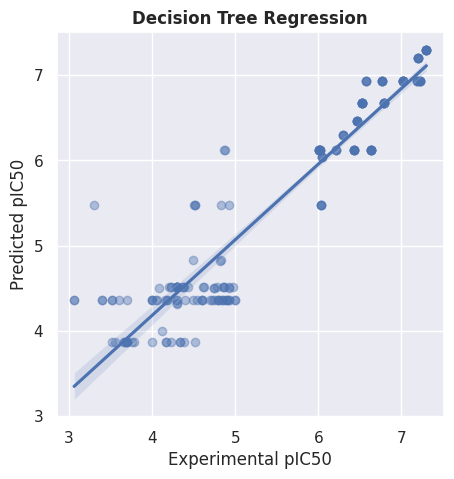

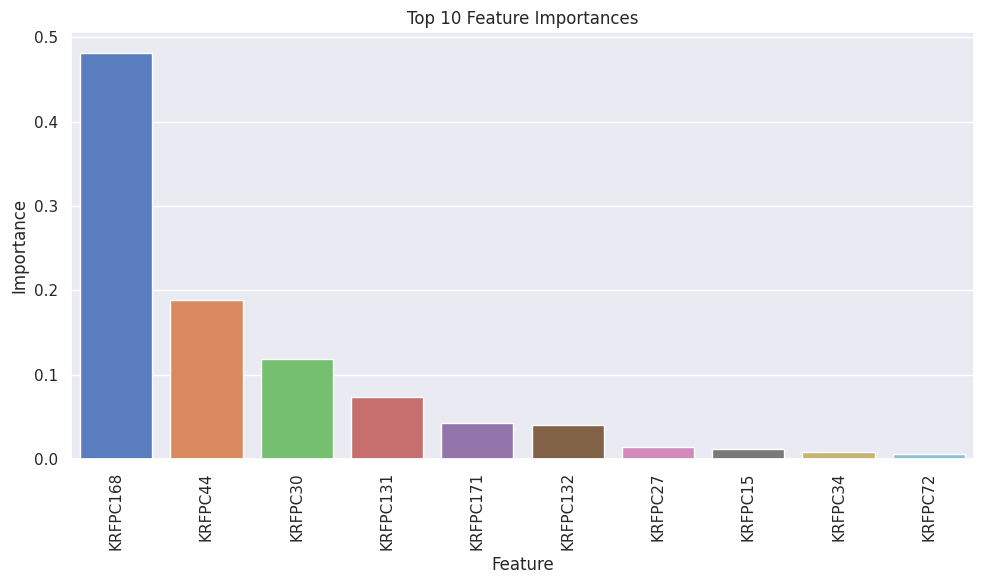

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Decision Tree Regression', fontweight='bold')
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.14987  |
+-------------------------+----------+
| Root Mean Squared Error | 0.385695 |
+-------------------------+----------+
| Mean Absolute Error     | 0.14987  |
+-------------------------+----------+
| R-squared Score         | 0.896278 |
+-------------------------+----------+


### Lasso Regression | L1 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.601213 |
+-------------------------+----------+
| Root Mean Squared Error | 0.775379 |
+-------------------------+----------+
| Mean Absolute Error     | 0.652858 |
+-------------------------+----------+
| R-squared Score         | 0.606675 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

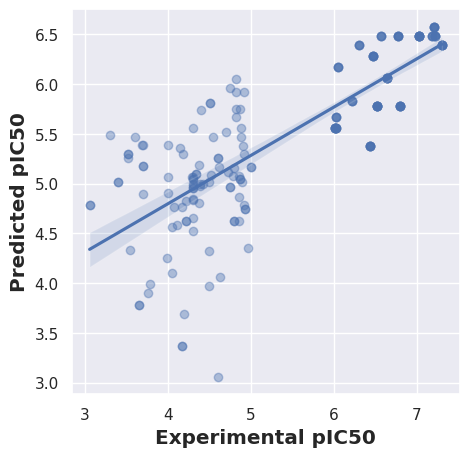

In [ ]:

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot

sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.514046 |
+-------------------------+----------+
| Root Mean Squared Error | 0.715998 |
+-------------------------+----------+
| Mean Absolute Error     | 0.514046 |
+-------------------------+----------+
| R-squared Score         | 0.645493 |
+-------------------------+----------+


### Ridge Regression | L2 Regularization

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0714216 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.267248  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.167119  |
+-------------------------+-----------+
| R-squared Score         | 0.953275  |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

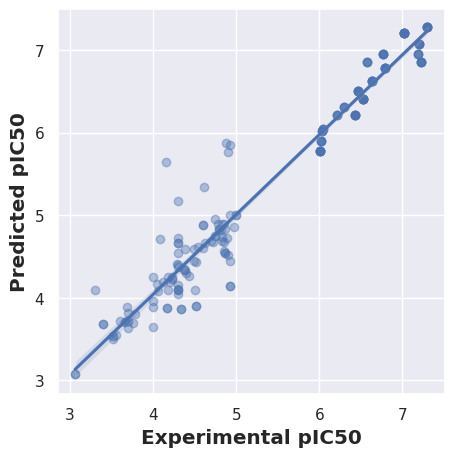

In [ ]:

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show




---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0766823 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.274396  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0766823 |
+-------------------------+-----------+
| R-squared Score         | 0.946883  |
+-------------------------+-----------+


### ElasticNet Regression | L3 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.666988 |
+-------------------------+----------+
| Root Mean Squared Error | 0.816693 |
+-------------------------+----------+
| Mean Absolute Error     | 0.707014 |
+-------------------------+----------+
| R-squared Score         | 0.563644 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

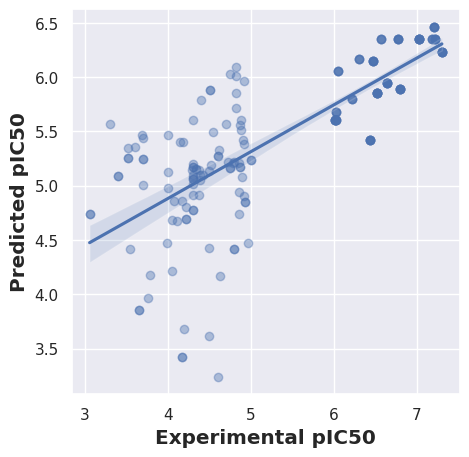

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.2, selection='random', random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, selection='cyclic', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.807551 |
+-------------------------+----------+
| Root Mean Squared Error | 0.898267 |
+-------------------------+----------+
| Mean Absolute Error     | 0.807551 |
+-------------------------+----------+
| R-squared Score         | 0.442862 |
+-------------------------+----------+


## MACCS

Feature count **166**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/maccs.csv') 
df_fp

Name  MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  \
0        AUTOGEN_molecule_1         0         0         0         0         0   
1        AUTOGEN_molecule_2         0         0         0         0         0   
2        AUTOGEN_molecule_3         0         0         0         0         0   
3        AUTOGEN_molecule_4         0         0         0         0         0   
4        AUTOGEN_molecule_5         0         0         0         0         0   
...                     ...       ...       ...       ...       ...       ...   
1416  AUTOGEN_molecule_1417         0         0         0         0         0   
1417  AUTOGEN_molecule_1418         0         0         0         0         0   
1418  AUTOGEN_molecule_1419         0         0         0         0         0   
1419  AUTOGEN_molecule_1420         0         0         0         0         0   
1420  AUTOGEN_molecule_1421         0         0         0         0         0   

      MACCSFP6  MACCSFP7  MACCSFP8  MACCSFP9  ...  MACCSFP157  MACCSFP158  \
0            0         0         0         0  ...           0           1   
1            0         0         0         0  ...           0           1   
2            0         0         0         0  ...           0           1   
3            0         0         0         0  ...           0           1   
4            0         0         0         0  ...           0           1   
...        ...       ...       ...       ...  ...         ...         ...   
1416         0         0         0         0  ...           0           1   
1417         0         0         0         0  ...           0           1   
1418         0         0         0         0  ...           0           1   
1419         0         0         0         0  ...           0           1   
1420         0         0         0         0  ...           0           1   

      MACCSFP159  MACCSFP160  MACCSFP161  MACCSFP162  MACCSFP163  MACCSFP164  \
0              1           1           1           1           1           1   
1              1           1           1           1           1           1   
2              1           1           1           1           1           1   
3              1           1           1           1           1           1   
4              1           1           1           1           1           1   
...          ...         ...         ...         ...         ...         ...   
1416           1           0           1           1           1           1   
1417           1           1           1           1           1           1   
1418           1           1           1           1           1           1   
1419           1           1           1           1           1           1   
1420           1           1           1           1           1           1   

      MACCSFP165  MACCSFP166  
0              1           0  
1              1           0  
2              1           0  
3              1           0  
4              1           0  
...          ...         ...  
1416           1           0  
1417           1           0  
1418           1           0  
1419           1           0  
1420           1           0  

[1421 rows x 167 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['pIC50']

In [ ]:
X

MACCSFP1  MACCSFP2  MACCSFP3  MACCSFP4  MACCSFP5  MACCSFP6  MACCSFP7  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
1416         0         0         0         0         0         0         0   
1417         0         0         0         0         0         0         0   
1418         0         0         0         0         0         0         0   
1419         0         0         0         0         0         0         0   
1420         0         0         0         0         0         0         0   

      MACCSFP8  MACCSFP9  MACCSFP10  ...  MACCSFP157  MACCSFP158  MACCSFP159  \
0            0         0          0  ...           0           1           1   
1            0         0          0  ...           0           1           1   
2            0         0          0  ...           0           1           1   
3            0         0          0  ...           0           1           1   
4            0         0          0  ...           0           1           1   
...        ...       ...        ...  ...         ...         ...         ...   
1416         0         0          0  ...           0           1           1   
1417         0         0          0  ...           0           1           1   
1418         0         0          0  ...           0           1           1   
1419         0         0          0  ...           0           1           1   
1420         0         0          0  ...           0           1           1   

      MACCSFP160  MACCSFP161  MACCSFP162  MACCSFP163  MACCSFP164  MACCSFP165  \
0              1           1           1           1           1           1   
1              1           1           1           1           1           1   
2              1           1           1           1           1           1   
3              1           1           1           1           1           1   
4              1           1           1           1           1           1   
...          ...         ...         ...         ...         ...         ...   
1416           0           1           1           1           1           1   
1417           1           1           1           1           1           1   
1418           1           1           1           1           1           1   
1419           1           1           1           1           1           1   
1420           1           1           1           1           1           1   

      MACCSFP166  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
1416           0  
1417           0  
1418           0  
1419           0  
1420           0  

[1421 rows x 166 columns]

In [ ]:
X.shape

(1421, 166)

In [ ]:
Y.shape

(1421,)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_columns = X.columns

In [ ]:
X_columns

Index(['MACCSFP1', 'MACCSFP2', 'MACCSFP3', 'MACCSFP4', 'MACCSFP5', 'MACCSFP6',
       'MACCSFP7', 'MACCSFP8', 'MACCSFP9', 'MACCSFP10',
       ...
       'MACCSFP157', 'MACCSFP158', 'MACCSFP159', 'MACCSFP160', 'MACCSFP161',
       'MACCSFP162', 'MACCSFP163', 'MACCSFP164', 'MACCSFP165', 'MACCSFP166'],
      dtype='object', length=166)

In [ ]:
type(Y)

pandas.core.series.Series

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 72)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 72), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 72), (213,))

### Models


- Multiple Linear Regression
- Polynomial Regression
- Robust Regression — RANSAC
- Decision Tree
- Random Forest
- Gaussian process regression
- Support Vector Regression




### Regression Model using Random Forrest with Feature Importance

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.111034 |
+-------------------------+----------+
| Root Mean Squared Error | 0.333218 |
+-------------------------+----------+
| Mean Absolute Error     | 0.259448 |
+-------------------------+----------+
| R-squared Score         | 0.927359 |
+-------------------------+----------+


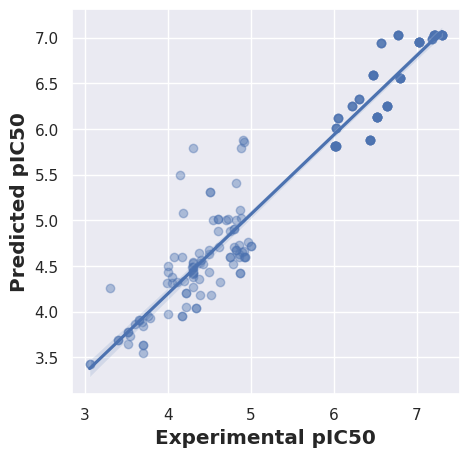

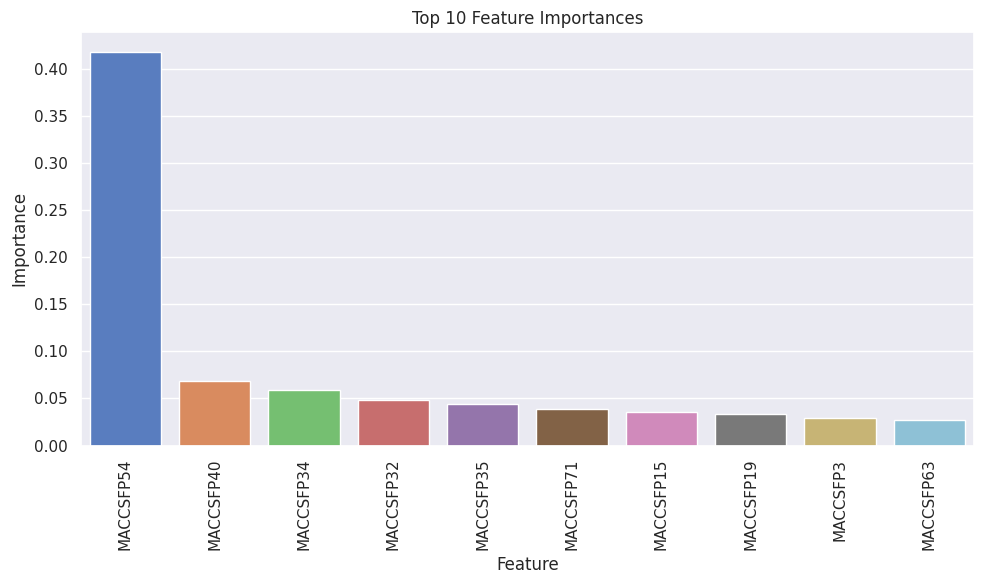

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.115977 |
+-------------------------+----------+
| Root Mean Squared Error | 0.338333 |
+-------------------------+----------+
| Mean Absolute Error     | 0.115977 |
+-------------------------+----------+
| R-squared Score         | 0.920501 |
+-------------------------+----------+


###Regression Model using Gradient Boosting Regression and Feature Importance

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.053179 |
+-------------------------+----------+
| Root Mean Squared Error | 0.230606 |
+-------------------------+----------+
| Mean Absolute Error     | 0.160815 |
+-------------------------+----------+
| R-squared Score         | 0.965209 |
+-------------------------+----------+


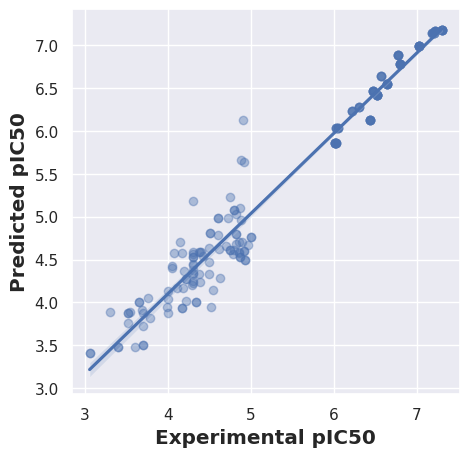

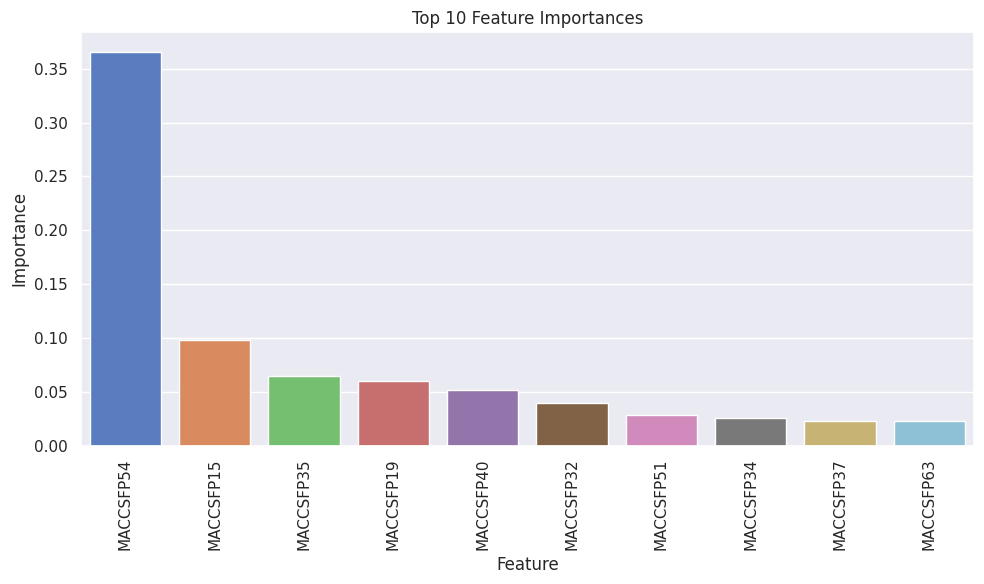

In [ ]:

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)

# Train the Gradient Boosting Regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0632539 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.249373  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0632539 |
+-------------------------+-----------+
| R-squared Score         | 0.956104  |
+-------------------------+-----------+


### Regression Model using SVR

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0392129 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.198023  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.130583  |
+-------------------------+-----------+
| R-squared Score         | 0.974346  |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

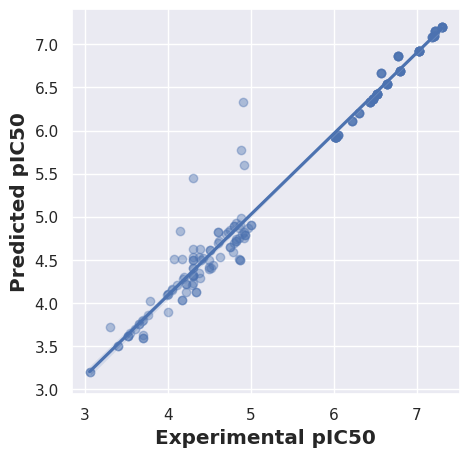

In [ ]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0360313 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.187084  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0360313 |
+-------------------------+-----------+
| R-squared Score         | 0.974987  |
+-------------------------+-----------+


### Multiple Linear Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.161943 |
+-------------------------+----------+
| Root Mean Squared Error | 0.402422 |
+-------------------------+----------+
| Mean Absolute Error     | 0.304003 |
+-------------------------+----------+
| R-squared Score         | 0.894054 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

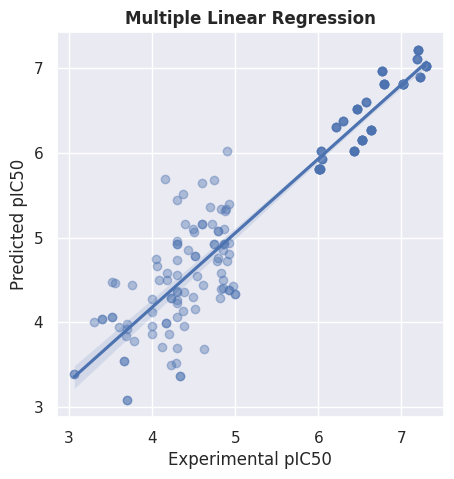

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Multiple Linear Regression', fontweight='bold')
plt.show


---
After K-Fold cross validation. 

In [ ]:
model = model = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.182318 |
+-------------------------+----------+
| Root Mean Squared Error | 0.425181 |
+-------------------------+----------+
| Mean Absolute Error     | 0.182318 |
+-------------------------+----------+
| R-squared Score         | 0.87396  |
+-------------------------+----------+


### Decision Tree Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.162917 |
+-------------------------+----------+
| Root Mean Squared Error | 0.403629 |
+-------------------------+----------+
| Mean Absolute Error     | 0.293014 |
+-------------------------+----------+
| R-squared Score         | 0.893417 |
+-------------------------+----------+


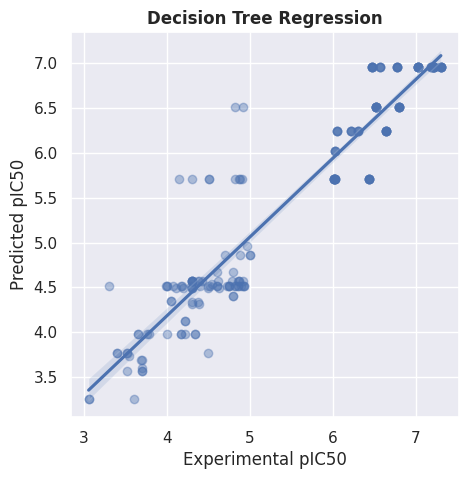

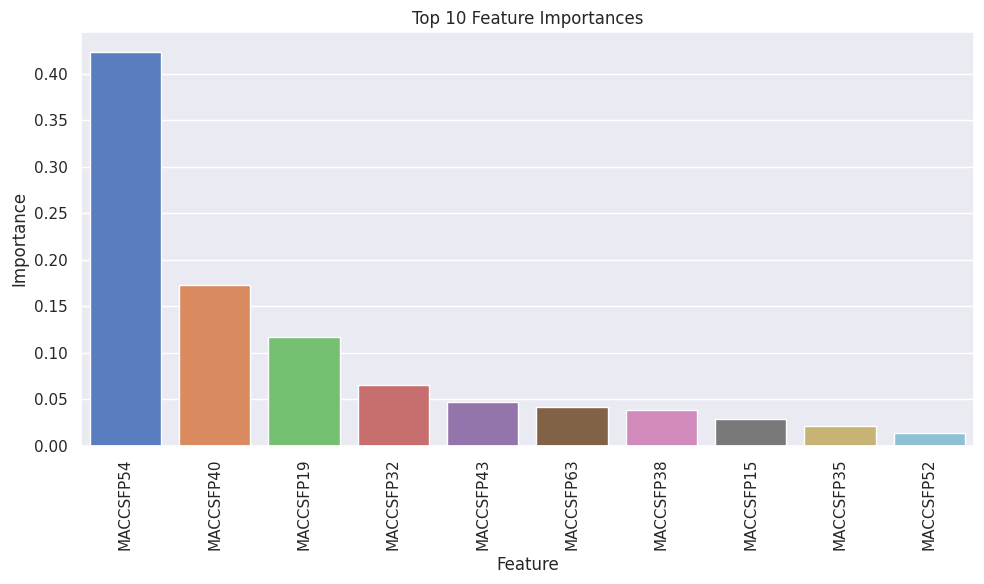

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Decision Tree Regression', fontweight='bold')
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.19434  |
+-------------------------+----------+
| Root Mean Squared Error | 0.43688  |
+-------------------------+----------+
| Mean Absolute Error     | 0.19434  |
+-------------------------+----------+
| R-squared Score         | 0.865479 |
+-------------------------+----------+


### Lasso Regression | L1 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.672227 |
+-------------------------+----------+
| Root Mean Squared Error | 0.819895 |
+-------------------------+----------+
| Mean Absolute Error     | 0.699359 |
+-------------------------+----------+
| R-squared Score         | 0.560216 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

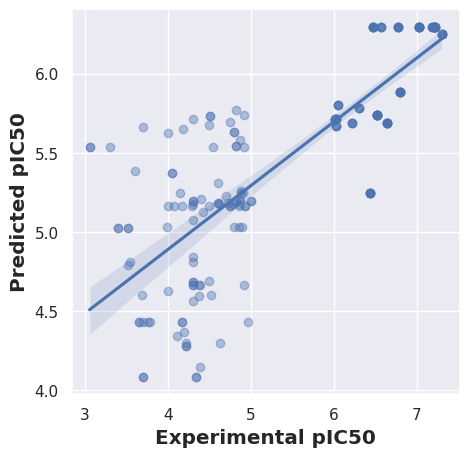

In [ ]:

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot

sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.590418 |
+-------------------------+----------+
| Root Mean Squared Error | 0.767782 |
+-------------------------+----------+
| Mean Absolute Error     | 0.590418 |
+-------------------------+----------+
| R-squared Score         | 0.592431 |
+-------------------------+----------+


### Ridge Regression | L2 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.162466 |
+-------------------------+----------+
| Root Mean Squared Error | 0.403071 |
+-------------------------+----------+
| Mean Absolute Error     | 0.305276 |
+-------------------------+----------+
| R-squared Score         | 0.893711 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

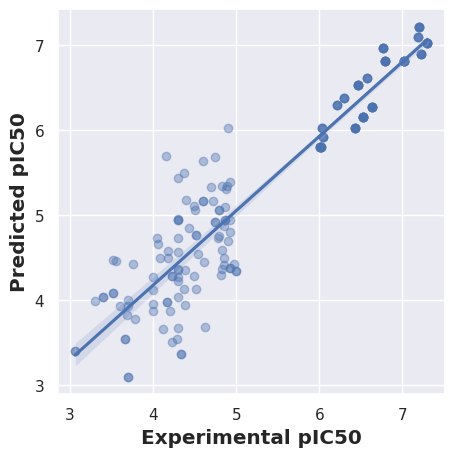

In [ ]:

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show




---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.181939 |
+-------------------------+----------+
| Root Mean Squared Error | 0.424751 |
+-------------------------+----------+
| Mean Absolute Error     | 0.181939 |
+-------------------------+----------+
| R-squared Score         | 0.874219 |
+-------------------------+----------+


### ElasticNet Regression | L3 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.88119  |
+-------------------------+----------+
| Root Mean Squared Error | 0.938717 |
+-------------------------+----------+
| Mean Absolute Error     | 0.847045 |
+-------------------------+----------+
| R-squared Score         | 0.423509 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

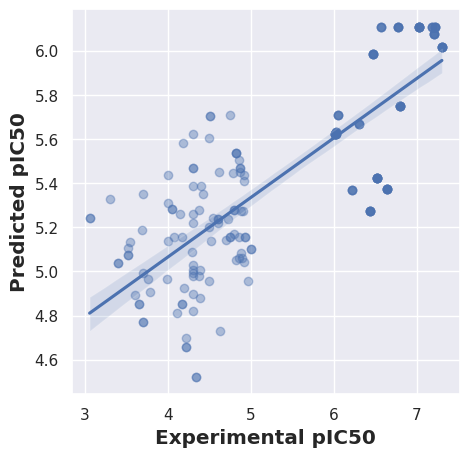

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.2, selection='random', random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, selection='cyclic', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 1.29227  |
+-------------------------+----------+
| Root Mean Squared Error | 1.13659  |
+-------------------------+----------+
| Mean Absolute Error     | 1.29227  |
+-------------------------+----------+
| R-squared Score         | 0.108579 |
+-------------------------+----------+


## PubChem

Feature count **881**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/pubchem.csv') 
df_fp

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0        AUTOGEN_molecule_1           1           1           1           0   
1        AUTOGEN_molecule_2           1           1           1           0   
2        AUTOGEN_molecule_3           1           1           1           0   
3        AUTOGEN_molecule_4           1           1           1           0   
4        AUTOGEN_molecule_5           1           1           1           0   
...                     ...         ...         ...         ...         ...   
1416  AUTOGEN_molecule_1417           1           1           0           0   
1417  AUTOGEN_molecule_1418           1           1           0           0   
1418  AUTOGEN_molecule_1419           1           1           0           0   
1419  AUTOGEN_molecule_1420           1           1           0           0   
1420  AUTOGEN_molecule_1421           1           1           0           0   

      PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
0              0           0           0           0           0  ...   
1              0           0           0           0           0  ...   
2              0           0           0           0           0  ...   
3              0           0           0           0           0  ...   
4              0           0           0           0           0  ...   
...          ...         ...         ...         ...         ...  ...   
1416           0           0           0           0           0  ...   
1417           0           0           0           0           0  ...   
1418           0           0           0           0           0  ...   
1419           0           0           0           0           0  ...   
1420           0           0           0           0           0  ...   

      PubchemFP871  PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
1416             0             0             0             0             0   
1417             0             0             0             0             0   
1418             0             0             0             0             0   
1419             0             0             0             0             0   
1420             0             0             0             0             0   

      PubchemFP876  PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0             0  
1                0             0             0             0             0  
2                0             0             0             0             0  
3                0             0             0             0             0  
4                0             0             0             0             0  
...            ...           ...           ...           ...           ...  
1416             0             0             0             0             0  
1417             0             0             0             0             0  
1418             0             0             0             0             0  
1419             0             0             0             0             0  
1420             0             0             0             0             0  

[1421 rows x 882 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['pIC50']

In [ ]:
X

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           1           0           0           0   
1              1           1           1           0           0           0   
2              1           1           1           0           0           0   
3              1           1           1           0           0           0   
4              1           1           1           0           0           0   
...          ...         ...         ...         ...         ...         ...   
1416           1           1           0           0           0           0   
1417           1           1           0           0           0           0   
1418           1           1           0           0           0           0   
1419           1           1           0           0           0           0   
1420           1           1           0           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP871  \
0              0           0           0           1  ...             0   
1              0           0           0           1  ...             0   
2              0           0           0           1  ...             0   
3              0           0           0           1  ...             0   
4              0           0           0           1  ...             0   
...          ...         ...         ...         ...  ...           ...   
1416           0           0           0           1  ...             0   
1417           0           0           0           1  ...             0   
1418           0           0           0           1  ...             0   
1419           0           0           0           1  ...             0   
1420           0           0           0           1  ...             0   

      PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
1416             0             0             0             0             0   
1417             0             0             0             0             0   
1418             0             0             0             0             0   
1419             0             0             0             0             0   
1420             0             0             0             0             0   

      PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                0             0             0             0  
1                0             0             0             0  
2                0             0             0             0  
3                0             0             0             0  
4                0             0             0             0  
...            ...           ...           ...           ...  
1416             0             0             0             0  
1417             0             0             0             0  
1418             0             0             0             0  
1419             0             0             0             0  
1420             0             0             0             0  

[1421 rows x 881 columns]

In [ ]:
X.shape

(1421, 881)

In [ ]:
Y.shape

(1421,)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_columns = X.columns

In [ ]:
X_columns

Index(['PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP4',
       'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8', 'PubchemFP9',
       ...
       'PubchemFP871', 'PubchemFP872', 'PubchemFP873', 'PubchemFP874',
       'PubchemFP875', 'PubchemFP876', 'PubchemFP877', 'PubchemFP878',
       'PubchemFP879', 'PubchemFP880'],
      dtype='object', length=881)

In [ ]:
type(Y)

pandas.core.series.Series

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 176)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 176), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 176), (213,))

### Models


- Multiple Linear Regression
- Polynomial Regression
- Robust Regression — RANSAC
- Decision Tree
- Random Forest
- Gaussian process regression
- Support Vector Regression




### Regression Model using Random Forrest with Feature Importance

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.106604 |
+-------------------------+----------+
| Root Mean Squared Error | 0.326503 |
+-------------------------+----------+
| Mean Absolute Error     | 0.23515  |
+-------------------------+----------+
| R-squared Score         | 0.930258 |
+-------------------------+----------+


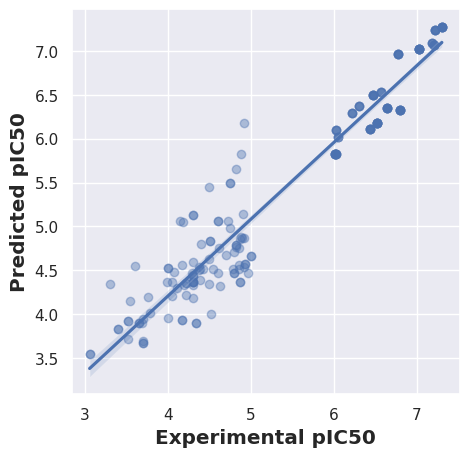

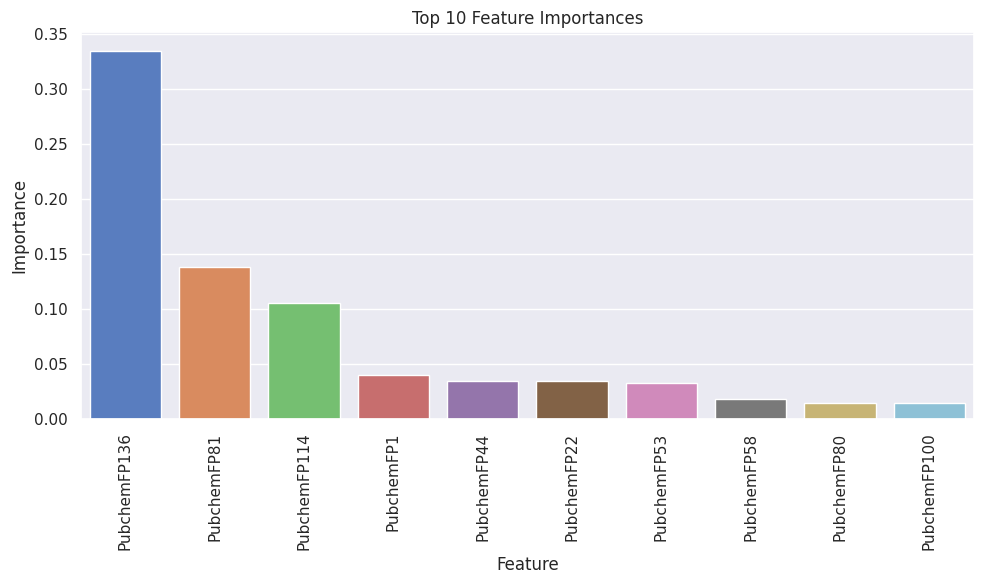

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.110703 |
+-------------------------+----------+
| Root Mean Squared Error | 0.331666 |
+-------------------------+----------+
| Mean Absolute Error     | 0.110703 |
+-------------------------+----------+
| R-squared Score         | 0.924338 |
+-------------------------+----------+


###Regression Model using Gradient Boosting Regression and Feature Importance

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0323045 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.179735  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.12097   |
+-------------------------+-----------+
| R-squared Score         | 0.978866  |
+-------------------------+-----------+


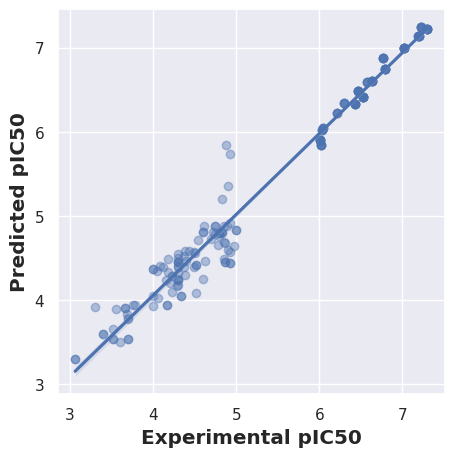

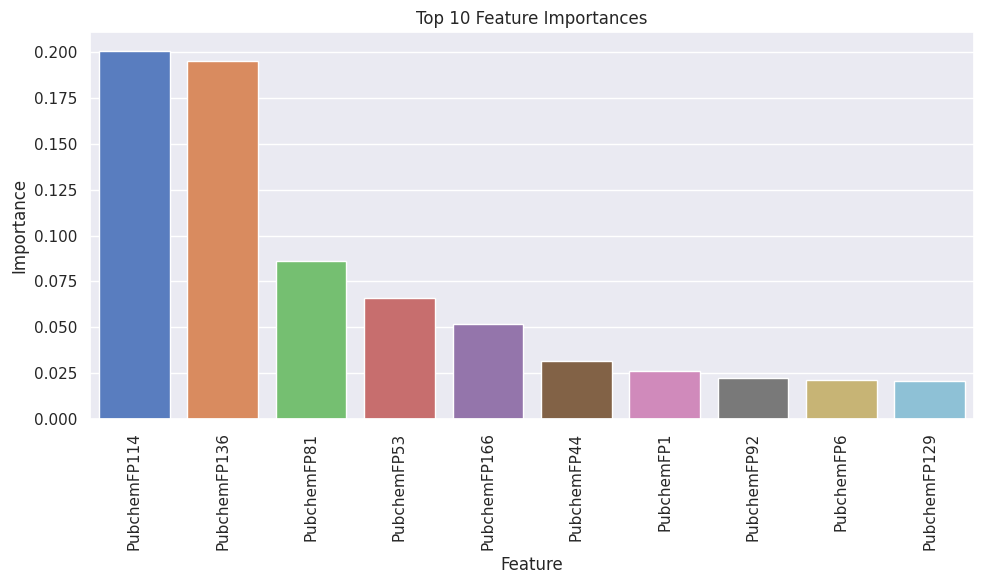

In [ ]:

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)

# Train the Gradient Boosting Regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0388412 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.195487  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0388412 |
+-------------------------+-----------+
| R-squared Score         | 0.97306   |
+-------------------------+-----------+


### Regression Model using SVR

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0387323 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.196805  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.135737  |
+-------------------------+-----------+
| R-squared Score         | 0.974661  |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

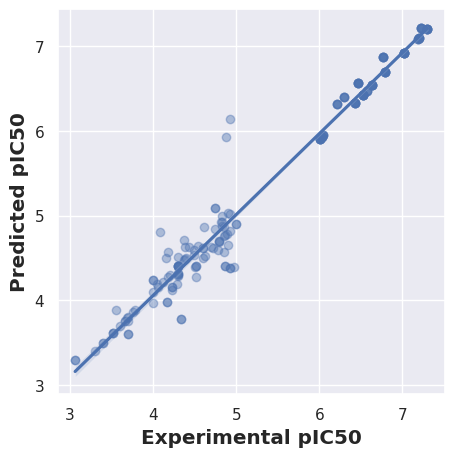

In [ ]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0320345 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.176345  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0320345 |
+-------------------------+-----------+
| R-squared Score         | 0.97777   |
+-------------------------+-----------+


### Multiple Linear Regression

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0566312 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.237973  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.141002  |
+-------------------------+-----------+
| R-squared Score         | 0.962951  |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

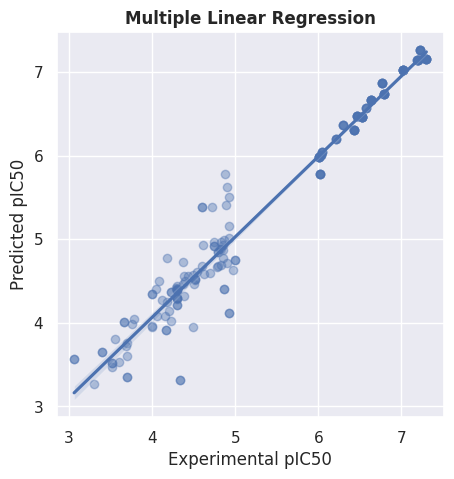

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Multiple Linear Regression', fontweight='bold')
plt.show


---
After K-Fold cross validation. 

In [ ]:
model = model = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+--------------+
| Metric                  |        Value |
+=========================+==============+
| Mean Squared Error      |  1.3775e+19  |
+-------------------------+--------------+
| Root Mean Squared Error |  1.32672e+09 |
+-------------------------+--------------+
| Mean Absolute Error     |  1.3775e+19  |
+-------------------------+--------------+
| R-squared Score         | -9.73436e+18 |
+-------------------------+--------------+


### Decision Tree Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.135617 |
+-------------------------+----------+
| Root Mean Squared Error | 0.368262 |
+-------------------------+----------+
| Mean Absolute Error     | 0.222462 |
+-------------------------+----------+
| R-squared Score         | 0.911277 |
+-------------------------+----------+


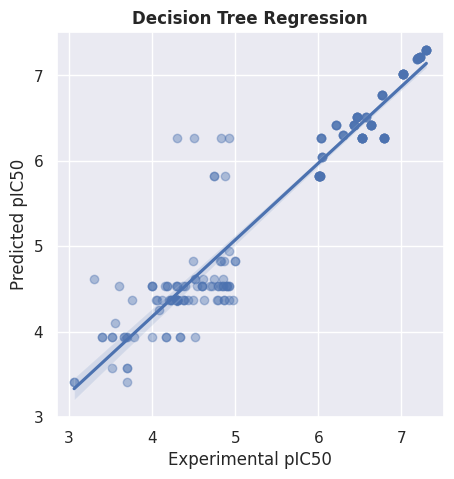

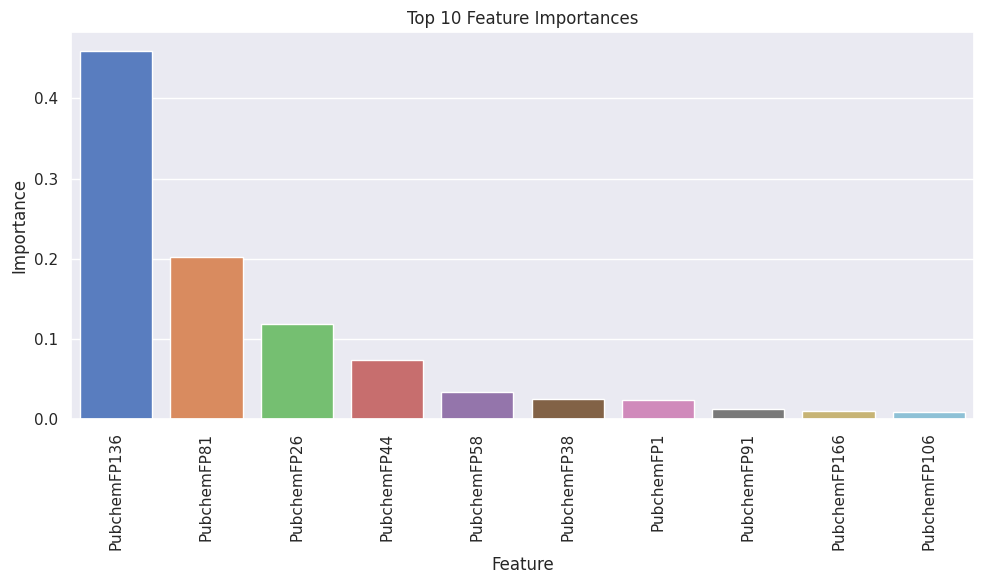

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Decision Tree Regression', fontweight='bold')
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.126674 |
+-------------------------+----------+
| Root Mean Squared Error | 0.355218 |
+-------------------------+----------+
| Mean Absolute Error     | 0.126674 |
+-------------------------+----------+
| R-squared Score         | 0.912462 |
+-------------------------+----------+


### Lasso Regression | L1 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.601281 |
+-------------------------+----------+
| Root Mean Squared Error | 0.775423 |
+-------------------------+----------+
| Mean Absolute Error     | 0.656271 |
+-------------------------+----------+
| R-squared Score         | 0.606631 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

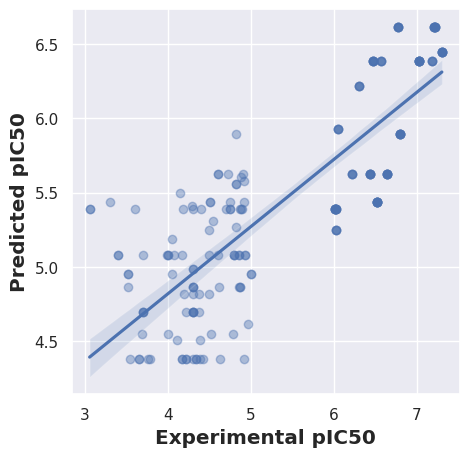

In [ ]:

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot

sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.529472 |
+-------------------------+----------+
| Root Mean Squared Error | 0.726642 |
+-------------------------+----------+
| Mean Absolute Error     | 0.529472 |
+-------------------------+----------+
| R-squared Score         | 0.634853 |
+-------------------------+----------+


### Ridge Regression | L2 Regularization

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0695202 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.263667  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.161322  |
+-------------------------+-----------+
| R-squared Score         | 0.954519  |
+-------------------------+-----------+


<function matplotlib.pyplot.show(close=None, block=None)>

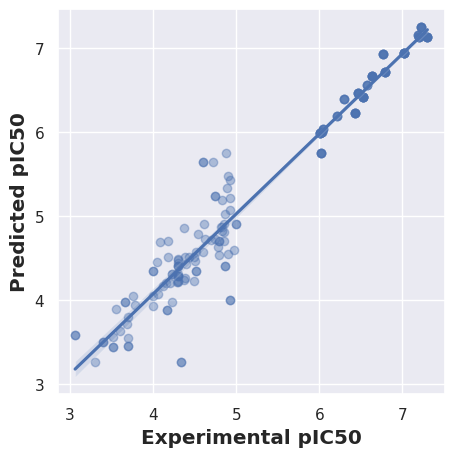

In [ ]:

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show




---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.058816 |
+-------------------------+----------+
| Root Mean Squared Error | 0.241762 |
+-------------------------+----------+
| Mean Absolute Error     | 0.058816 |
+-------------------------+----------+
| R-squared Score         | 0.959413 |
+-------------------------+----------+


### ElasticNet Regression | L3 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.738918 |
+-------------------------+----------+
| Root Mean Squared Error | 0.859604 |
+-------------------------+----------+
| Mean Absolute Error     | 0.764015 |
+-------------------------+----------+
| R-squared Score         | 0.516586 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

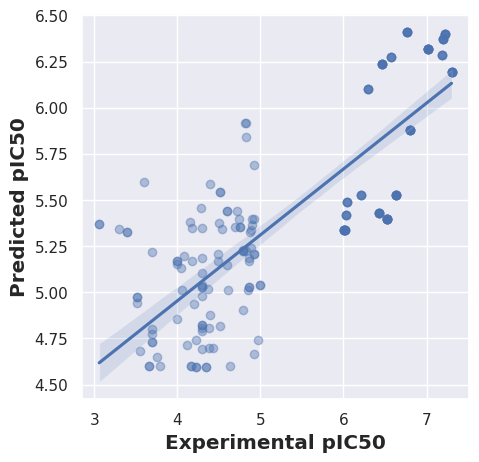

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.2, selection='random', random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, selection='cyclic', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 1.12783  |
+-------------------------+----------+
| Root Mean Squared Error | 1.06173  |
+-------------------------+----------+
| Mean Absolute Error     | 1.12783  |
+-------------------------+----------+
| R-squared Score         | 0.222132 |
+-------------------------+----------+


## Substructure

Feature count **307**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/substructure.csv') 
df_fp

Name  SubFP1  SubFP2  SubFP3  SubFP4  SubFP5  SubFP6  \
0        AUTOGEN_molecule_1       0       1       0       0       0       0   
1        AUTOGEN_molecule_2       0       1       0       0       0       0   
2        AUTOGEN_molecule_3       0       1       0       0       0       0   
3        AUTOGEN_molecule_4       0       1       0       0       0       0   
4        AUTOGEN_molecule_5       0       1       0       0       0       0   
...                     ...     ...     ...     ...     ...     ...     ...   
1416  AUTOGEN_molecule_1417       0       0       0       0       0       0   
1417  AUTOGEN_molecule_1418       1       1       0       0       0       0   
1418  AUTOGEN_molecule_1419       1       1       0       0       0       0   
1419  AUTOGEN_molecule_1420       1       1       0       0       0       0   
1420  AUTOGEN_molecule_1421       1       1       0       0       0       0   

      SubFP7  SubFP8  SubFP9  ...  SubFP298  SubFP299  SubFP300  SubFP301  \
0          0       0       0  ...         0         0         1         1   
1          0       0       0  ...         0         0         1         1   
2          0       0       0  ...         0         0         1         1   
3          0       0       0  ...         0         0         1         1   
4          0       0       0  ...         0         0         1         1   
...      ...     ...     ...  ...       ...       ...       ...       ...   
1416       0       0       0  ...         1         1         0         0   
1417       0       0       0  ...         0         0         1         1   
1418       0       0       0  ...         0         0         1         1   
1419       0       0       0  ...         0         0         1         1   
1420       0       0       0  ...         0         0         1         1   

      SubFP302  SubFP303  SubFP304  SubFP305  SubFP306  SubFP307  
0            1         0         0         0         0         1  
1            1         0         0         0         0         1  
2            1         0         0         0         0         1  
3            1         0         0         0         0         1  
4            1         0         0         0         0         1  
...        ...       ...       ...       ...       ...       ...  
1416         1         0         0         0         0         1  
1417         1         0         0         0         0         1  
1418         1         0         0         0         0         1  
1419         1         0         0         0         0         1  
1420         1         0         0         0         0         1  

[1421 rows x 308 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['pIC50']

In [ ]:
X

SubFP1  SubFP2  SubFP3  SubFP4  SubFP5  SubFP6  SubFP7  SubFP8  SubFP9  \
0          0       1       0       0       0       0       0       0       0   
1          0       1       0       0       0       0       0       0       0   
2          0       1       0       0       0       0       0       0       0   
3          0       1       0       0       0       0       0       0       0   
4          0       1       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1416       0       0       0       0       0       0       0       0       0   
1417       1       1       0       0       0       0       0       0       0   
1418       1       1       0       0       0       0       0       0       0   
1419       1       1       0       0       0       0       0       0       0   
1420       1       1       0       0       0       0       0       0       0   

      SubFP10  ...  SubFP298  SubFP299  SubFP300  SubFP301  SubFP302  \
0           0  ...         0         0         1         1         1   
1           0  ...         0         0         1         1         1   
2           0  ...         0         0         1         1         1   
3           0  ...         0         0         1         1         1   
4           0  ...         0         0         1         1         1   
...       ...  ...       ...       ...       ...       ...       ...   
1416        0  ...         1         1         0         0         1   
1417        0  ...         0         0         1         1         1   
1418        0  ...         0         0         1         1         1   
1419        0  ...         0         0         1         1         1   
1420        0  ...         0         0         1         1         1   

      SubFP303  SubFP304  SubFP305  SubFP306  SubFP307  
0            0         0         0         0         1  
1            0         0         0         0         1  
2            0         0         0         0         1  
3            0         0         0         0         1  
4            0         0         0         0         1  
...        ...       ...       ...       ...       ...  
1416         0         0         0         0         1  
1417         0         0         0         0         1  
1418         0         0         0         0         1  
1419         0         0         0         0         1  
1420         0         0         0         0         1  

[1421 rows x 307 columns]

In [ ]:
X.shape

(1421, 307)

In [ ]:
Y.shape

(1421,)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_columns = X.columns

In [ ]:
X_columns

Index(['SubFP1', 'SubFP2', 'SubFP3', 'SubFP4', 'SubFP5', 'SubFP6', 'SubFP7',
       'SubFP8', 'SubFP9', 'SubFP10',
       ...
       'SubFP298', 'SubFP299', 'SubFP300', 'SubFP301', 'SubFP302', 'SubFP303',
       'SubFP304', 'SubFP305', 'SubFP306', 'SubFP307'],
      dtype='object', length=307)

In [ ]:
type(Y)

pandas.core.series.Series

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 15)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 15), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 15), (213,))

### Models


- Multiple Linear Regression
- Polynomial Regression
- Robust Regression — RANSAC
- Decision Tree
- Random Forest
- Gaussian process regression
- Support Vector Regression




### Regression Model using Random Forrest with Feature Importance

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.304489 |
+-------------------------+----------+
| Root Mean Squared Error | 0.551805 |
+-------------------------+----------+
| Mean Absolute Error     | 0.414214 |
+-------------------------+----------+
| R-squared Score         | 0.800798 |
+-------------------------+----------+


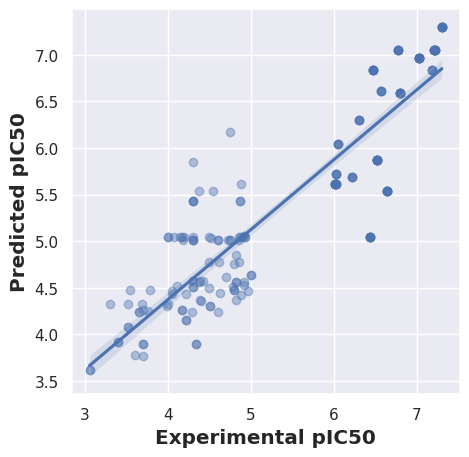

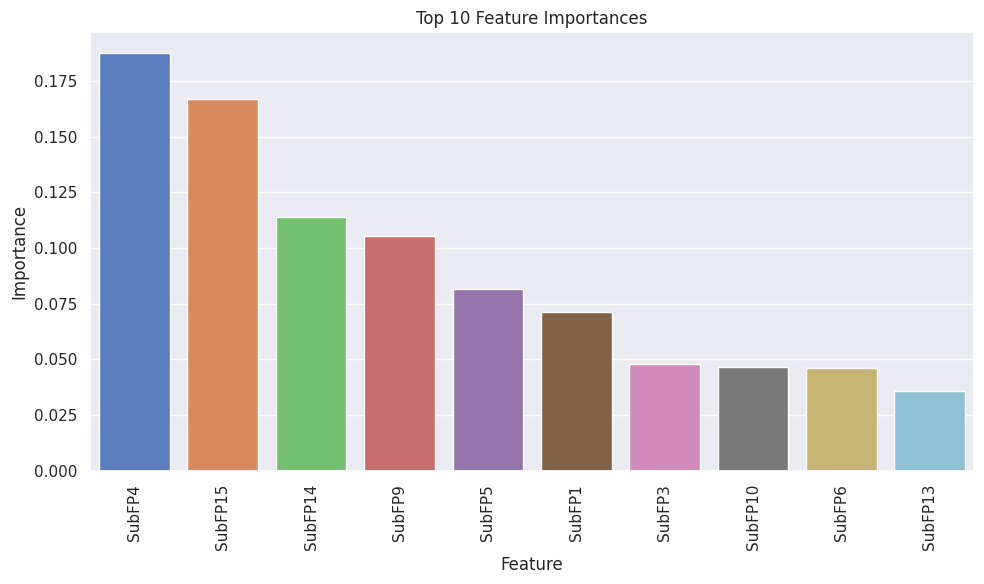

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.281925 |
+-------------------------+----------+
| Root Mean Squared Error | 0.528722 |
+-------------------------+----------+
| Mean Absolute Error     | 0.281925 |
+-------------------------+----------+
| R-squared Score         | 0.805969 |
+-------------------------+----------+


###Regression Model using Gradient Boosting Regression and Feature Importance

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.228112 |
+-------------------------+----------+
| Root Mean Squared Error | 0.477611 |
+-------------------------+----------+
| Mean Absolute Error     | 0.336906 |
+-------------------------+----------+
| R-squared Score         | 0.850765 |
+-------------------------+----------+


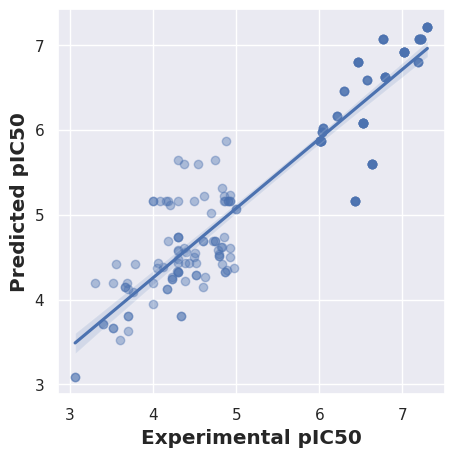

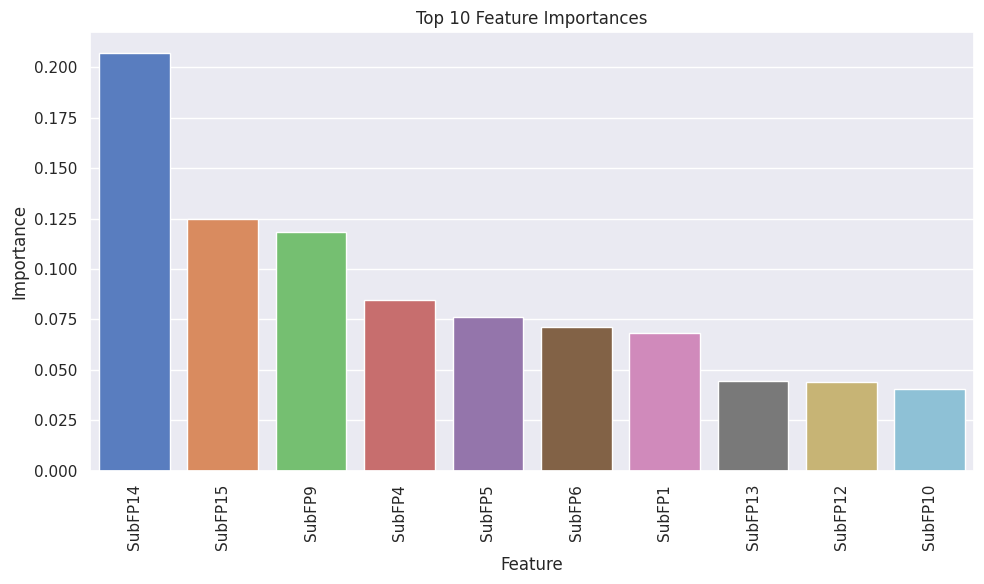

In [ ]:

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)

# Train the Gradient Boosting Regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.213232 |
+-------------------------+----------+
| Root Mean Squared Error | 0.460356 |
+-------------------------+----------+
| Mean Absolute Error     | 0.213232 |
+-------------------------+----------+
| R-squared Score         | 0.852442 |
+-------------------------+----------+


### Regression Model using SVR

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.18353  |
+-------------------------+----------+
| Root Mean Squared Error | 0.428405 |
+-------------------------+----------+
| Mean Absolute Error     | 0.262584 |
+-------------------------+----------+
| R-squared Score         | 0.879931 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

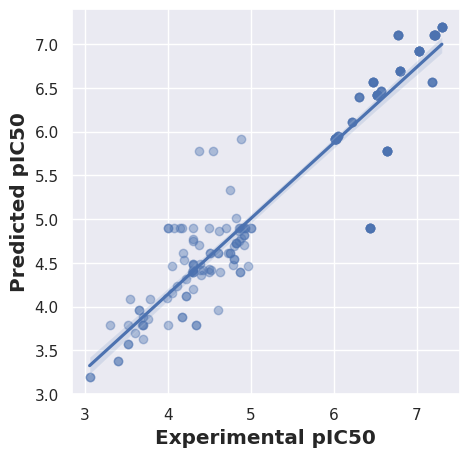

In [ ]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.223195 |
+-------------------------+----------+
| Root Mean Squared Error | 0.467427 |
+-------------------------+----------+
| Mean Absolute Error     | 0.223195 |
+-------------------------+----------+
| R-squared Score         | 0.845332 |
+-------------------------+----------+


### Multiple Linear Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.853952 |
+-------------------------+----------+
| Root Mean Squared Error | 0.924095 |
+-------------------------+----------+
| Mean Absolute Error     | 0.762573 |
+-------------------------+----------+
| R-squared Score         | 0.441328 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

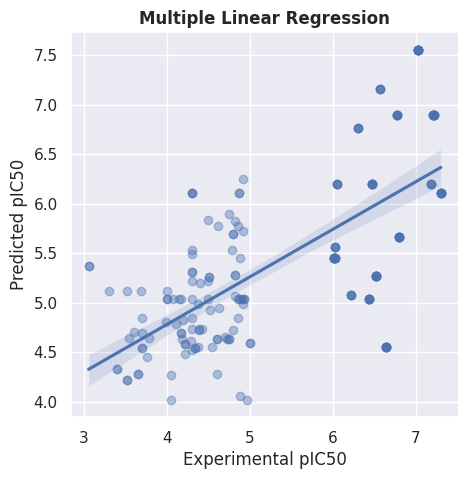

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Multiple Linear Regression', fontweight='bold')
plt.show


---
After K-Fold cross validation. 

In [ ]:
model = model = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.770011 |
+-------------------------+----------+
| Root Mean Squared Error | 0.875941 |
+-------------------------+----------+
| Mean Absolute Error     | 0.770011 |
+-------------------------+----------+
| R-squared Score         | 0.468774 |
+-------------------------+----------+


### Decision Tree Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.392182 |
+-------------------------+----------+
| Root Mean Squared Error | 0.626244 |
+-------------------------+----------+
| Mean Absolute Error     | 0.477049 |
+-------------------------+----------+
| R-squared Score         | 0.743427 |
+-------------------------+----------+


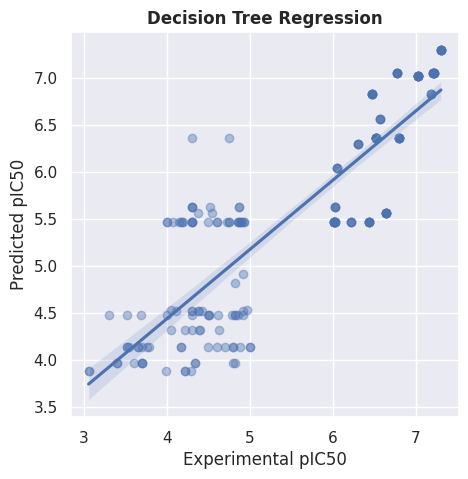

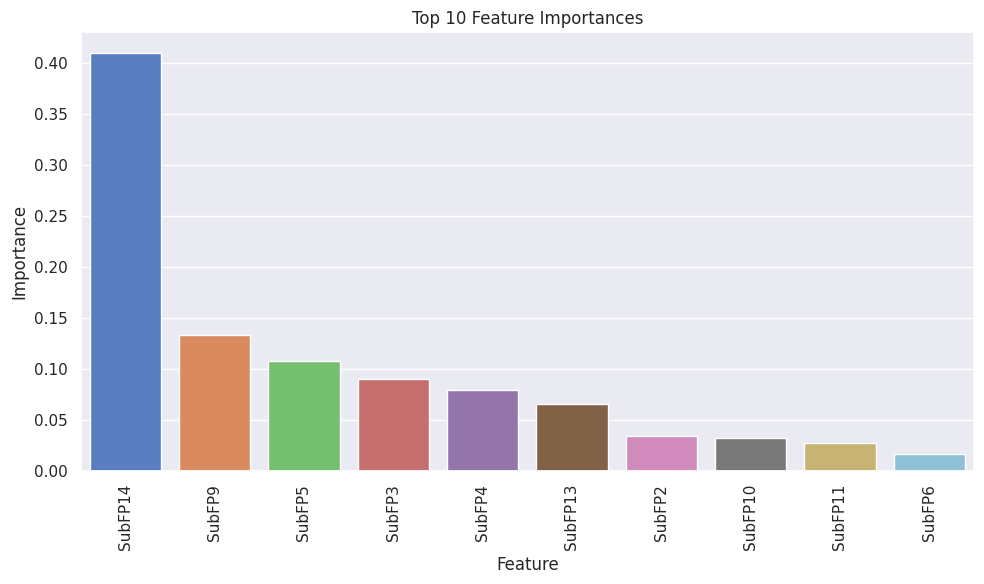

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Decision Tree Regression', fontweight='bold')
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.357355 |
+-------------------------+----------+
| Root Mean Squared Error | 0.5946   |
+-------------------------+----------+
| Mean Absolute Error     | 0.357355 |
+-------------------------+----------+
| R-squared Score         | 0.753267 |
+-------------------------+----------+


### Lasso Regression | L1 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.992834 |
+-------------------------+----------+
| Root Mean Squared Error | 0.99641  |
+-------------------------+----------+
| Mean Absolute Error     | 0.877268 |
+-------------------------+----------+
| R-squared Score         | 0.350469 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

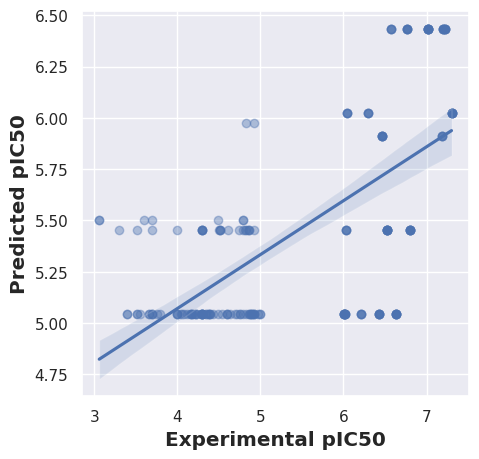

In [ ]:

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot

sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.922629 |
+-------------------------+----------+
| Root Mean Squared Error | 0.959287 |
+-------------------------+----------+
| Mean Absolute Error     | 0.922629 |
+-------------------------+----------+
| R-squared Score         | 0.363679 |
+-------------------------+----------+


### Ridge Regression | L2 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.852553 |
+-------------------------+----------+
| Root Mean Squared Error | 0.923338 |
+-------------------------+----------+
| Mean Absolute Error     | 0.763884 |
+-------------------------+----------+
| R-squared Score         | 0.442244 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

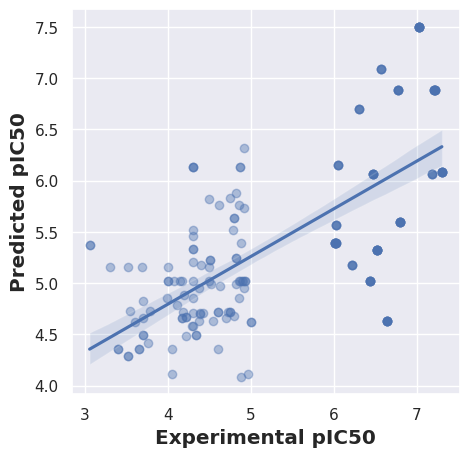

In [ ]:

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show




---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.769639 |
+-------------------------+----------+
| Root Mean Squared Error | 0.875746 |
+-------------------------+----------+
| Mean Absolute Error     | 0.769639 |
+-------------------------+----------+
| R-squared Score         | 0.469019 |
+-------------------------+----------+


### ElasticNet Regression | L3 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 1.16162  |
+-------------------------+----------+
| Root Mean Squared Error | 1.07778  |
+-------------------------+----------+
| Mean Absolute Error     | 0.996814 |
+-------------------------+----------+
| R-squared Score         | 0.240047 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

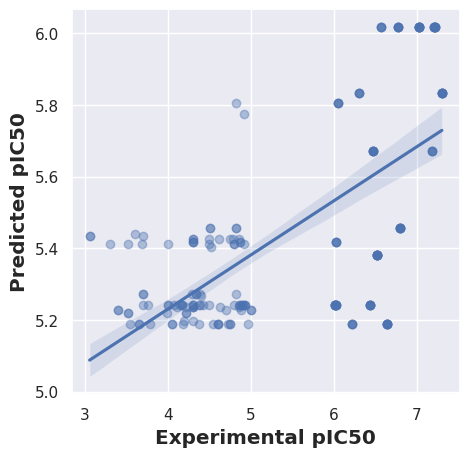

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.2, selection='random', random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, selection='cyclic', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 1.3686    |
+-------------------------+-----------+
| Root Mean Squared Error | 1.16963   |
+-------------------------+-----------+
| Mean Absolute Error     | 1.3686    |
+-------------------------+-----------+
| R-squared Score         | 0.0560355 |
+-------------------------+-----------+


## Substructure Count

Feature count **307**. 

In [ ]:
df_fp = pd.read_csv('/content/gdrive/MyDrive/CSE498R/Results/substructure_count.csv') 
df_fp

Name  SubFPC1  SubFPC2  SubFPC3  SubFPC4  SubFPC5  \
0        AUTOGEN_molecule_1      0.0      4.0      0.0      0.0      0.0   
1        AUTOGEN_molecule_2      0.0      4.0      0.0      0.0      0.0   
2        AUTOGEN_molecule_3      0.0      4.0      0.0      0.0      0.0   
3        AUTOGEN_molecule_4      0.0      4.0      0.0      0.0      0.0   
4        AUTOGEN_molecule_5      0.0      4.0      0.0      0.0      0.0   
...                     ...      ...      ...      ...      ...      ...   
1416  AUTOGEN_molecule_1417      0.0      0.0      0.0      0.0      0.0   
1417  AUTOGEN_molecule_1418      1.0      2.0      0.0      0.0      0.0   
1418  AUTOGEN_molecule_1419      1.0      2.0      0.0      0.0      0.0   
1419  AUTOGEN_molecule_1420      1.0      2.0      0.0      0.0      0.0   
1420  AUTOGEN_molecule_1421      1.0      2.0      0.0      0.0      0.0   

      SubFPC6  SubFPC7  SubFPC8  SubFPC9  ...  SubFPC298  SubFPC299  \
0         0.0      0.0      0.0      0.0  ...        0.0        0.0   
1         0.0      0.0      0.0      0.0  ...        0.0        0.0   
2         0.0      0.0      0.0      0.0  ...        0.0        0.0   
3         0.0      0.0      0.0      0.0  ...        0.0        0.0   
4         0.0      0.0      0.0      0.0  ...        0.0        0.0   
...       ...      ...      ...      ...  ...        ...        ...   
1416      0.0      0.0      0.0      0.0  ...        2.0        2.0   
1417      0.0      0.0      0.0      0.0  ...        0.0        0.0   
1418      0.0      0.0      0.0      0.0  ...        0.0        0.0   
1419      0.0      0.0      0.0      0.0  ...        0.0        0.0   
1420      0.0      0.0      0.0      0.0  ...        0.0        0.0   

      SubFPC300  SubFPC301  SubFPC302  SubFPC303  SubFPC304  SubFPC305  \
0          10.0       10.0        6.0        0.0        0.0        0.0   
1          10.0       10.0        6.0        0.0        0.0        0.0   
2          10.0       10.0        6.0        0.0        0.0        0.0   
3          10.0       10.0        6.0        0.0        0.0        0.0   
4          10.0       10.0        6.0        0.0        0.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1416        0.0        0.0        4.0        0.0        0.0        0.0   
1417        4.0        4.0        3.0        0.0        0.0        0.0   
1418        4.0        4.0        3.0        0.0        0.0        0.0   
1419        4.0        4.0        3.0        0.0        0.0        0.0   
1420        4.0        4.0        3.0        0.0        0.0        0.0   

      SubFPC306  SubFPC307  
0           0.0       11.0  
1           0.0       11.0  
2           0.0       11.0  
3           0.0       11.0  
4           0.0       11.0  
...         ...        ...  
1416        0.0       15.0  
1417        0.0        9.0  
1418        0.0        9.0  
1419        0.0        9.0  
1420        0.0        9.0  

[1421 rows x 308 columns]

### Feature Selection

In [ ]:
X = df_fp.drop('Name', axis=1)
Y = df['pIC50']

In [ ]:
X

SubFPC1  SubFPC2  SubFPC3  SubFPC4  SubFPC5  SubFPC6  SubFPC7  SubFPC8  \
0         0.0      4.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      4.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         0.0      4.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      4.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      4.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1416      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1417      1.0      2.0      0.0      0.0      0.0      0.0      0.0      0.0   
1418      1.0      2.0      0.0      0.0      0.0      0.0      0.0      0.0   
1419      1.0      2.0      0.0      0.0      0.0      0.0      0.0      0.0   
1420      1.0      2.0      0.0      0.0      0.0      0.0      0.0      0.0   

      SubFPC9  SubFPC10  ...  SubFPC298  SubFPC299  SubFPC300  SubFPC301  \
0         0.0       0.0  ...        0.0        0.0       10.0       10.0   
1         0.0       0.0  ...        0.0        0.0       10.0       10.0   
2         0.0       0.0  ...        0.0        0.0       10.0       10.0   
3         0.0       0.0  ...        0.0        0.0       10.0       10.0   
4         0.0       0.0  ...        0.0        0.0       10.0       10.0   
...       ...       ...  ...        ...        ...        ...        ...   
1416      0.0       0.0  ...        2.0        2.0        0.0        0.0   
1417      0.0       0.0  ...        0.0        0.0        4.0        4.0   
1418      0.0       0.0  ...        0.0        0.0        4.0        4.0   
1419      0.0       0.0  ...        0.0        0.0        4.0        4.0   
1420      0.0       0.0  ...        0.0        0.0        4.0        4.0   

      SubFPC302  SubFPC303  SubFPC304  SubFPC305  SubFPC306  SubFPC307  
0           6.0        0.0        0.0        0.0        0.0       11.0  
1           6.0        0.0        0.0        0.0        0.0       11.0  
2           6.0        0.0        0.0        0.0        0.0       11.0  
3           6.0        0.0        0.0        0.0        0.0       11.0  
4           6.0        0.0        0.0        0.0        0.0       11.0  
...         ...        ...        ...        ...        ...        ...  
1416        4.0        0.0        0.0        0.0        0.0       15.0  
1417        3.0        0.0        0.0        0.0        0.0        9.0  
1418        3.0        0.0        0.0        0.0        0.0        9.0  
1419        3.0        0.0        0.0        0.0        0.0        9.0  
1420        3.0        0.0        0.0        0.0        0.0        9.0  

[1421 rows x 307 columns]

In [ ]:
X.shape

(1421, 307)

In [ ]:
Y.shape

(1421,)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_columns = X.columns

In [ ]:
X_columns

Index(['SubFPC1', 'SubFPC2', 'SubFPC3', 'SubFPC4', 'SubFPC5', 'SubFPC6',
       'SubFPC7', 'SubFPC8', 'SubFPC9', 'SubFPC10',
       ...
       'SubFPC298', 'SubFPC299', 'SubFPC300', 'SubFPC301', 'SubFPC302',
       'SubFPC303', 'SubFPC304', 'SubFPC305', 'SubFPC306', 'SubFPC307'],
      dtype='object', length=307)

In [ ]:
type(Y)

pandas.core.series.Series

Removing low variance features

In [ ]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(1421, 37)

### Data Split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the resulting sets
print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Train set size: 994
Test set size: 213
Validation set size: 214


In [ ]:
X_train.shape, Y_train.shape

((994, 37), (994,))

In [ ]:
X_test.shape, Y_test.shape

((213, 37), (213,))

### Models


- Multiple Linear Regression
- Polynomial Regression
- Robust Regression — RANSAC
- Decision Tree
- Random Forest
- Gaussian process regression
- Support Vector Regression




### Regression Model using Random Forrest with Feature Importance

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.134437 |
+-------------------------+----------+
| Root Mean Squared Error | 0.366657 |
+-------------------------+----------+
| Mean Absolute Error     | 0.246429 |
+-------------------------+----------+
| R-squared Score         | 0.912049 |
+-------------------------+----------+


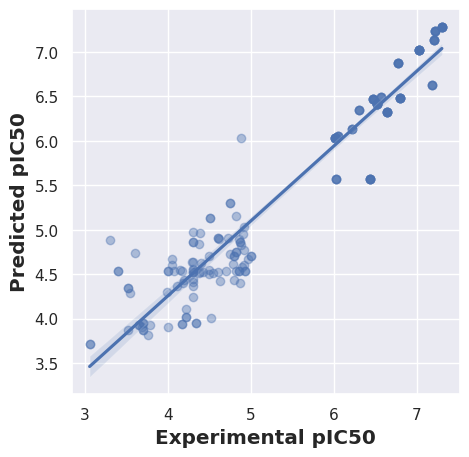

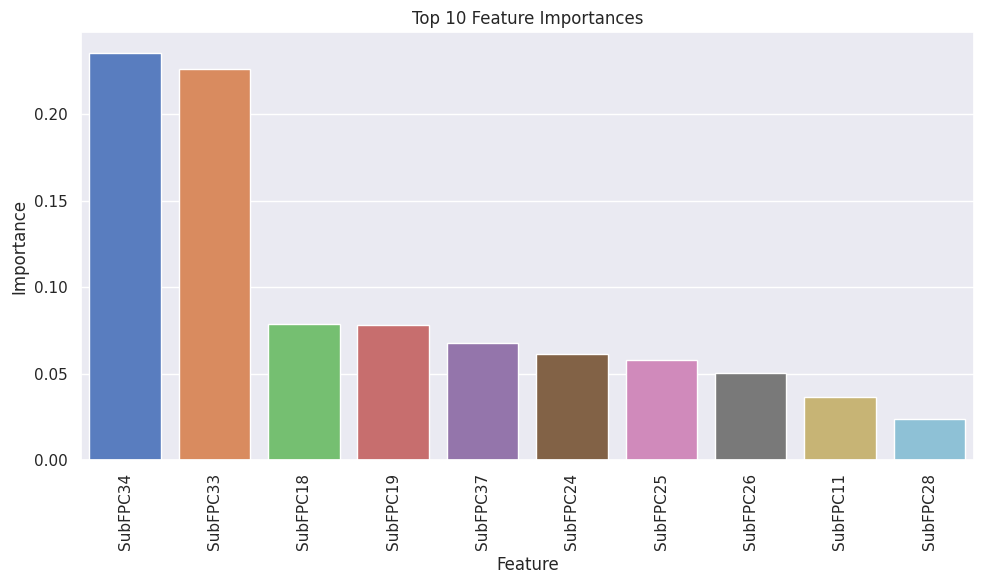

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)

# Show the plot
plt.show()

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))


+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.133894 |
+-------------------------+----------+
| Root Mean Squared Error | 0.36481  |
+-------------------------+----------+
| Mean Absolute Error     | 0.133894 |
+-------------------------+----------+
| R-squared Score         | 0.905623 |
+-------------------------+----------+


###Regression Model using Gradient Boosting Regression and Feature Importance

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0572652 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.239301  |
+-------------------------+-----------+
| Mean Absolute Error     | 0.167322  |
+-------------------------+-----------+
| R-squared Score         | 0.962536  |
+-------------------------+-----------+


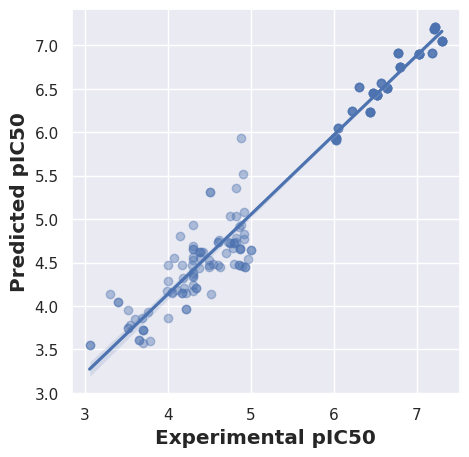

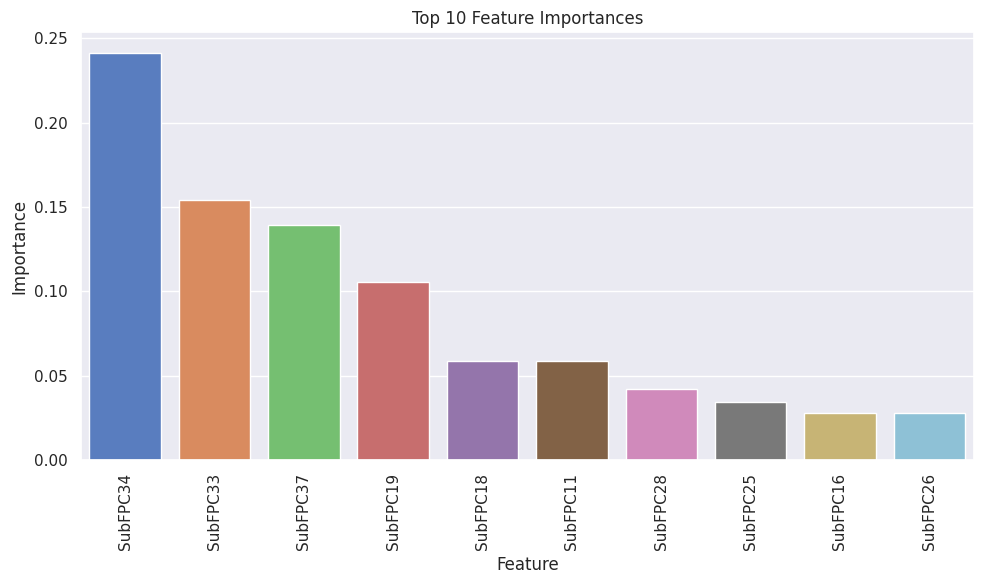

In [ ]:

model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)

# Train the Gradient Boosting Regression model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42, max_depth=3)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+-----------+
| Metric                  |     Value |
+=========================+===========+
| Mean Squared Error      | 0.0559793 |
+-------------------------+-----------+
| Root Mean Squared Error | 0.23544   |
+-------------------------+-----------+
| Mean Absolute Error     | 0.0559793 |
+-------------------------+-----------+
| R-squared Score         | 0.961228  |
+-------------------------+-----------+


### Regression Model using SVR

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.394782 |
+-------------------------+----------+
| Root Mean Squared Error | 0.628317 |
+-------------------------+----------+
| Mean Absolute Error     | 0.440619 |
+-------------------------+----------+
| R-squared Score         | 0.741726 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

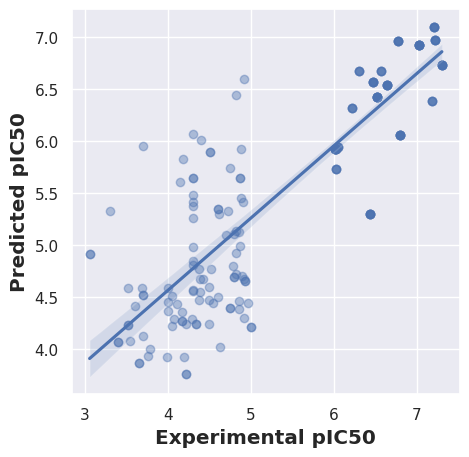

In [ ]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.326162 |
+-------------------------+----------+
| Root Mean Squared Error | 0.569383 |
+-------------------------+----------+
| Mean Absolute Error     | 0.326162 |
+-------------------------+----------+
| R-squared Score         | 0.775199 |
+-------------------------+----------+


### Multiple Linear Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.402705 |
+-------------------------+----------+
| Root Mean Squared Error | 0.63459  |
+-------------------------+----------+
| Mean Absolute Error     | 0.499723 |
+-------------------------+----------+
| R-squared Score         | 0.736543 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

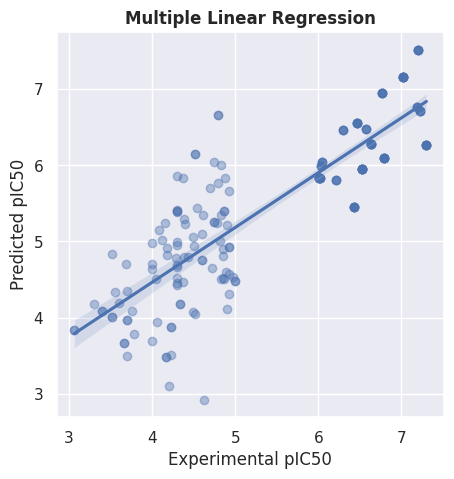

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Multiple Linear Regression', fontweight='bold')
plt.show


---
After K-Fold cross validation. 

In [ ]:
model = model = LinearRegression()
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.362977 |
+-------------------------+----------+
| Root Mean Squared Error | 0.601533 |
+-------------------------+----------+
| Mean Absolute Error     | 0.362977 |
+-------------------------+----------+
| R-squared Score         | 0.748762 |
+-------------------------+----------+


### Decision Tree Regression

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.191816 |
+-------------------------+----------+
| Root Mean Squared Error | 0.437968 |
+-------------------------+----------+
| Mean Absolute Error     | 0.248311 |
+-------------------------+----------+
| R-squared Score         | 0.87451  |
+-------------------------+----------+


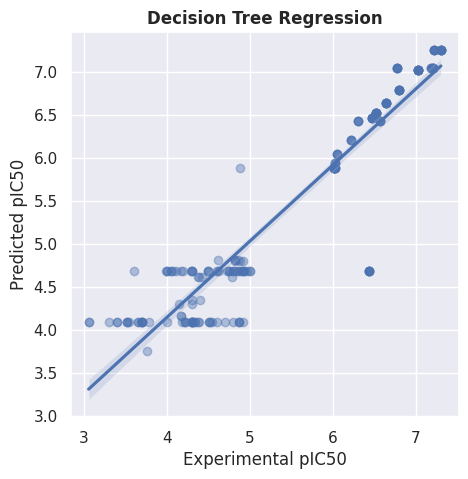

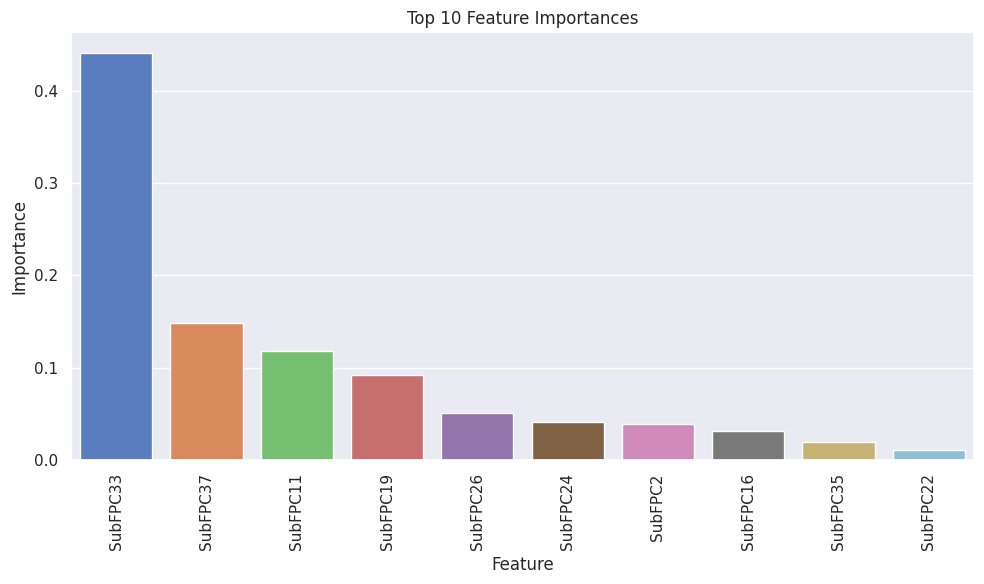

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, Y_train)

# Predict the target variable
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))
#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')

ax.figure.set_size_inches(5, 5)
plt.title('Decision Tree Regression', fontweight='bold')
plt.show

# Get the feature importances from the trained model
importances = model.feature_importances_

# Get the feature names
feature_names = X_columns

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]



top_10_importances = sorted_importances[:10]
top_10_feature_names = sorted_feature_names[:10]

custom_palette = ['blue', 'green', 'red', 'orange', 'purple']

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_feature_names, y=top_10_importances, palette="muted")
plt.xticks(range(len(top_10_importances)), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

---
After K-Fold cross validation. 

In [ ]:
model = DecisionTreeRegressor(max_depth=5)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.190086 |
+-------------------------+----------+
| Root Mean Squared Error | 0.434307 |
+-------------------------+----------+
| Mean Absolute Error     | 0.190086 |
+-------------------------+----------+
| R-squared Score         | 0.868612 |
+-------------------------+----------+


### Lasso Regression | L1 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.761408 |
+-------------------------+----------+
| Root Mean Squared Error | 0.872587 |
+-------------------------+----------+
| Mean Absolute Error     | 0.742785 |
+-------------------------+----------+
| R-squared Score         | 0.501872 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

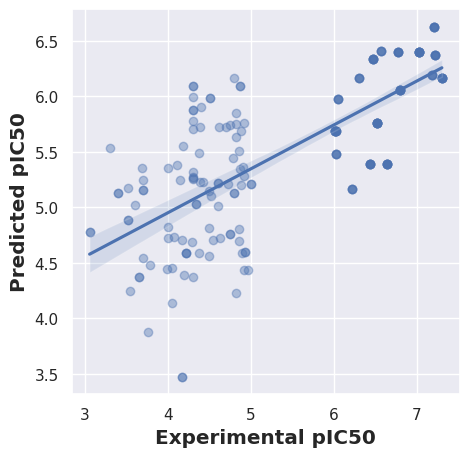

In [ ]:

model = Lasso(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot

sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show



---
After K-Fold cross validation. 

In [ ]:
model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.672444 |
+-------------------------+----------+
| Root Mean Squared Error | 0.818958 |
+-------------------------+----------+
| Mean Absolute Error     | 0.672444 |
+-------------------------+----------+
| R-squared Score         | 0.535843 |
+-------------------------+----------+


### Ridge Regression | L2 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.403228 |
+-------------------------+----------+
| Root Mean Squared Error | 0.635002 |
+-------------------------+----------+
| Mean Absolute Error     | 0.500079 |
+-------------------------+----------+
| R-squared Score         | 0.736201 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

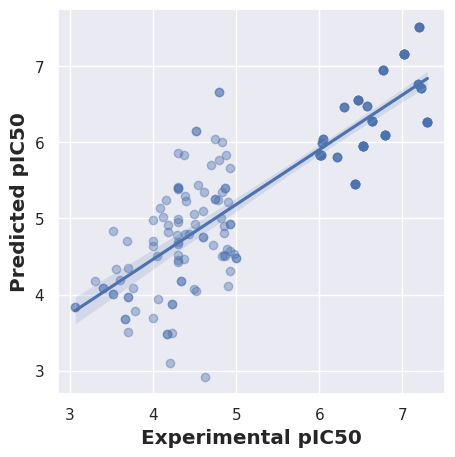

In [ ]:

# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show




---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = Ridge(alpha=0.1, random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.362966 |
+-------------------------+----------+
| Root Mean Squared Error | 0.601525 |
+-------------------------+----------+
| Mean Absolute Error     | 0.362966 |
+-------------------------+----------+
| R-squared Score         | 0.748772 |
+-------------------------+----------+


### ElasticNet Regression | L3 Regularization

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.899289 |
+-------------------------+----------+
| Root Mean Squared Error | 0.948308 |
+-------------------------+----------+
| Mean Absolute Error     | 0.809999 |
+-------------------------+----------+
| R-squared Score         | 0.411668 |
+-------------------------+----------+


<function matplotlib.pyplot.show(close=None, block=None)>

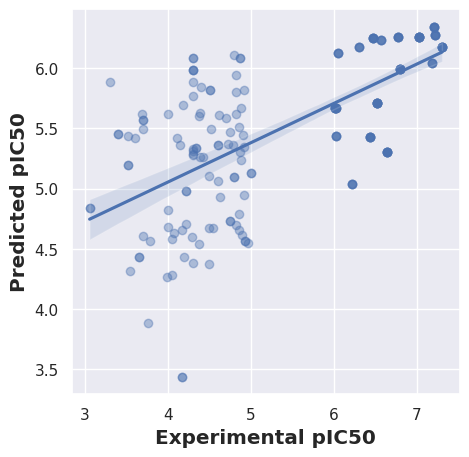

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.2, selection='random', random_state=42)
model.fit(X_train, Y_train)

# Predict the target variable for the testing set
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [mse, rmse, mae, r2]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

#plot
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

ax.figure.set_size_inches(5, 5)
plt.show

---
After K-Fold cross validation. 

In [ ]:
# Initialize and fit the ridge regression model
model = ElasticNet(alpha=0.5, l1_ratio=0.5, selection='cyclic', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=5)
# Predict the target variable for the testing set


cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
cv_scores = -cv_scores

# Calculate other evaluation metrics for each fold
rmse_scores = np.sqrt(cv_scores)
mae_scores = np.abs(cv_scores)
r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

metric_names = ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared Score']
metric_values = [cv_scores.mean(), rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]

# Create a list of lists to represent the table
table_data = []
for name, value in zip(metric_names, metric_values):
    table_data.append([name, value])

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='grid'))

+-------------------------+----------+
| Metric                  |    Value |
+=========================+==========+
| Mean Squared Error      | 0.988219 |
+-------------------------+----------+
| Root Mean Squared Error | 0.993248 |
+-------------------------+----------+
| Mean Absolute Error     | 0.988219 |
+-------------------------+----------+
| R-squared Score         | 0.318222 |
+-------------------------+----------+


---
## Results